# Preliminaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import norm
from scipy import stats
from scipy.special import gamma
#import sharepy #This should allow grabbing files from sharepoint (Doesn't work)
#Seems to be an issue with passwords with symbols? try remove from passwords

In [2]:
full_method_list=['M06-2X','B3LYP','wB97M-V']

#full_basisset_list = ['STO-3G','6-31G','6-31Gd','6-31+G','6-31+Gd','6-31++Gdd','6-311G','6-311+G','6-311Gd','6-311+Gd','pc-0','pc-1','pc-2','aug-pc-0','aug-pc-1','aug-pc-2','pcseg-0','pcseg-1','pcseg-2','aug-pcseg-0','aug-pcseg-1','aug-pcseg2','cc-pVDZ','cc-pVTZ','aug-cc-pVDZ','aug-cc-pVTZ','def2-SVP','def2-TVP','def2-TVPP']
#Original list 

full_basisset_list = ['6-31++G','6-31++Gdd','6-31+G','6-31+Gd','6-31Gdd','6-311+G','6-311+Gd','6-311Gdd','6-311G','6-311G_2df_p','6-311Gd','6-31G','6-31G_2df_p','6-31Gd','STO-3G','aug-cc-pVDZ','aug-cc-pVTZ','aug-pc-0','aug-pc-1','aug-pc-2','aug-pcseg-0','aug-pcseg-1','cc-pVDZ','cc-pVTZ','def2-SVP','def2-SVPD','def2-TZVP','def2-TZVPD','def2-TZVPP','pc-0','pc-1','pc-2', 'pcseg-0','pcseg-1','pcseg-2']
len(full_basisset_list)

#full_basisset_list = ['aug-cc-pVTZ','aug-pc-0','aug-pc-1','aug-pc-2']



#full_basisset_list = pd.read_csv(f'29Sept/Results/fullbasislist.txt',header=None)
#This file doesnt exist, cant find it in any of the folders?

#full_basisset_list = full_basisset_list[0].tolist()
#.tolist() converts something to a list? why convert the first entry of a list to a list?

#DZ only
#full_basisset_list = ['6-31G','6-31Gd','pc-1','pcseg-1','cc-pVDZ','def2-SVP','6-31+G','6-31+Gd','aug-pc-1','aug-pcseg-1','aug-cc-pVDZ']


#SZ only
#full_basisset_list = ['STO-3G','pc-0','pcseg-0','aug-pc-0','aug-pcseg-0']
#label="SingleZeta"

35

In [3]:
full_basisset_list
#prints list
#This is the new list taken from the old processing file (should be the contents of the file that is missing)

['6-31++G',
 '6-31++Gdd',
 '6-31+G',
 '6-31+Gd',
 '6-31Gdd',
 '6-311+G',
 '6-311+Gd',
 '6-311Gdd',
 '6-311G',
 '6-311G_2df_p',
 '6-311Gd',
 '6-31G',
 '6-31G_2df_p',
 '6-31Gd',
 'STO-3G',
 'aug-cc-pVDZ',
 'aug-cc-pVTZ',
 'aug-pc-0',
 'aug-pc-1',
 'aug-pc-2',
 'aug-pcseg-0',
 'aug-pcseg-1',
 'cc-pVDZ',
 'cc-pVTZ',
 'def2-SVP',
 'def2-SVPD',
 'def2-TZVP',
 'def2-TZVPD',
 'def2-TZVPP',
 'pc-0',
 'pc-1',
 'pc-2',
 'pcseg-0',
 'pcseg-1',
 'pcseg-2']

In [4]:
method='M06-2X'
basis='6-31G'
#Sets the basis set and method 
raw_timings=pd.read_csv(f'29Sept/Results/Time_{method}.{basis}.txt',delimiter=' ')
#Loads file
raw_timings
raw_timings.describe()
raw_timings.sum()[1]
#sums columm 2 of raw_timings
#Calculates total time for basis set method combination 
#This works the same as the base code though the result there is 22624.340000000004

22624.34

# Timing Considerations

In [5]:
print('Basis, M06-2X, Tot time (hrs), B3LYP, Tot time (hrs), wB97M-V, Tot time (hrs)' )
#inital print statement
Missing_Combinations = []
#new list for the missing combinations
for basis in full_basisset_list:
    print()
    print(basis,end=' ')
    for method in full_method_list:
        try:
            raw_timings=pd.read_csv(f'29Sept/Results/Time_{method}.{basis}.txt',delimiter=' ')
           # print(f'{method} timings, {raw_timings.count()[0]:.0f}, {raw_timings.sum()[1]/3600:.2f} hrs total, {raw_timings.describe().mean()[0]:.0f}',end=' ')
            print(f'{method} {raw_timings.sum()[1]/3600:.2f}',end=' ')
            #prints raw times in hours
        except:
            print(method,' ? ', end=' ')
            #Any file it cant find, puts a ? instead of a number
            Missing_Combinations.append(f'Time_{method}.{basis}.txt')
            continue
print('\n Missing Combinations = ',Missing_Combinations)#Almost all of these missing ones are in the base document - where are they now?
#Theyre in the folder - lied, theyre not there

Basis, M06-2X, Tot time (hrs), B3LYP, Tot time (hrs), wB97M-V, Tot time (hrs)

6-31++G M06-2X  ?  B3LYP 5.84 wB97M-V 27.49 
6-31++Gdd M06-2X 33.53 B3LYP 10.04 wB97M-V 23.63 
6-31+G M06-2X 27.03 B3LYP 18.46 wB97M-V 30.59 
6-31+Gd M06-2X 21.20 B3LYP 8.87 wB97M-V 30.36 
6-31Gdd M06-2X  ?  B3LYP  ?  wB97M-V  ?  
6-311+G M06-2X 16.44 B3LYP  ?  wB97M-V 24.33 
6-311+Gd M06-2X 68.30 B3LYP 11.79 wB97M-V 26.97 
6-311Gdd M06-2X  ?  B3LYP  ?  wB97M-V  ?  
6-311G M06-2X 8.90 B3LYP  ?  wB97M-V 16.96 
6-311G_2df_p M06-2X 54.88 B3LYP 25.57 wB97M-V 63.19 
6-311Gd M06-2X 13.76 B3LYP 4.07 wB97M-V 19.53 
6-31G M06-2X 6.28 B3LYP 7.74 wB97M-V 11.57 
6-31G_2df_p M06-2X 31.86 B3LYP 17.74 wB97M-V 36.83 
6-31Gd M06-2X 9.40 B3LYP 3.48 wB97M-V 16.83 
STO-3G M06-2X  ?  B3LYP 0.80 wB97M-V 11.14 
aug-cc-pVDZ M06-2X 213.47 B3LYP 722.03 wB97M-V 205.47 
aug-cc-pVTZ M06-2X 762.64 B3LYP 538.95 wB97M-V 682.13 
aug-pc-0 M06-2X 16.35 B3LYP  ?  wB97M-V 21.91 
aug-pc-1 M06-2X 79.14 B3LYP  ?  wB97M-V 151.87 
aug-pc-2 M06-2X 98

In [6]:
print('Basis, M06-2X, Av time (hrs), B3LYP, Av time (mins), wB97M-V, Av time (mins)' )
Missing_Combinations_Average = []
for basis in full_basisset_list:
    print()#idk why this print statement is here
    
    print(basis,end=' ') #  prints basis then space
    for method in full_method_list:
        try:
            raw_timings=pd.read_csv(f'29Sept/Results/Time_{method}.{basis}.txt',delimiter=' ')
           # print(f'{method} timings, {raw_timings.count()[0]:.0f}, {raw_timings.sum()[1]/3600:.2f} hrs total, {raw_timings.describe().mean()[0]:.0f}',end=' ')
            print(f'{method} {raw_timings.describe().mean()[0]/60:.2f}',end=' ')
            
        except:
            print(method,' ? ', end=' ')
            #prints average time taken to do the calculation in minutes
            Missing_Combinations_Average.append(f'Time_{method}.{basis}.txt')
            continue
print('\n The missing combinations are', Missing_Combinations_Average) # as above... where are the files  

Basis, M06-2X, Av time (hrs), B3LYP, Av time (mins), wB97M-V, Av time (mins)

6-31++G M06-2X  ?  B3LYP 5.72 wB97M-V 20.96 
6-31++Gdd M06-2X 34.37 B3LYP 12.15 wB97M-V 18.29 
6-31+G M06-2X 92.50 B3LYP 103.67 wB97M-V 36.56 
6-31+Gd M06-2X 29.55 B3LYP 8.36 wB97M-V 38.08 
6-31Gdd M06-2X  ?  B3LYP  ?  wB97M-V  ?  
6-311+G M06-2X 21.13 B3LYP  ?  wB97M-V 30.76 
6-311+Gd M06-2X 293.36 B3LYP 16.65 wB97M-V 18.18 
6-311Gdd M06-2X  ?  B3LYP  ?  wB97M-V  ?  
6-311G M06-2X 7.02 B3LYP  ?  wB97M-V 12.98 
6-311G_2df_p M06-2X 65.49 B3LYP 18.65 wB97M-V 70.93 
6-311Gd M06-2X 13.54 B3LYP 3.46 wB97M-V 19.24 
6-31G M06-2X 4.74 B3LYP 5.77 wB97M-V 7.68 
6-31G_2df_p M06-2X 21.32 B3LYP 12.92 wB97M-V 21.82 
6-31Gd M06-2X 8.74 B3LYP 2.75 wB97M-V 13.18 
STO-3G M06-2X  ?  B3LYP 1.09 wB97M-V 8.32 
aug-cc-pVDZ M06-2X 596.74 B3LYP 152.54 wB97M-V 324.15 
aug-cc-pVTZ M06-2X 579.73 B3LYP 542.68 wB97M-V 453.71 
aug-pc-0 M06-2X 15.35 B3LYP  ?  wB97M-V 23.33 
aug-pc-1 M06-2X 73.56 B3LYP  ?  wB97M-V 278.38 
aug-pc-2 M06-2X 721

# Energy Accuracy Data Import and Processing

In [7]:
Test = pd.read_csv(f'29Sept/Results/Energies_B3LYP.6-31++G.txt',delimiter=' ',header = None, index_col = 0,squeeze=True).to_dict()
Test
#Just a test to see what the files are like.

{'Molecule,': 'Energy_Hartree',
 'ACONF_H_g+x-t+': '-237.0295106903',
 'ACONF_H_ttt': '-237.0350923589',
 'ACONF_H_x+g-g-': '-237.0278289076',
 'AHB21_10': '-152.2378257705',
 'AHB21_10A': '-75.7849063119',
 'AHB21_10B': '-76.3880910139',
 'AHB21_15': '-455.3646507893',
 'AHB21_15A': '-398.8117304758',
 'AHB21_15B': '-56.537527998',
 'AHB21_6': '-560.7411257589',
 'AHB21_6A': '-460.2714609473',
 'AHB21_6B': '-100.4273911609',
 'AL2X6_al2me5': '-685.0226450486',
 'AL2X6_alme2': '-322.8377169174',
 'Amino20x4_ALA_xab': '-495.7155109117',
 'Amino20x4_ALA_xag': '-495.7267077687',
 'Amino20x4_ARG_xbv': '-778.4328429385',
 'Amino20x4_ARG_xci': '-778.4433533034',
 'Amino20x4_ASP_xau': '-684.2287884073',
 'Amino20x4_ASP_xaz': '-684.2357908299',
 'Amino20x4_GLU_xav': '-723.5393065215',
 'Amino20x4_GLU_xbi': '-723.5414058885',
 'Amino20x4_ILE_xae': '-613.638306767',
 'Amino20x4_ILE_xag': '-613.636618034',
 'Amino20x4_LEU_xad': '-613.641335024',
 'Amino20x4_LEU_xap': '-613.6413603955',
 'Amino20x

In [8]:
Missing_Combinations_Energies = []
for method in full_method_list:
    #Loops over all methods in the list (3)
    for basis in full_basisset_list:
    #loops over all basis sets in the list
        try:
            calcE=pd.read_csv(f'29Sept/Results/Energies_{method}.{basis}.txt', delimiter=' ', header=None, index_col=0, squeeze=True).to_dict()
            #reads the file Energies_method.basis.txt and converts to a dict
            print(method,basis,' imported')
          # print(calcE)
        except:
            print(method,basis,'not found')
            
            Missing_Combinations_Energies.append(f'Energies_{method}.{basis}.txt')
            continue
        y=open(f'29Sept/Results/Benchmark_{method}.{basis}.csv','w')
        y.write("Reaction id,Database,Calc\n")

#added the f'29Sept/Results/...
        
        x=open(f'29Sept/Results/DatasetEval.csv','r')
        f = x.readlines()
        for line in f:

            g = line.split(',')
#            print(g) #g is the dataseteval file in many many lists (this prints that!)
            id= g[0]
#            print(id) #this is just the reaction ids 
            calcvalue=0
            for i in range(1,len(g)-1,2):      
#                print(i) this just jumps between numbers in the file, seems to do it perfectly fine (issue isnt here)
                try:
                    refvalue = float(g[len(g)-1])#*  2625.499638 #This causes some weird errors with the graphs
#                    print('refvalue:', refvalue)
                   
                    dictvalue= float(calcE[g[i+1]])
#                    print('dictvalue = ',dictvalue)
                    
                    calcvalue+=float(g[i])*dictvalue
#                    print('calcvalue 1st:', calcvalue)
                except:
                  #  print('g[i+1] = ', g[i+1])
                    calcvalue=float('Nan')
#                    print('I POPPED', calcvalue)
#            print('calc 2nd', calcvalue)
            calcvalue = calcvalue *  2625.499638 #conversion to kj/mol
#            print('calc 3rd', calcvalue)
          #  diff = calcvalue - refvalue
#            print(refvalue)
#            print('calc last', calcvalue)
            y.write("{0}, {1}, {2} \n".format(id, refvalue, calcvalue))
        y.close()
        x.close()
print('\n Missing Energy files = ', Missing_Combinations_Energies)
#These files are missing as well. 

M06-2X 6-31++G  imported
M06-2X 6-31++Gdd  imported
M06-2X 6-31+G  imported
M06-2X 6-31+Gd  imported
M06-2X 6-31Gdd  imported
M06-2X 6-311+G  imported
M06-2X 6-311+Gd  imported
M06-2X 6-311Gdd  imported
M06-2X 6-311G  imported
M06-2X 6-311G_2df_p  imported
M06-2X 6-311Gd  imported
M06-2X 6-31G  imported
M06-2X 6-31G_2df_p  imported
M06-2X 6-31Gd  imported
M06-2X STO-3G  imported
M06-2X aug-cc-pVDZ  imported
M06-2X aug-cc-pVTZ  imported
M06-2X aug-pc-0  imported
M06-2X aug-pc-1  imported
M06-2X aug-pc-2  imported
M06-2X aug-pcseg-0  imported
M06-2X aug-pcseg-1  imported
M06-2X cc-pVDZ  imported
M06-2X cc-pVTZ  imported
M06-2X def2-SVP  imported
M06-2X def2-SVPD  imported
M06-2X def2-TZVP  imported
M06-2X def2-TZVPD  imported
M06-2X def2-TZVPP  imported
M06-2X pc-0  imported
M06-2X pc-1  imported
M06-2X pc-2  imported
M06-2X pcseg-0  imported
M06-2X pcseg-1  imported
M06-2X pcseg-2  imported
B3LYP 6-31++G  imported
B3LYP 6-31++Gdd  imported
B3LYP 6-31+G  imported
B3LYP 6-31+Gd  imported


In [9]:
Missing_Combinations_Benchmarks = []
temp = pd.read_csv(f'29Sept/Results/Benchmark_M06-2X.STO-3G.csv')
data = temp
for method in full_method_list:
    for basis in full_basisset_list:
        try:
            temp = pd.read_csv(f'29Sept/Results/Benchmark_{method}.{basis}.csv')
            print(f'{method} {basis} imported')
        except:
            print(f'{method}.{basis} not found')
            Missing_Combinations_Benchmarks.append(f'Benchmark_{method}.{basis}.csv')
            continue
        data[f'{method}_{basis}']=pd.to_numeric(temp['Calc'],errors='coerce')
print(Missing_Combinations_Benchmarks)
#Imports data and tell us which of these files are missing as well

M06-2X 6-31++G imported
M06-2X 6-31++Gdd imported
M06-2X 6-31+G imported
M06-2X 6-31+Gd imported
M06-2X 6-31Gdd imported
M06-2X 6-311+G imported
M06-2X 6-311+Gd imported
M06-2X 6-311Gdd imported
M06-2X 6-311G imported
M06-2X 6-311G_2df_p imported
M06-2X 6-311Gd imported
M06-2X 6-31G imported
M06-2X 6-31G_2df_p imported
M06-2X 6-31Gd imported
M06-2X STO-3G imported
M06-2X aug-cc-pVDZ imported
M06-2X aug-cc-pVTZ imported
M06-2X aug-pc-0 imported
M06-2X aug-pc-1 imported
M06-2X aug-pc-2 imported
M06-2X aug-pcseg-0 imported
M06-2X aug-pcseg-1 imported
M06-2X cc-pVDZ imported
M06-2X cc-pVTZ imported
M06-2X def2-SVP imported
M06-2X def2-SVPD imported
M06-2X def2-TZVP imported
M06-2X def2-TZVPD imported
M06-2X def2-TZVPP imported
M06-2X pc-0 imported
M06-2X pc-1 imported
M06-2X pc-2 imported
M06-2X pcseg-0 imported
M06-2X pcseg-1 imported
M06-2X pcseg-2 imported
B3LYP 6-31++G imported
B3LYP 6-31++Gdd imported
B3LYP 6-31+G imported
B3LYP 6-31+Gd imported
B3LYP 6-31Gdd imported
B3LYP 6-311+G im

/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_28436/2913548779.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{method}_{basis}']=pd.to_numeric(temp['Calc'],errors='coerce')


In [10]:
Df = data
Df.dtypes
#checking datatype

Reaction id          object
Database            float64
Calc                 object
M06-2X_6-31++G      float64
M06-2X_6-31++Gdd    float64
                     ...   
wB97M-V_pc-1        float64
wB97M-V_pc-2        float64
wB97M-V_pcseg-0     float64
wB97M-V_pcseg-1     float64
wB97M-V_pcseg-2     float64
Length: 108, dtype: object

In [11]:
Df=Df.drop(['Calc'], axis=1)
Df.count()
#dropping calc 

Reaction id         1499
Database            1499
M06-2X_6-31++G       145
M06-2X_6-31++Gdd     145
M06-2X_6-31+G        145
                    ... 
wB97M-V_pc-1         145
wB97M-V_pc-2         145
wB97M-V_pcseg-0      145
wB97M-V_pcseg-1      145
wB97M-V_pcseg-2      145
Length: 107, dtype: int64

In [12]:
Df['Database']
#Checking database

0       0.000953
1       0.000978
2       0.001531
3       0.004483
4       0.000948
          ...   
1494    0.121703
1495    0.071393
1496    0.095791
1497    0.106118
1498    0.124301
Name: Database, Length: 1499, dtype: float64

In [13]:
Df.loc[Df['Reaction id'] == 'AL2X6_5']

Reaction id  Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
46     AL2X6_5   0.04972   950633.304192     950778.108814  950631.791021   

    M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
46   950745.589754   950765.834109   950765.891908    950870.131843   

    M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
46    950897.838059  ...      950328.076915      950885.045127   

    wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP   wB97M-V_pc-0   wB97M-V_pc-1  \
46         950886.8307       950896.731906  949629.781182  950663.718487   

     wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
46  950899.850278    949175.388443    950633.004065    950890.390381  

[1 rows x 107 columns]

## Cleaning Data

In [14]:
#pd.set_option('display.max_rows', None)
#print(df.count())
#pd.set_option('display.max_rows', 20)
#Not sure what this does

In [15]:
Df=Df.dropna(thresh=30)
Df=Df.dropna(axis=1,thresh=20)
#Drops na

In [16]:
#Df[46:47]
#Prints df

In [17]:
Df['Database'] = Df['Database']*2625.5
# Converting to kJ/mol

In [18]:
Df[46:47]

Reaction id    Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
472     DARC_11 -132.632919     -145.241081       -140.490995    -144.482199   

     M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
472     -143.319717     -148.713148      -151.47871      -143.716305   

     M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
472      -139.981907  ...        -172.853193        -138.629193   

     wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  wB97M-V_pc-0  wB97M-V_pc-1  \
472         -138.141907         -138.380887   -247.626299    -156.82842   

     wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
472   -137.967384      -202.928451       -156.06986      -138.401025  

[1 rows x 107 columns]

In [19]:
Df = Df.drop(46)

#Still dont really know what this is
#Show Laura - So if you dont do this the error increases insanely, this reaction calculation is so bad by everything 
#2210x bigger value that the database
#This removes the reaction FH51_48 from the set and you need too.... 
#Its not actually that bad but if you dont remove? 

In [20]:
Df.iloc[55]

Reaction id           G21EA_23
Database            104.181694
M06-2X_6-31++G      162.229086
M06-2X_6-31++Gdd    110.258713
M06-2X_6-31+G       162.229086
                       ...    
wB97M-V_pc-1         47.554322
wB97M-V_pc-2         80.834554
wB97M-V_pcseg-0      47.348565
wB97M-V_pcseg-1      66.499117
wB97M-V_pcseg-2      79.559728
Name: 572, Length: 107, dtype: object

In [21]:
#df['B3LYP_aug-cc-pVTZ'].isnull().values

In [22]:
Df[63:64]#.loc[Df['Reaction id'] == 'HAL59_28']

Reaction id  Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
663    HAL59_28  11.46417             NaN               NaN            NaN   

     M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
663             NaN             NaN        7.367023         6.678157   

     M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
663         6.645612  ...        7119.703496                NaN   

     wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  wB97M-V_pc-0  wB97M-V_pc-1  \
663                 NaN                 NaN           NaN           NaN   

     wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
663           NaN              NaN              NaN              NaN  

[1 rows x 107 columns]

In [23]:
df = pd.DataFrame(columns=Df.columns.values)
Reaction_List = ['ACONF_11', 'ACONF_14', 'AHB21_6', 'AHB21_10', 'AHB21_15', 'AL2X6_5', 
                 'Amino20x4_4', 'Amino20x4_6', 'Amino20x4_15', 'Amino20x4_25', 'Amino20x4_39', 
                 'Amino20x4_41', 'Amino20x4_46', 'Amino20x4_68', 'BH76_8', 'BH76_36', 'BH76_37', 
                 'BH76_47', 'BH76_50', 'BH76_53', 'BH76_66', 'BH76RC_5', 'BHPERI_2', 'BHPERI_8', 
                 'BHPERI_25', 'BHROT27_3', 'BHROT27_11', 'BHROT27_14', 'BHROT27_21', 'BSR36_17',
                'BSR36_22', 'BUT14DIOL_2', 'BUT14DIOL_29', 'BUT14DIOL_32', 'BUT14DIOL_38', 
                 'BUT14DIOL_39', 'BUT14DIOL_42', 'BUT14DIOL_43', 'BUT14DIOL_53', 'CDIE20_1',
                'CDIE20_18', 'CDIE20_20', 'CHB6_2', 'DARC_11', 'DC13_10', 'DC13_13', 'DIPCS10_2',
                'FH51_26', 'FH51_27', 'FH51_40', 'G21EA_17', 'G21EA_20', 'G21EA_23',
                'G21IP_6', 'G21IP_15', 'G21IP_31', 'G2RC_16', 'G2RC_24', 'G2RC_25','ICONF_16', 'IDISP_3', 
                'IL16_11', 'IL16_14', 'INV24_1', 'INV24_14', 
                'INV24_15', 'ISO34_21', 'ISOL24_2', 'ISOL24_4', 'ISOL24_20', 'MB16-43_14', 'MCONF_11',
                'MCONF_20', 'MCONF_30', 'NBPRC_1', 'PA26_20', 'PA26_25', 'PArel_13', 'PCONF21_3',
                'PNICO23_7', 'PNICO23_11', 'PNICO23_13', 'PNICO23_21', 'PX13_8', 'RC21_5', 'RC21_6',
                'RC21_8', 'RC21_16', 'RC21_20', 'RG18_11', 'RG18_13', 'RG18_15', 'RSE43_14', 'RSE43_40',
                'S22_3', 'S22_8', 'S22_11', 'S66_8', 'S66_17', 'S66_25', 'S66_28', 'S66_42', 'S66_47',
                'S66_61', 'SCONF_16', 'SIE4x4_15', 'TAUT15_5', 'TAUT15_13', 'UPU23_2', 'UPU23_4', 'UPU23_9',
                'UPU23_15', 'W4-11_2', 'W4-11_7', 'W4-11_30', 'W4-11_31', 'W4-11_38', 'W4-11_58', 'W4-11_63',
                'W4-11_73', 'W4-11_77', 'W4-11_85', 'W4-11_86', 'W4-11_95', 'W4-11_102', 'W4-11_106', 
                 'W4-11_129', 'WATER27_2', 'WATER27_17', 'WCPT18_6', 'WCPT18_8', 'WCPT18_9', 'WCPT18_18',
                'YBDE18_6', 'YBDE18_8', 'YBDE18_9', 'YBDE18_13', 'YBDE18_16']#,'FH51_48']
print(len(Reaction_List))
for reaction in Reaction_List:
    Df.loc[Df['Reaction id'] == reaction]
    df = df.append(Df.loc[Df['Reaction id'] == reaction])


138


In [24]:
Actual_Reactions_in_Df_Frame = Df['Reaction id'].values.tolist()
list(set(Reaction_List) - set(Actual_Reactions_in_Df_Frame))

['BH76_66', 'AL2X6_5']

In [25]:
Df.loc[Df['Reaction id'] == 'BH76_8']

Reaction id    Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
183      BH76_8  238.069812      173.862287        220.211854     178.762609   

     M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
183      210.621675      214.389927      181.360083       200.663179   

     M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
183       224.443062  ...         219.924341         217.723285   

     wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  wB97M-V_pc-0  wB97M-V_pc-1  \
183          218.283025          221.386162    140.666245    210.564006   

     wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
183    221.818577       130.623244       210.532139       221.185855  

[1 rows x 107 columns]

In [26]:
for method in full_method_list:
    for basis in full_basisset_list:
        print(f'{method}_{basis}')
        for i in range(len(Df[f'{method}_{basis}'].isna())): 
            if Df[f'{method}_{basis}'].isna().iloc[i] == True:
                print(Df.iloc[i]['Reaction id'])
            else:
                continue

M06-2X_6-31++G
HAL59_28
M06-2X_6-31++Gdd
HAL59_28
M06-2X_6-31+G
HAL59_28
M06-2X_6-31+Gd
HAL59_28
M06-2X_6-31Gdd
HAL59_28
M06-2X_6-311+G
M06-2X_6-311+Gd
M06-2X_6-311Gdd
M06-2X_6-311G
M06-2X_6-311G_2df_p
M06-2X_6-311Gd
M06-2X_6-31G
HAL59_28
M06-2X_6-31G_2df_p
HAL59_28
M06-2X_6-31Gd
HAL59_28
M06-2X_STO-3G
M06-2X_aug-cc-pVDZ
HAL59_28
M06-2X_aug-cc-pVTZ
HAL59_28
M06-2X_aug-pc-0
HAL59_28
M06-2X_aug-pc-1
HAL59_28
M06-2X_aug-pc-2
HAL59_28
M06-2X_aug-pcseg-0
HAL59_28
M06-2X_aug-pcseg-1
HAL59_28
M06-2X_cc-pVDZ
HAL59_28
M06-2X_cc-pVTZ
HAL59_28
M06-2X_def2-SVP
M06-2X_def2-SVPD
M06-2X_def2-TZVP
M06-2X_def2-TZVPD
HAL59_28
M06-2X_def2-TZVPP
HAL59_28
M06-2X_pc-0
HAL59_28
M06-2X_pc-1
HAL59_28
M06-2X_pc-2
HAL59_28
M06-2X_pcseg-0
HAL59_28
M06-2X_pcseg-1
HAL59_28
M06-2X_pcseg-2
HAL59_28
B3LYP_6-31++G
HAL59_28
B3LYP_6-31++Gdd
HAL59_28
B3LYP_6-31+G
HAL59_28
B3LYP_6-31+Gd
HAL59_28
B3LYP_6-31Gdd
HAL59_28
B3LYP_6-311+G
B3LYP_6-311+Gd
B3LYP_6-311Gdd
B3LYP_6-311G
B3LYP_6-311G_2df_p
B3LYP_6-311Gd
B3LYP_6-31G
HAL5

In [27]:
Gone_Values = Df.isnull().sum()
Gone_Values = Gone_Values.to_dict()
Gone_Values_df = pd.DataFrame.from_dict(data= Gone_Values,orient='index')
#Gone_Values = Gone_Values.to_frame()
#Gone_Values = Gone_Values.rename({0: 'method_basis'}, axis=1)

#Gone_Values = Gone_Values.applymap(str)
#Gone_Values['method_basis'].str.split(' ', expand=True)
#Gone_Values.loc[Gone_Values.loc['Number of NaN values'] == str(0)]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(Gone_Values_df)
#Gone_Values.loc[Gone_Values.loc['0'] == '0']

                      0
Reaction id           0
Database              0
M06-2X_6-31++G        1
M06-2X_6-31++Gdd      1
M06-2X_6-31+G         1
M06-2X_6-31+Gd        1
M06-2X_6-31Gdd        1
M06-2X_6-311+G        0
M06-2X_6-311+Gd       0
M06-2X_6-311Gdd       0
M06-2X_6-311G         0
M06-2X_6-311G_2df_p   0
M06-2X_6-311Gd        0
M06-2X_6-31G          1
M06-2X_6-31G_2df_p    1
M06-2X_6-31Gd         1
M06-2X_STO-3G         0
M06-2X_aug-cc-pVDZ    1
M06-2X_aug-cc-pVTZ    1
M06-2X_aug-pc-0       1
M06-2X_aug-pc-1       1
M06-2X_aug-pc-2       1
M06-2X_aug-pcseg-0    1
M06-2X_aug-pcseg-1    1
M06-2X_cc-pVDZ        1
M06-2X_cc-pVTZ        1
M06-2X_def2-SVP       0
M06-2X_def2-SVPD      0
M06-2X_def2-TZVP      0
M06-2X_def2-TZVPD     1
M06-2X_def2-TZVPP     1
M06-2X_pc-0           1
M06-2X_pc-1           1
M06-2X_pc-2           1
M06-2X_pcseg-0        1
M06-2X_pcseg-1        1
M06-2X_pcseg-2        1
B3LYP_6-31++G         1
B3LYP_6-31++Gdd       1
B3LYP_6-31+G          1
B3LYP_6-31+Gd   

In [28]:
df#[0:20]#.loc[df['Reaction id'] == 'BH76RC_5']

Reaction id    Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
10      ACONF_11   11.012297        8.917241          9.615086       9.005341   
13      ACONF_14   12.899284       10.749396         11.357444      10.877744   
26       AHB21_6 -106.775774     -113.322399       -108.306883    -113.587432   
30      AHB21_10 -156.105181     -182.279688       -177.802364    -182.506510   
35      AHB21_15  -36.066113      -45.262878        -39.385556     -45.386141   
...          ...         ...             ...               ...            ...   
1486    YBDE18_6  216.480354       82.886067        175.717890      82.498189   
1488    YBDE18_8  224.806521      249.999212        202.104553     249.622666   
1489    YBDE18_9  136.314842      153.851502        141.187012     153.677169   
1493   YBDE18_13  218.739715       51.546105        182.338707      51.233771   
1496   YBDE18_16  251.500465      133.777581        213.387285     133.951707   

      M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
10          9.695630        9.380298        7.570435         8.872310   
13         11.603179       10.805606        8.751417        10.167440   
26       -107.719741     -110.934766     -113.803427      -111.630301   
30       -172.009987     -232.627646     -183.383384      -174.765295   
35        -39.516001      -45.447217      -44.952181       -40.265195   
...              ...             ...             ...              ...   
1486      175.950680      171.290521       80.001940       177.049243   
1488      203.028113      187.370085      249.607886       206.872426   
1489      145.574389      150.514319      153.949860       146.344184   
1493      182.657236      210.146315       55.896291       186.225902   
1496      214.101933      212.838866      137.518572       218.976134   

      M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
10           8.963197  ...           9.199943          10.695056   
13          10.077478  ...          10.031453          12.021267   
26        -103.725424  ...        -108.423152        -122.555689   
30        -229.978808  ...        -162.512702        -190.601857   
35         -36.949369  ...         -37.560385         -46.937235   
...               ...  ...                ...                ...   
1486       175.260098  ...         201.214323         216.084150   
1488       198.676066  ...         241.727837         212.624053   
1489       147.690953  ...         138.729068         128.526094   
1493       200.673195  ...         167.503065         194.704584   
1496       217.479996  ...         236.016368         247.461554   

      wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  wB97M-V_pc-0  wB97M-V_pc-1  \
10             10.855707           10.866343      7.052698     10.877499   
13             12.207872           12.158424      6.848815     11.907209   
26           -106.280833         -121.419300   -171.003406   -124.682682   
30           -158.194103         -189.007561   -337.792451   -227.930025   
35            -35.525326          -46.412782    -75.375250    -52.545602   
...                  ...                 ...           ...           ...   
1486          216.254897          216.200206     89.061668    184.739924   
1488          215.827367          212.970894    245.144730    219.016415   
1489          125.266777          127.709385    208.748993    132.767652   
1493          189.981687          194.466864    137.113169    163.370279   
1496          248.226012          247.680062    139.438057    221.228924   

      wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
10       11.119655         7.946767        11.122856        11.105519  
13       12.459424         7.474510        12.237075        12.411783  
26     -116.485338      -143.447415      -113.539480      -119.212200  
30     -182.004708      -277.850486      -225.920961      -180.595281  
35      -42.122238       -69.365573       -42.998885       -44.85

In [29]:
df.loc[df['Reaction id'] == 'BHROT27_3']

Reaction id   Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
290   BHROT27_3  14.476653       15.370822         15.017911      15.331885   

     M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
290       14.765338       15.205681       15.316764        15.014476   

     M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
290        15.264455  ...          13.852971          14.636409   

     wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  wB97M-V_pc-0  wB97M-V_pc-1  \
290            14.71433           14.764829     16.344217     15.264515   

     wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
290     14.647912        17.789607        15.259319        14.733418  

[1 rows x 107 columns]

In [30]:
#df = df.drop(651)
#df = df.drop(663)
#df = df.drop(667)
#df = df.drop(691)
#Removes HAL (Basis not supported)

In [31]:
#df[55:59]

In [32]:
#df =df.dropna(axis=1)

In [33]:
#df[55:59]

In [34]:
Actual_Reactions_in_final_Frame = df['Reaction id'].values.tolist()
list(set(Reaction_List) - set(Actual_Reactions_in_final_Frame))

['BH76_66', 'AL2X6_5']

In [35]:
Which_of_me_is_NAN = df[['Reaction id','B3LYP_aug-pc-2']][60:80]
#Which_of_me_is_NAN[Which_of_me_is_NAN.isna().any(axis=1)]
#df[df['first_set'].isna()]
Which_of_me_is_NAN

Reaction id  B3LYP_aug-pc-2
770      IL16_14     -430.458358
773      INV24_1      124.113118
786     INV24_14       97.569948
787     INV24_15      147.942949
817     ISO34_21        5.088166
832     ISOL24_2       77.607059
834     ISOL24_4       78.585091
850    ISOL24_20       19.110145
868   MB16-43_14     1336.537765
908     MCONF_11       20.270039
917     MCONF_20        5.354998
927     MCONF_30       14.560832
949      NBPRC_1      -92.795974
974      PA26_20      777.277488
979      PA26_25      997.422009
993     PArel_13       26.247409
1003   PCONF21_3      -10.950897
1025   PNICO23_7        9.367258
1029  PNICO23_11       -0.821493
1031  PNICO23_13       12.299757

In [36]:
df

Reaction id    Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
10      ACONF_11   11.012297        8.917241          9.615086       9.005341   
13      ACONF_14   12.899284       10.749396         11.357444      10.877744   
26       AHB21_6 -106.775774     -113.322399       -108.306883    -113.587432   
30      AHB21_10 -156.105181     -182.279688       -177.802364    -182.506510   
35      AHB21_15  -36.066113      -45.262878        -39.385556     -45.386141   
...          ...         ...             ...               ...            ...   
1486    YBDE18_6  216.480354       82.886067        175.717890      82.498189   
1488    YBDE18_8  224.806521      249.999212        202.104553     249.622666   
1489    YBDE18_9  136.314842      153.851502        141.187012     153.677169   
1493   YBDE18_13  218.739715       51.546105        182.338707      51.233771   
1496   YBDE18_16  251.500465      133.777581        213.387285     133.951707   

      M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
10          9.695630        9.380298        7.570435         8.872310   
13         11.603179       10.805606        8.751417        10.167440   
26       -107.719741     -110.934766     -113.803427      -111.630301   
30       -172.009987     -232.627646     -183.383384      -174.765295   
35        -39.516001      -45.447217      -44.952181       -40.265195   
...              ...             ...             ...              ...   
1486      175.950680      171.290521       80.001940       177.049243   
1488      203.028113      187.370085      249.607886       206.872426   
1489      145.574389      150.514319      153.949860       146.344184   
1493      182.657236      210.146315       55.896291       186.225902   
1496      214.101933      212.838866      137.518572       218.976134   

      M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
10           8.963197  ...           9.199943          10.695056   
13          10.077478  ...          10.031453          12.021267   
26        -103.725424  ...        -108.423152        -122.555689   
30        -229.978808  ...        -162.512702        -190.601857   
35         -36.949369  ...         -37.560385         -46.937235   
...               ...  ...                ...                ...   
1486       175.260098  ...         201.214323         216.084150   
1488       198.676066  ...         241.727837         212.624053   
1489       147.690953  ...         138.729068         128.526094   
1493       200.673195  ...         167.503065         194.704584   
1496       217.479996  ...         236.016368         247.461554   

      wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  wB97M-V_pc-0  wB97M-V_pc-1  \
10             10.855707           10.866343      7.052698     10.877499   
13             12.207872           12.158424      6.848815     11.907209   
26           -106.280833         -121.419300   -171.003406   -124.682682   
30           -158.194103         -189.007561   -337.792451   -227.930025   
35            -35.525326          -46.412782    -75.375250    -52.545602   
...                  ...                 ...           ...           ...   
1486          216.254897          216.200206     89.061668    184.739924   
1488          215.827367          212.970894    245.144730    219.016415   
1489          125.266777          127.709385    208.748993    132.767652   
1493          189.981687          194.466864    137.113169    163.370279   
1496          248.226012          247.680062    139.438057    221.228924   

      wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
10       11.119655         7.946767        11.122856        11.105519  
13       12.459424         7.474510        12.237075        12.411783  
26     -116.485338      -143.447415      -113.539480      -119.212200  
30     -182.004708      -277.850486      -225.920961      -180.595281  
35      -42.122238       -69.365573       -42.998885       -44.85

In [37]:
df.describe()['B3LYP_aug-cc-pVTZ']

count     136.000000
mean      216.270601
std       511.534810
min      -897.034744
25%         0.782223
50%        22.225681
75%       167.820055
max      2788.380571
Name: B3LYP_aug-cc-pVTZ, dtype: float64

## First Assessing Data

In [38]:
pd.set_option('display.max_rows', None)
print(df.count())
pd.set_option('display.max_rows', 30)
#total reactions

Reaction id             136
Database                136
M06-2X_6-31++G          136
M06-2X_6-31++Gdd        136
M06-2X_6-31+G           136
M06-2X_6-31+Gd          136
M06-2X_6-31Gdd          136
M06-2X_6-311+G          136
M06-2X_6-311+Gd         136
M06-2X_6-311Gdd         136
M06-2X_6-311G           136
M06-2X_6-311G_2df_p     136
M06-2X_6-311Gd          136
M06-2X_6-31G            136
M06-2X_6-31G_2df_p      136
M06-2X_6-31Gd           136
M06-2X_STO-3G           136
M06-2X_aug-cc-pVDZ      136
M06-2X_aug-cc-pVTZ      136
M06-2X_aug-pc-0         136
M06-2X_aug-pc-1         136
M06-2X_aug-pc-2         136
M06-2X_aug-pcseg-0      136
M06-2X_aug-pcseg-1      136
M06-2X_cc-pVDZ          136
M06-2X_cc-pVTZ          136
M06-2X_def2-SVP         136
M06-2X_def2-SVPD        136
M06-2X_def2-TZVP        136
M06-2X_def2-TZVPD       136
M06-2X_def2-TZVPP       136
M06-2X_pc-0             136
M06-2X_pc-1             136
M06-2X_pc-2             136
M06-2X_pcseg-0          136
M06-2X_pcseg-1      

In [39]:
df.describe()

Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
count   136.000000      136.000000        136.000000     136.000000   
mean    221.921173      203.745474        217.505063     204.230821   
std     517.633399      495.266282        513.789197     495.932792   
min    -904.205048     -906.590980       -882.179810    -906.590980   
25%       5.847146        7.573582          9.200451       7.530874   
50%      22.016227       25.953188         24.966695      26.106986   
75%     205.058023      167.589878        177.373095     167.828366   
max    2791.148891     2855.129171       2794.670068    2856.475218   

       M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
count      136.000000      136.000000      136.000000       136.000000   
mean       216.962830      216.764954      203.827115       216.933886   
std        512.459991      519.499405      495.851305       513.423079   
min       -882.179810     -842.788748     -938.980371      -912.233987   
25%          8.189822        7.337728        7.263963         7.331713   
50%         25.591758       25.390326       26.854290        25.189408   
75%        177.627319      179.613925      165.102562       179.343408   
max       2837.183195     2792.570414     2858.367486      2833.836511   

       M06-2X_6-311Gdd  M06-2X_6-311G  ...  wB97M-V_def2-SVPD  \
count       136.000000     136.000000  ...         136.000000   
mean        217.639620     202.599784  ...         221.030532   
std         517.941489     497.629995  ...         523.128510   
min        -889.078911    -903.951745  ...        -950.434239   
25%           7.190282       4.829707  ...           7.823377   
50%          25.515156      27.312385  ...          25.404260   
75%         180.185228     166.050215  ...         189.121466   
max        2794.559649    2859.243737  ...        2772.121944   

       wB97M-V_def2-TZVP  wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  \
count         136.000000          136.000000          136.000000   
mean          218.900382          219.618330          220.332693   
std           515.399331          515.223020          515.734215   
min          -877.037134         -898.624289         -885.699374   
25%             8.203030            7.217461            7.977368   
50%            22.707270           22.848743           24.320812   
75%           188.599811          186.708830          187.889730   
max          2773.326204         2773.184382         2772.682582   

       wB97M-V_pc-0  wB97M-V_pc-1  wB97M-V_pc-2  wB97M-V_pcseg-0  \
count    136.000000    136.000000    136.000000       136.000000   
mean     208.651568    214.441983    219.087876       201.412025   
std      523.571046    511.391067    515.229198       501.908540   
min     -758.600006   -883.391517   -891.183674      -831.344983   
25%        3.166281      6.125843      7.680585         3.508021   
50%       34.674352     28.539600     22.522789        34.970380   
75%      194.691046    182.517562    187.161753       173.375594   
max     2863.541326   2788.266614   2773.851567      2843.403319   

       wB97M-V_pcseg-1  wB97M-V_pcseg-2  
count       136.000000       136.000000  
mean        214.713380       219.263159  
std         511.106521       515.475545  
min        -883.799561      -887.605608  
25%           5.371561         8.083007  
50%          28.291325        22.491026  
75%         182.236299       187.051462  
max        2787.881902      2774.125679  

[8 rows x 106 columns]

In [40]:
for basis in full_basisset_list:
    print()
    print(basis,end=' ')
    for method in full_method_list:
        try:
            print(method,df.count()[f'{method}_{basis}'],end=' ')
        except:
            print(method,'0',end=' ')
            #Same files missing as above, this gives same info as is given above about #reactions


6-31++G M06-2X 136 B3LYP 136 wB97M-V 136 
6-31++Gdd M06-2X 136 B3LYP 136 wB97M-V 136 
6-31+G M06-2X 136 B3LYP 136 wB97M-V 136 
6-31+Gd M06-2X 136 B3LYP 136 wB97M-V 136 
6-31Gdd M06-2X 136 B3LYP 136 wB97M-V 136 
6-311+G M06-2X 136 B3LYP 136 wB97M-V 136 
6-311+Gd M06-2X 136 B3LYP 136 wB97M-V 136 
6-311Gdd M06-2X 136 B3LYP 136 wB97M-V 136 
6-311G M06-2X 136 B3LYP 136 wB97M-V 136 
6-311G_2df_p M06-2X 136 B3LYP 136 wB97M-V 136 
6-311Gd M06-2X 136 B3LYP 136 wB97M-V 136 
6-31G M06-2X 136 B3LYP 136 wB97M-V 136 
6-31G_2df_p M06-2X 136 B3LYP 136 wB97M-V 136 
6-31Gd M06-2X 136 B3LYP 136 wB97M-V 136 
STO-3G M06-2X 136 B3LYP 136 wB97M-V 136 
aug-cc-pVDZ M06-2X 136 B3LYP 136 wB97M-V 136 
aug-cc-pVTZ M06-2X 136 B3LYP 136 wB97M-V 136 
aug-pc-0 M06-2X 136 B3LYP 136 wB97M-V 136 
aug-pc-1 M06-2X 136 B3LYP 136 wB97M-V 136 
aug-pc-2 M06-2X 136 B3LYP 136 wB97M-V 136 
aug-pcseg-0 M06-2X 136 B3LYP 136 wB97M-V 136 
aug-pcseg-1 M06-2X 136 B3LYP 136 wB97M-V 136 
cc-pVDZ M06-2X 136 B3LYP 136 wB97M-V 136 
cc-pVTZ

# Converting dataframe to method, basis set separately

In [41]:
new_df = df.melt(id_vars=['Reaction id', 'Database'])
new_df
method = new_df['variable'].str.split("_", n=1, expand = True)
new_df["method"] = method[0]
new_df["basis"] = method[1]
new_df

Reaction id    Database         variable       value   method    basis
0        ACONF_11   11.012297   M06-2X_6-31++G    8.917241   M06-2X  6-31++G
1        ACONF_14   12.899284   M06-2X_6-31++G   10.749396   M06-2X  6-31++G
2         AHB21_6 -106.775774   M06-2X_6-31++G -113.322399   M06-2X  6-31++G
3        AHB21_10 -156.105181   M06-2X_6-31++G -182.279688   M06-2X  6-31++G
4        AHB21_15  -36.066113   M06-2X_6-31++G  -45.262878   M06-2X  6-31++G
...           ...         ...              ...         ...      ...      ...
14275    YBDE18_6  216.480354  wB97M-V_pcseg-2  211.022395  wB97M-V  pcseg-2
14276    YBDE18_8  224.806521  wB97M-V_pcseg-2  213.272656  wB97M-V  pcseg-2
14277    YBDE18_9  136.314842  wB97M-V_pcseg-2  124.307191  wB97M-V  pcseg-2
14278   YBDE18_13  218.739715  wB97M-V_pcseg-2  187.103283  wB97M-V  pcseg-2
14279   YBDE18_16  251.500465  wB97M-V_pcseg-2  243.255221  wB97M-V  pcseg-2

[14280 rows x 6 columns]

## Creating Means Summary Table

In [42]:
new_df['MSD'] = new_df.apply(lambda row: row.Database - row.value, axis =1)
new_df['MAD'] = new_df.apply(lambda row: abs(row.Database - row.value), axis =1)
#new_df

new_df["Data Source"] = 0
new_df["WMAD"] = 0
for idn in new_df.index:
    x = new_df["Reaction id"][idn]
    x = x.split('_')
    y = x[0]
    new_df["Data Source"][idn] = y
    i = float(new_df["MAD"][idn])
    if y == 'ACONF':
        new_df["WMAD"][idn] = i*30.99 
    elif y == 'AHB21' :
        new_df["WMAD"][idn] = i*2.53
    elif y == 'Amino20x4' :
        new_df["WMAD"][idn] = i*23.31
    elif y == 'BH76RC' :
        new_df["WMAD"][idn] = i*2.66
    elif y == 'BH76' :
        new_df["WMAD"][idn] = i*3.05
    elif y == 'BHPERI' :
        new_df["WMAD"][idn] = i*2.72
    elif y == 'BHROT27' :
        new_df["WMAD"][idn] = i*9.06
    elif y == 'BSR36' :
        new_df["WMAD"][idn] = i*3.51
    elif y == 'BUT14DIOL' :
        new_df["WMAD"][idn] = i*20.30
    elif y == 'CDIE20' :
        new_df["WMAD"][idn] = i*14.02
    elif y == 'CHB6' :
        new_df["WMAD"][idn] = i*2.12
    elif y == 'DARC' :
        new_df["WMAD"][idn] = i*1.75#Was 1.00 for some reason
    elif y == 'DC13' :
        new_df["WMAD"][idn] = i*1.03
    elif y == 'DIPCS10' :
        new_df["WMAD"][idn] = i*0.09#Was 1.00
    elif y == 'FH51' :
        new_df["WMAD"][idn] = i*1.83
    elif y == 'G21EA' :
        new_df["WMAD"][idn] = i*1.69
    elif y == 'G21IP' :
        new_df["WMAD"][idn] = i*0.22
    elif y == 'G2RC' :
        new_df["WMAD"][idn] = i*1.11
    elif y == 'HAL59' :
        new_df["WMAD"][idn] = i*12.38
    elif y == 'ICONF' :
        new_df["WMAD"][idn] = i*17.40
    elif y == 'IDISP' :
        new_df["WMAD"][idn] = i*4.00#Was 1.00
    elif y == 'IL16' :
        new_df["WMAD"][idn] = i*0.52
    elif y == 'INV24' :
        new_df["WMAD"][idn] = i*1.78
    elif y == 'ISO34' :
        new_df["WMAD"][idn] = i*3.90
    elif y == 'ISOL24' :
        new_df["WMAD"][idn] = i*2.59
    elif y == 'MB16-43' :
        new_df["WMAD"][idn] = i*0.12
    elif y == 'MCONF' :
        new_df["WMAD"][idn] = i*11.43
    elif y == 'NBPRC' :
        new_df["WMAD"][idn] = i*2.30#Was 1.03
    elif y == 'PA26' :
        new_df["WMAD"][idn] = i*0.30#Was 12.28
    elif y == 'PArel' :
        new_df["WMAD"][idn] = i*12.28
    elif y == 'PCONF21' :
        new_df["WMAD"][idn] = i*35.05
    elif y == 'PNICO23' :
        new_df["WMAD"][idn] = i*13.30
    elif y == 'PX13' :
        new_df["WMAD"][idn] = i*1.70#Was 1.00
    elif y == 'RC21' :
        new_df["WMAD"][idn] = i*1.59
    elif y == 'RG18' :
        new_df["WMAD"][idn] = i*98.00
    elif y == 'RSE43' :
        new_df["WMAD"][idn] = i*7.48
    elif y == 'S22' :
        new_df["WMAD"][idn] = i*7.78#Was 1.00
    elif y == 'S66' :
        new_df["WMAD"][idn] = i*10.40
    elif y == 'SCONF' :
        new_df["WMAD"][idn] = i*12.36
    elif y == 'TAUT15' :
        new_df["WMAD"][idn] = i*18.66#Was 1.00
    elif y == 'UPU23' :
        new_df["WMAD"][idn] = i*9.93
    elif y == 'W4-11' :
        new_df["WMAD"][idn] = i*0.19
    elif y == 'WATER27' :
        new_df["WMAD"][idn] = i*0.70
    elif y == 'WCPT18' :
        new_df["WMAD"][idn] = i*1.62#Was 1.00
    elif y == 'YBDE18' :
        new_df["WMAD"][idn] = i*1.15
new_df
        #scales the values of MAD for each reaction by a certain amount (based on other peoples recomendations)
        #WMAD = X * MAD for ACONF R1 1.397211 * 30.99 = 43.29956889 not 43.000000
        #Seems to be rounding down (2nd should be 47.7816216), is this fine?
        #MSD = MAD fine?
#Note currently 12864 rows 10 cols vs 13132 rows and 10cols in old

/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_28436/3545951747.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Data Source"][idn] = y
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_28436/3545951747.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

Reaction id    Database         variable       value   method    basis  \
0        ACONF_11   11.012297   M06-2X_6-31++G    8.917241   M06-2X  6-31++G   
1        ACONF_14   12.899284   M06-2X_6-31++G   10.749396   M06-2X  6-31++G   
2         AHB21_6 -106.775774   M06-2X_6-31++G -113.322399   M06-2X  6-31++G   
3        AHB21_10 -156.105181   M06-2X_6-31++G -182.279688   M06-2X  6-31++G   
4        AHB21_15  -36.066113   M06-2X_6-31++G  -45.262878   M06-2X  6-31++G   
...           ...         ...              ...         ...      ...      ...   
14275    YBDE18_6  216.480354  wB97M-V_pcseg-2  211.022395  wB97M-V  pcseg-2   
14276    YBDE18_8  224.806521  wB97M-V_pcseg-2  213.272656  wB97M-V  pcseg-2   
14277    YBDE18_9  136.314842  wB97M-V_pcseg-2  124.307191  wB97M-V  pcseg-2   
14278   YBDE18_13  218.739715  wB97M-V_pcseg-2  187.103283  wB97M-V  pcseg-2   
14279   YBDE18_16  251.500465  wB97M-V_pcseg-2  243.255221  wB97M-V  pcseg-2   

             MSD        MAD Data Source  WMAD  
0       2.095057   2.095057       ACONF    64  
1       2.149888   2.149888       ACONF    66  
2       6.546625   6.546625       AHB21    16  
3      26.174507  26.174507       AHB21    66  
4       9.196765   9.196765       AHB21    23  
...          ...        ...         ...   ...  
14275   5.457959   5.457959      YBDE18     6  
14276  11.533865  11.533865      YBDE18    13  
14277  12.007651  12.007651      YBDE18    13  
14278  31.636432  31.636432      YBDE18    36  
14279   8.245244   8.245244      YBDE18     9  

[14280 rows x 10 columns]

In [43]:
B3LYP_aug_cc_pVTZmethod = new_df.loc[new_df['method'] == 'M06-2X']
B3LYP_aug_cc_pVTZbasis = B3LYP_aug_cc_pVTZmethod.loc[new_df['basis'] == 'aug-cc-pVTZ']
B3LYP_aug_cc_pVTZbasis.sort_values('WMAD').tail(10)

Reaction id    Database            variable       value  method  \
2264       RG18_13    0.502080  M06-2X_aug-cc-pVTZ    1.031041  M06-2X   
2267      RSE43_40 -110.457699  M06-2X_aug-cc-pVTZ -117.686963  M06-2X   
2183  Amino20x4_15   12.121059  M06-2X_aug-cc-pVTZ   14.715933  M06-2X   
2282       UPU23_2   12.426492  M06-2X_aug-cc-pVTZ    6.073969  M06-2X   
2257        PX13_8  146.858532  M06-2X_aug-cc-pVTZ  104.422759  M06-2X   
2280      TAUT15_5   54.517568  M06-2X_aug-cc-pVTZ   49.883872  M06-2X   
2213      CDIE20_1  -13.807213  M06-2X_aug-cc-pVTZ   -5.179290  M06-2X   
2242      ISOL24_4  288.821777  M06-2X_aug-cc-pVTZ  337.289471  M06-2X   
2251      PArel_13    2.510403  M06-2X_aug-cc-pVTZ   18.935763  M06-2X   
2252     PCONF21_3    2.928803  M06-2X_aug-cc-pVTZ    9.540412  M06-2X   

            basis        MSD        MAD Data Source  WMAD  
2264  aug-cc-pVTZ  -0.528962   0.528962        RG18    51  
2267  aug-cc-pVTZ   7.229263   7.229263       RSE43    54  
2183  aug-cc-pVTZ  -2.594874   2.594874   Amino20x4    60  
2282  aug-cc-pVTZ   6.352522   6.352522       UPU23    63  
2257  aug-cc-pVTZ  42.435772  42.435772        PX13    72  
2280  aug-cc-pVTZ   4.633695   4.633695      TAUT15    86  
2213  aug-cc-pVTZ  -8.627923   8.627923      CDIE20   120  
2242  aug-cc-pVTZ -48.467694  48.467694      ISOL24   125  
2251  aug-cc-pVTZ -16.425359  16.425359       PArel   201  
2252  aug-cc-pVTZ  -6.611609   6.611609     PCONF21   231

In [44]:
new_df["WMAD"].sort_values().tail(10)

7012     2041
2963     2714
7314     3517
7722     3818
12483    3920
12482    3963
3506     4439
2148     4601
6907     5248
6908     5276
Name: WMAD, dtype: int64

In [45]:
Testing = new_df['Database'] - new_df['value']

In [46]:
Testing.nlargest(6), Testing.nsmallest(6)

(6683     754.772311
 11443    753.677503
 1923     741.535421
 1952     707.605781
 11472    706.036217
 6712     700.020601
 dtype: float64,
 11534   -551.648108
 6774    -534.652921
 6908    -531.349268
 6907    -528.581665
 2014    -496.578771
 1960    -448.660485
 dtype: float64)

In [47]:
Analysis_Frame = pd.DataFrame(columns=['Reaction id', 'Database', 'variable','value', 'method', 'basis', 'MSD', 'MAD', 'Data Source', 'WMAD'])
Number_of_smallest_largest = 160

for i in range(0,Number_of_smallest_largest):
    Value_For_Testing = Testing.nlargest(Number_of_smallest_largest).iloc[i]
    #print(Value_For_Testing)
    
    Index_For_Testing = Testing.nlargest(Number_of_smallest_largest)[Testing.nlargest(Number_of_smallest_largest) == Value_For_Testing].index[0]
    #print(Index_For_Testing)
    
    new_df.iloc[Index_For_Testing].to_frame().T
    
    Analysis_Frame = Analysis_Frame.append(new_df.iloc[Index_For_Testing].to_frame().T)
    
    
Analysis_Frame


Reaction id    Database           variable       value   method  \
6683     BH76RC_5  -134.55756       B3LYP_STO-3G -889.329872    B3LYP   
11443    BH76RC_5  -134.55756     wB97M-V_STO-3G -888.235063  wB97M-V   
1923     BH76RC_5  -134.55756      M06-2X_STO-3G -876.092981   M06-2X   
1952     G21EA_17   98.324088      M06-2X_STO-3G -609.281693   M06-2X   
11472    G21EA_17   98.324088     wB97M-V_STO-3G -607.712129  wB97M-V   
...           ...         ...                ...         ...      ...   
5982    YBDE18_13  218.739715       B3LYP_6-311G    3.064598    B3LYP   
7614    YBDE18_13  218.739715  B3LYP_aug-pcseg-0    4.546384    B3LYP   
9131     BH76RC_5  -134.55756      B3LYP_pcseg-0 -346.743642    B3LYP   
6390    YBDE18_13  218.739715        B3LYP_6-31G    7.155334    B3LYP   
13891    BH76RC_5  -134.55756    wB97M-V_pcseg-0 -345.526259  wB97M-V   

             basis         MSD         MAD Data Source  WMAD  
6683        STO-3G  754.772311  754.772311      BH76RC  2007  
11443       STO-3G  753.677503  753.677503      BH76RC  2004  
1923        STO-3G  741.535421  741.535421      BH76RC  1972  
1952        STO-3G  707.605781  707.605781       G21EA  1195  
11472       STO-3G  706.036217  706.036217       G21EA  1193  
...            ...         ...         ...         ...   ...  
5982        6-311G  215.675117  215.675117      YBDE18   248  
7614   aug-pcseg-0  214.193331  214.193331      YBDE18   246  
9131       pcseg-0  212.186082  212.186082      BH76RC   564  
6390         6-31G  211.584381  211.584381      YBDE18   243  
13891      pcseg-0  210.968699  210.968699      BH76RC   561  

[160 rows x 10 columns]

In [48]:
for i in range(0,Number_of_smallest_largest):
    Value_For_Testing = Testing.nsmallest(Number_of_smallest_largest).iloc[i]
    
    Index_For_Testing = Testing.nsmallest(Number_of_smallest_largest)[Testing.nsmallest(Number_of_smallest_largest) == Value_For_Testing].index[0]
    
    new_df.iloc[Index_For_Testing].to_frame().T
    
    Analysis_Frame = Analysis_Frame.append(new_df.iloc[Index_For_Testing].to_frame().T)
    
    
Analysis_Frame

Reaction id     Database            variable       value   method  \
6683     BH76RC_5   -134.55756        B3LYP_STO-3G -889.329872    B3LYP   
11443    BH76RC_5   -134.55756      wB97M-V_STO-3G -888.235063  wB97M-V   
1923     BH76RC_5   -134.55756       M06-2X_STO-3G -876.092981   M06-2X   
1952     G21EA_17    98.324088       M06-2X_STO-3G -609.281693   M06-2X   
11472    G21EA_17    98.324088      wB97M-V_STO-3G -607.712129  wB97M-V   
...           ...          ...                 ...         ...      ...   
10326  WATER27_17   320.076286     wB97M-V_6-311+G  429.246259  wB97M-V   
8943    SIE4x4_15    70.709664          B3LYP_pc-1  179.519204    B3LYP   
1948    DIPCS10_2  2791.148891       M06-2X_STO-3G  2899.79563   M06-2X   
9351    SIE4x4_15    70.709664       B3LYP_pcseg-1  179.212008    B3LYP   
6087    SIE4x4_15    70.709664  B3LYP_6-311G_2df_p  178.327812    B3LYP   

              basis         MSD         MAD Data Source  WMAD  
6683         STO-3G  754.772311  754.772311      BH76RC  2007  
11443        STO-3G  753.677503  753.677503      BH76RC  2004  
1923         STO-3G  741.535421  741.535421      BH76RC  1972  
1952         STO-3G  707.605781  707.605781       G21EA  1195  
11472        STO-3G  706.036217  706.036217       G21EA  1193  
...             ...         ...         ...         ...   ...  
10326       6-311+G -109.169973  109.169973     WATER27    76  
8943           pc-1  -108.80954   108.80954      SIE4x4     0  
1948         STO-3G -108.646739  108.646739     DIPCS10     9  
9351        pcseg-1 -108.502344  108.502344      SIE4x4     0  
6087   6-311G_2df_p -107.618148  107.618148      SIE4x4     0  

[320 rows x 10 columns]

In [49]:
Analysis_basis_list = full_basisset_list
Analysis_method_list = full_method_list

In [50]:
Experimental_DatasetCSV = pd.read_csv(f'29Sept/Results/DatasetEval.csv', sep=',', header = None, names=range(24))#,on_bad_lines='skip')

In [51]:
for method in Analysis_method_list: #loop over all methods

    for basis in Analysis_basis_list: #loop over all basis sets
        
        method_basis_Analysis_Frame = Analysis_Frame.loc[Analysis_Frame['method'] == f'{method}']
        
        #Take all values with a column == a certain method
        
        method_basis_Analysis_Frame = method_basis_Analysis_Frame.loc[method_basis_Analysis_Frame['basis'] == f'{basis}']

        #Make dataframe of {method} and {basis}
        
        Reaction_issues_method_basis = Experimental_DatasetCSV.loc[Experimental_DatasetCSV.iloc[:,0].isin(method_basis_Analysis_Frame.iloc[:, 0])]
        
        #make issues frame e.g Reaction_issues_{method}_{basis}, this is all the data in the given analysis frame

        #Drop all columns with ALL NaN values
        Reaction_issues_method_basis = Reaction_issues_method_basis.dropna(axis=1, how='all')

        #Drop all rows with ALL NaN values
        Reaction_issues_method_basis = Reaction_issues_method_basis.dropna(axis=0, how='all')

        
        try: #So that the code doesnt crash if the Energies file doesnt exist for a certain combination
            Energies_method_basis_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{basis}.txt', sep = ' ')
        
        except: #If there isnt a file says there isnt
            print(f'Energies_{method}.{basis}.txt', 'doesnt exist')
        #Read Energies_{method}.{basis}.txt set to File_Loaded

        
        Energies_method_basis_Error_Purposes = pd.DataFrame()
        
        #Creates new empty dataframe for the errors to be appended too
    
        if Reaction_issues_method_basis.empty: #So the code doesnt crash if there is an empty DataFrame (due to no errors!)
            print(f'No error in Energies_{method}.{basis}.txt')
            continue
        else:
            for i in range(len(Reaction_issues_method_basis.iloc[0,:])): # Loop to append the error data to a new frame
            #print(i)
            
                Energies_method_basis_Error_Purposes = Energies_method_basis_Error_Purposes.append(Energies_method_basis_File_Loaded.loc[Energies_method_basis_File_Loaded.iloc[:,0].isin(Reaction_issues_method_basis.iloc[:, i])])
            
            #sort values
            Energies_method_basis_Error_Purposes = Energies_method_basis_Error_Purposes.sort_values('Energy_Hartree') #Sort data by Energy
        
            #Column namings for ease of understanding
            Energies_method_basis_Error_Purposes = Energies_method_basis_Error_Purposes.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'{method}/{basis}'}) #Changes column names to Molecule and method/basis

            #print(Energies_method_basis_Error_Purposes) #Print statement for error location
        
            if basis == 'STO-3G': # These if statements are for the error files, they take an input of the basis and the comparison basis
                Test_basis = 'def2-SVP' #Comparison basis for STO-3G
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ') #Loads file for the comparison energy
                
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                #Grabs the molecules from the comparison basis that have errors according to the error purposes dataframe
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree') #Sort values so theyre in the same order as the error purposes dataframe

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'}) #Renames columns
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule") #Merges on the molecule
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                #Finds the difference between the comparison basis and the other
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})
                #Converts to dataframe and names column error
                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                #Joins the error to the combined basis

                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error') # Sorts by error size

                #Creates the file in the same folder as this script is
            elif basis == 'pc-0':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                                
            elif basis == '6-311+Gd':
                Test_basis = 'def2-TZVPD'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                                
            elif basis == '6-311G':
                Test_basis = 'def2-TZVPD'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                 
            elif basis == 'pcseg-1':
                Test_basis = 'aug-cc-pVDZ'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                

            elif basis == '6-31Gd':
                Test_basis = '6-31+Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-31+G':
                Test_basis = 'pc-0' #This is quite a good basis set in comparison to 6-31+G so maybe change that up
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-311+G':
                Test_basis = 'pc-2' #Same as above - not a great comparison 
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-cc-pVTZ':
                Test_basis = 'def2-TZVPD'#difference between pVTZ and TZVPD may be bad
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  '6-31++G':
                Test_basis = 'def2-SVP' #Double zeta diffuse on both heavy and hydrogen
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'pcseg-0':
                Test_basis = 'pc-0'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-pc-2':
                Test_basis = 'pc-2'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  '6-31+Gd':
                Test_basis = '6-311+Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-pc-0':
                Test_basis = 'pc-0'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'pc-1':
                Test_basis = 'pc-2'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-pcseg-0':
                Test_basis = 'pc-0'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis == '6-31G':
                Test_basis = '6-31Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                                
            elif basis == 'cc-pVDZ':
                Test_basis = '6-31Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'pc-2':
                Test_basis = '6-31Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis == 'pcseg-2':
                Test_basis = 'pcseg-1'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'def2-TZVP':
                Test_basis = 'def2-TZVPD'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'def2-SVPD':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'def2-SVP':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-311G_2df_p':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-31G_2df_p':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'cc-pVTZ':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-31++Gdd':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-311Gd':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            else:
                print('MISSED: ', f'{method}.{basis}') 
                 #This is to catch any basis-method combinations that have been missed in the if/elif statements
        
        #This removes based on a threshold value - set low as possible

        #print(Reaction_issues_method_basis) #= Experimental_DatasetCSV.loc[Experimental_DatasetCSV.iloc[:,0].isin(Better_basis_method_Combined.iloc[:, 0])]
        #TRY THIS? 
    

        #Having trouble adding back the reaction ids code to do so is above ^^^
        

        
        Better_basis_method_Combined = Better_basis_method_Combined[~(Better_basis_method_Combined['Error'] <= 0.1)]
        
        if Better_basis_method_Combined.empty: #So the code doesnt crash if there is an empty DataFrame (due to no errors!)
            print(f'File not created, error for {method}.{basis} is below threshold')
            continue
        else:
        #search the original file for the Molecule - grab first column of the row, chuck it in a frame, merge to Combined, done
        
            #Better_basis_method_Combined.to_csv(path_or_buf=f'Errors/Errors_{method}.{basis}.csv', sep=',', index = False)
                #ABS all error values?
            print('Done')

Done
No error in Energies_M06-2X.6-31++Gdd.txt
Done
No error in Energies_M06-2X.6-31+Gd.txt
No error in Energies_M06-2X.6-31Gdd.txt
Done
No error in Energies_M06-2X.6-311+Gd.txt
MISSED:  M06-2X.6-311Gdd
Done
Done
No error in Energies_M06-2X.6-311G_2df_p.txt
No error in Energies_M06-2X.6-311Gd.txt
Done
No error in Energies_M06-2X.6-31G_2df_p.txt
No error in Energies_M06-2X.6-31Gd.txt
Done
MISSED:  M06-2X.aug-cc-pVDZ
Done
No error in Energies_M06-2X.aug-cc-pVTZ.txt
Done
No error in Energies_M06-2X.aug-pc-1.txt
No error in Energies_M06-2X.aug-pc-2.txt
Done
MISSED:  M06-2X.aug-pcseg-1
Done
No error in Energies_M06-2X.cc-pVDZ.txt
No error in Energies_M06-2X.cc-pVTZ.txt
No error in Energies_M06-2X.def2-SVP.txt
Done
No error in Energies_M06-2X.def2-TZVP.txt
No error in Energies_M06-2X.def2-TZVPD.txt
No error in Energies_M06-2X.def2-TZVPP.txt
Done
No error in Energies_M06-2X.pc-1.txt
No error in Energies_M06-2X.pc-2.txt
Done
No error in Energies_M06-2X.pcseg-1.txt
No error in Energies_M06-2X.p

In [52]:
basis, method

('pcseg-2', 'wB97M-V')

In [53]:
Error_Data_method_basis = pd.read_csv(f'29Sept/Results/Energies_B3LYP.aug-cc-pVTZ.txt', sep = ' ')

Error_Data_method_basis

#Note C60 isnt included in this set

Molecule,  Energy_Hartree
0      ACONF_H_g+x-t+     -237.171117
1         ACONF_H_ttt     -237.176842
2      ACONF_H_x+g-g-     -237.169483
3            AHB21_10     -152.346164
4           AHB21_10A      -75.836269
..                ...             ...
327        YBDE18_nh3      -56.588835
328  YBDE18_pf3-cbh22     -731.357138
329        YBDE18_pf3     -641.145125
330    YBDE18_ph3-ch2     -382.435803
331        YBDE18_ph3     -343.180497

[332 rows x 2 columns]

In [54]:
#print('hey',Reaction_issues_method_basis.iloc[0,0] )
#Reactions_list =[]
#for i in range(len(Better_basis_method_Combined.iloc[:,0])):
#    print(Better_basis_method_Combined.iloc[i,0])
#    if Reaction_issues_method_basis.isin():
#            print('BACON')
            #Reactions_list = Reactions_list.append(Reaction_issues_method_basis.iloc[0,i])
Experimental_DatasetCSV
#Reaction_issues_method_basis = Experimental_DatasetCSV.loc[Experimental_DatasetCSV.iloc[:,0].isin(method_basis_Analysis_Frame.iloc[:, 0])]

0   1                  2    3            4         5   \
0       ACONF_1  -1          ACONF_B_T  1.0    ACONF_B_G  0.000953   
1       ACONF_2  -1         ACONF_P_TT  1.0   ACONF_P_TG  0.000978   
2       ACONF_3  -1         ACONF_P_TT  1.0   ACONF_P_GG  0.001531   
3       ACONF_4  -1         ACONF_P_TT  1.0   ACONF_P_GX  0.004483   
4       ACONF_5  -1        ACONF_H_ttt  1.0  ACONF_H_gtt  0.000948   
...         ...  ..                ...  ...          ...       ...   
1494  YBDE18_14  -1     YBDE18_pf3-ch2  1.0   YBDE18_pf3  1.000000   
1495  YBDE18_15  -1   YBDE18_ph3-cbh22  1.0   YBDE18_ph3  1.000000   
1496  YBDE18_16  -1     YBDE18_ph3-ch2  1.0   YBDE18_ph3  1.000000   
1497  YBDE18_17  -1  YBDE18_pme3-cbh22  1.0  YBDE18_pme3  1.000000   
1498  YBDE18_18  -1    YBDE18_pme3-ch2  1.0  YBDE18_pme3  1.000000   

                6         7    8   9   ...   14   15   16  17   18  19   20  \
0              NaN       NaN  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
1              NaN       NaN  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
2              NaN       NaN  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
3              NaN       NaN  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
4              NaN       NaN  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
...            ...       ...  ...  ..  ...  ...  ...  ...  ..  ...  ..  ...   
1494    YBDE18_ch2  0.121703  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
1495  YBDE18_cbh22  0.071393  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
1496    YBDE18_ch2  0.095791  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
1497  YBDE18_cbh22  0.106118  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
1498    YBDE18_ch2  0.124301  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   

      21   22  23  
0    NaN  NaN NaN  
1    NaN  NaN NaN  
2    NaN  NaN NaN  
3    NaN  NaN NaN  
4    NaN  NaN NaN  
...   ..  ...  ..  
1494 NaN  NaN NaN  
1495 NaN  NaN NaN  
1496 NaN  NaN NaN  
1497 NaN  NaN NaN  
1498 NaN  NaN NaN  

[1499 rows x 24 columns]

In [55]:
new_df['MAD'].nlargest(13)
#finds the largest 13 values of WMAD

6683     754.772311
11443    753.677503
1923     741.535421
1952     707.605781
11472    706.036217
6712     700.020601
11474    657.792625
11473    654.668209
2844     647.556115
1953     635.345637
12364    633.596730
6713     632.645277
6714     631.559297
Name: MAD, dtype: float64

In [56]:
new_df.describe()

Database         value           MSD           MAD          WMAD
count  14280.000000  14280.000000  14280.000000  14280.000000  14280.000000
mean     221.921173    212.421004      9.500169     25.254834     69.086275
std      515.744883    510.427288     58.406753     53.514082    156.314329
min     -904.205048   -983.275467   -551.648108      0.000752      0.000000
25%        5.847146      4.421489     -5.799176      2.516439      7.000000
50%       22.016227     25.703820      0.460604      8.255423     26.000000
75%      205.058023    176.864962     12.770385     24.050765     77.000000
max     2791.148891   2899.795630    754.772311    754.772311   5276.000000

In [57]:
#new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]['WMAD']
#Average of aug-pc-2s WMADs

In [58]:
#new_df['MSD'].nsmallest(13)
#Checking for smallest to test similar - didnt do they didnt look nearly as bad

In [59]:
#new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]['MSD'].nsmallest(10)
#top 8 (and 10/11) smallest values are aug-pc-2 -- just a guess that this would be case

In [60]:
#new_df['WMAD'] = new_df['WMAD'].drop(new_df['WMAD'][ new_df['WMAD']>= 10000 ].index)
#new_df['WMAD'].nlargest(13)

#dropping any row with a value of WMAD above 10000 - this is arbitary though 
#1.5*IQR = 1.5* (81-8) = 109.5 so any WMAD above 109.5 could be considered an outlier (Though this hasnt been done)
#Also dont think its sensible to do this

In [61]:
new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]['WMAD'].mean()

32.83578431372549

In [62]:
#new_df['WMAD'][5371:5372] = 23.31*29.317261261261265
#new_df['WMAD'][5371:5372]

In [63]:
XXXX = new_df.loc[new_df['basis'] == '6-311Gd']
XXXX.loc[XXXX['method'] == 'B3LYP']

Reaction id    Database       variable       value method    basis  \
6120    ACONF_11   11.012297  B3LYP_6-311Gd   14.811968  B3LYP  6-311Gd   
6121    ACONF_14   12.899284  B3LYP_6-311Gd   19.032022  B3LYP  6-311Gd   
6122     AHB21_6 -106.775774  B3LYP_6-311Gd -103.649935  B3LYP  6-311Gd   
6123    AHB21_10 -156.105181  B3LYP_6-311Gd -231.454503  B3LYP  6-311Gd   
6124    AHB21_15  -36.066113  B3LYP_6-311Gd  -34.861577  B3LYP  6-311Gd   
...          ...         ...            ...         ...    ...      ...   
6251    YBDE18_6  216.480354  B3LYP_6-311Gd  171.630222  B3LYP  6-311Gd   
6252    YBDE18_8  224.806521  B3LYP_6-311Gd  228.302982  B3LYP  6-311Gd   
6253    YBDE18_9  136.314842  B3LYP_6-311Gd  118.090146  B3LYP  6-311Gd   
6254   YBDE18_13  218.739715  B3LYP_6-311Gd  145.463700  B3LYP  6-311Gd   
6255   YBDE18_16  251.500465  B3LYP_6-311Gd  217.089289  B3LYP  6-311Gd   

            MSD        MAD Data Source  WMAD  
6120  -3.799671   3.799671       ACONF   117  
6121  -6.132738   6.132738       ACONF   190  
6122  -3.125839   3.125839       AHB21     7  
6123  75.349322  75.349322       AHB21   190  
6124  -1.204536   1.204536       AHB21     3  
...         ...        ...         ...   ...  
6251  44.850132  44.850132      YBDE18    51  
6252  -3.496461   3.496461      YBDE18     4  
6253  18.224696  18.224696      YBDE18    20  
6254  73.276015  73.276015      YBDE18    84  
6255  34.411176  34.411176      YBDE18    39  

[136 rows x 10 columns]

In [64]:
list_of_variables = []
for idn in new_df.index:
    y = new_df["variable"][idn]
    if y not in list_of_variables:
        list_of_variables.append(y)
list_of_variables

['M06-2X_6-31++G',
 'M06-2X_6-31++Gdd',
 'M06-2X_6-31+G',
 'M06-2X_6-31+Gd',
 'M06-2X_6-31Gdd',
 'M06-2X_6-311+G',
 'M06-2X_6-311+Gd',
 'M06-2X_6-311Gdd',
 'M06-2X_6-311G',
 'M06-2X_6-311G_2df_p',
 'M06-2X_6-311Gd',
 'M06-2X_6-31G',
 'M06-2X_6-31G_2df_p',
 'M06-2X_6-31Gd',
 'M06-2X_STO-3G',
 'M06-2X_aug-cc-pVDZ',
 'M06-2X_aug-cc-pVTZ',
 'M06-2X_aug-pc-0',
 'M06-2X_aug-pc-1',
 'M06-2X_aug-pc-2',
 'M06-2X_aug-pcseg-0',
 'M06-2X_aug-pcseg-1',
 'M06-2X_cc-pVDZ',
 'M06-2X_cc-pVTZ',
 'M06-2X_def2-SVP',
 'M06-2X_def2-SVPD',
 'M06-2X_def2-TZVP',
 'M06-2X_def2-TZVPD',
 'M06-2X_def2-TZVPP',
 'M06-2X_pc-0',
 'M06-2X_pc-1',
 'M06-2X_pc-2',
 'M06-2X_pcseg-0',
 'M06-2X_pcseg-1',
 'M06-2X_pcseg-2',
 'B3LYP_6-31++G',
 'B3LYP_6-31++Gdd',
 'B3LYP_6-31+G',
 'B3LYP_6-31+Gd',
 'B3LYP_6-31Gdd',
 'B3LYP_6-311+G',
 'B3LYP_6-311+Gd',
 'B3LYP_6-311Gdd',
 'B3LYP_6-311G',
 'B3LYP_6-311G_2df_p',
 'B3LYP_6-311Gd',
 'B3LYP_6-31G',
 'B3LYP_6-31G_2df_p',
 'B3LYP_6-31Gd',
 'B3LYP_STO-3G',
 'B3LYP_aug-cc-pVDZ',
 'B3LYP_

In [65]:
GREENGREENGREEN = new_df.loc[new_df['method'] == 'wB97M-V']
#GREENGREENGREEN
BLUEBLUEBLUE = GREENGREENGREEN.loc[GREENGREENGREEN['basis'] == 'aug-pcseg-1']
REDREDRED=GREENGREENGREEN.loc[GREENGREENGREEN['basis'] == 'def2-SVP']
BLUEBLUEBLUE.sort_values('MAD').tail(20)

Reaction id     Database             variable        value   method  \
12422     FH51_27   -80.918632  wB97M-V_aug-pcseg-1  -104.895114  wB97M-V   
12491    W4-11_58   942.547256  wB97M-V_aug-pcseg-1   917.088112  wB97M-V   
12496    W4-11_86  1615.389450  wB97M-V_aug-pcseg-1  1589.629159  wB97M-V   
12507    YBDE18_6   216.480354  wB97M-V_aug-pcseg-1   190.623238  wB97M-V   
12419     DC13_13   638.478970  wB97M-V_aug-pcseg-1   665.318752  wB97M-V   
12497    W4-11_95   807.730289  wB97M-V_aug-pcseg-1   780.654759  wB97M-V   
12461     RC21_16    -3.054323  wB97M-V_aug-pcseg-1    24.976971  wB97M-V   
12389      BH76_8   238.069812  wB97M-V_aug-pcseg-1   209.342358  wB97M-V   
12441    ISOL24_2   161.084145  wB97M-V_aug-pcseg-1   191.556260  wB97M-V   
12429    G21IP_31  1162.010806  wB97M-V_aug-pcseg-1  1195.493449  wB97M-V   
12417     DARC_11  -132.632919  wB97M-V_aug-pcseg-1  -168.215766  wB97M-V   
12418     DC13_10   459.905690  wB97M-V_aug-pcseg-1   415.319640  wB97M-V   
12479   SIE4x4_15    70.709664  wB97M-V_aug-pcseg-1   117.541201  wB97M-V   
12510   YBDE18_13   218.739715  wB97M-V_aug-pcseg-1   166.475361  wB97M-V   
12431     G2RC_24  -644.503936  wB97M-V_aug-pcseg-1  -698.603078  wB97M-V   
12442    ISOL24_4   288.821777  wB97M-V_aug-pcseg-1   189.540485  wB97M-V   
12500   W4-11_129   980.512908  wB97M-V_aug-pcseg-1   853.486488  wB97M-V   
12444  MB16-43_14  1610.379106  wB97M-V_aug-pcseg-1  1480.793152  wB97M-V   
12483     UPU23_4     9.288489  wB97M-V_aug-pcseg-1  -385.505602  wB97M-V   
12482     UPU23_2    12.426492  wB97M-V_aug-pcseg-1  -386.685344  wB97M-V   

             basis         MSD         MAD Data Source  WMAD  
12422  aug-pcseg-1   23.976482   23.976482        FH51    43  
12491  aug-pcseg-1   25.459144   25.459144       W4-11     4  
12496  aug-pcseg-1   25.760291   25.760291       W4-11     4  
12507  aug-pcseg-1   25.857117   25.857117      YBDE18    29  
12419  aug-pcseg-1  -26.839782   26.839782        DC13    27  
12497  aug-pcseg-1   27.075530   27.075530       W4-11     5  
12461  aug-pcseg-1  -28.031294   28.031294        RC21    44  
12389  aug-pcseg-1   28.727454   28.727454        BH76    87  
12441  aug-pcseg-1  -30.472115   30.472115      ISOL24    78  
12429  aug-pcseg-1  -33.482643   33.482643       G21IP     7  
12417  aug-pcseg-1   35.582847   35.582847        DARC    62  
12418  aug-pcseg-1   44.586049   44.586049        DC13    45  
12479  aug-pcseg-1  -46.831537   46.831537      SIE4x4     0  
12510  aug-pcseg-1   52.264354   52.264354      YBDE18    60  
12431  aug-pcseg-1   54.099143   54.099143        G2RC    60  
12442  aug-pcseg-1   99.281291   99.281291      ISOL24   257  
12500  aug-pcseg-1  127.026420  127.026420       W4-11    24  
12444  aug-pcseg-1  129.585954  129.585954     MB16-43    15  
12483  aug-pcseg-1  394.794091  394.794091       UPU23  3920  
12482  aug-pcseg-1  399.111836  399.111836       UPU23  3963

In [66]:
means = pd.DataFrame(columns=['name','MAD', 'MSD', 'WMAD'])
#index = range(0, len(list_of_variables)),

for method in full_method_list:

    for basis in full_basisset_list:

        Method_For_Means = new_df.loc[new_df['method'] == f'{method}']

        Basis_For_Means = Method_For_Means.loc[Method_For_Means['basis'] == f'{basis}']

        name = f'{method}_{basis}'

        mad = Basis_For_Means['MAD'].sum()/len(Basis_For_Means)

        msd = Basis_For_Means['MSD'].sum()/len(Basis_For_Means)
        
        wmad = Basis_For_Means['WMAD'].sum()/len(Basis_For_Means)
        
        dataerji = [[name,mad,msd,wmad]]

        #means = pd.DataFrame(data=dataerji, columns=['name','MAD', 'MSD', 'WMAD'])

        means = means.append(pd.DataFrame(data=dataerji, columns=['name','MAD', 'MSD', 'WMAD']))


method = means['name'].str.split("_", n=1, expand = True)
means["method"] = method[0]
means["basis"] = method[1]
means
#calculates the means for each basis-method combination 

name        MAD        MSD        WMAD   method      basis
0     M06-2X_6-31++G  38.096461  18.175700   73.750000   M06-2X    6-31++G
0   M06-2X_6-31++Gdd  11.595298   4.416111   29.036765   M06-2X  6-31++Gdd
0      M06-2X_6-31+G  37.627641  17.690353   73.639706   M06-2X     6-31+G
0     M06-2X_6-31+Gd  12.830459   4.958343   32.286765   M06-2X    6-31+Gd
0     M06-2X_6-31Gdd  17.112252   5.156219   51.500000   M06-2X    6-31Gdd
..               ...        ...        ...         ...      ...        ...
0       wB97M-V_pc-1  17.266947   7.479190   57.242647  wB97M-V       pc-1
0       wB97M-V_pc-2   6.816852   2.833297   17.051471  wB97M-V       pc-2
0    wB97M-V_pcseg-0  51.136503  20.509148  144.801471  wB97M-V    pcseg-0
0    wB97M-V_pcseg-1  16.650898   7.207794   54.698529  wB97M-V    pcseg-1
0    wB97M-V_pcseg-2   6.959669   2.658014   17.183824  wB97M-V    pcseg-2

[105 rows x 6 columns]

In [67]:
means[means.isna().any(axis=1)]

Empty DataFrame
Columns: [name, MAD, MSD, WMAD, method, basis]
Index: []

In [68]:
means.loc[means['basis'] == 'aug-cc-pVTZ']

name        MAD       MSD       WMAD   method        basis
0   M06-2X_aug-cc-pVTZ   7.456333  1.395476  20.536765   M06-2X  aug-cc-pVTZ
0    B3LYP_aug-cc-pVTZ  17.544303  5.650572  75.470588    B3LYP  aug-cc-pVTZ
0  wB97M-V_aug-cc-pVTZ   6.297212  2.142901  16.132353  wB97M-V  aug-cc-pVTZ

In [69]:
new_means = means.melt(id_vars=['name', 'method', 'basis'])
NMADrows = new_means[new_means['value'].isnull()]

NMADMADMAD = NMADrows.loc[NMADrows['variable'] == 'mad']

new_means.dropna()
new_means
NMADMADMAD[NMADMADMAD['basis'] == 'pcseg-2']

Empty DataFrame
Columns: [name, method, basis, variable, value]
Index: []

In [70]:
new_means[new_means['basis'] == 'pcseg-2']

name   method    basis variable      value
34    M06-2X_pcseg-2   M06-2X  pcseg-2      MAD   7.153656
69     B3LYP_pcseg-2    B3LYP  pcseg-2      MAD  17.953934
104  wB97M-V_pcseg-2  wB97M-V  pcseg-2      MAD   6.959669
139   M06-2X_pcseg-2   M06-2X  pcseg-2      MSD   2.401583
174    B3LYP_pcseg-2    B3LYP  pcseg-2      MSD   6.624400
209  wB97M-V_pcseg-2  wB97M-V  pcseg-2      MSD   2.658014
244   M06-2X_pcseg-2   M06-2X  pcseg-2     WMAD  20.875000
279    B3LYP_pcseg-2    B3LYP  pcseg-2     WMAD  62.455882
314  wB97M-V_pcseg-2  wB97M-V  pcseg-2     WMAD  17.183824

In [71]:
new_means = means.melt(id_vars = ['name', 'method', 'basis'])
wmadonly = new_means[new_means['variable'] == 'WMAD']
madonly = new_means[new_means['variable'] == 'MAD']
#wmadonly=wmadonly[wmadonly['method']!= 'B3LYP']
NWMADrows = wmadonly[wmadonly['value'].isnull()]

wmadonly.dropna()
NWMADrows
#puts the variable column in 

Empty DataFrame
Columns: [name, method, basis, variable, value]
Index: []

In [72]:
new_means.loc[new_means['basis'] == 'pc-2']

name   method basis variable      value
31    M06-2X_pc-2   M06-2X  pc-2      MAD   7.136341
66     B3LYP_pc-2    B3LYP  pc-2      MAD  17.910889
101  wB97M-V_pc-2  wB97M-V  pc-2      MAD   6.816852
136   M06-2X_pc-2   M06-2X  pc-2      MSD   2.346301
171    B3LYP_pc-2    B3LYP  pc-2      MSD   6.710909
206  wB97M-V_pc-2  wB97M-V  pc-2      MSD   2.833297
241   M06-2X_pc-2   M06-2X  pc-2     WMAD  20.852941
276    B3LYP_pc-2    B3LYP  pc-2     WMAD  62.191176
311  wB97M-V_pc-2  wB97M-V  pc-2     WMAD  17.051471

# Summary Tables

In [73]:
for method in full_method_list:
    for basisset in full_basisset_list:
        print(means.loc[means['method'] == method])

                name        MAD        MSD        WMAD  method      basis
0     M06-2X_6-31++G  38.096461  18.175700   73.750000  M06-2X    6-31++G
0   M06-2X_6-31++Gdd  11.595298   4.416111   29.036765  M06-2X  6-31++Gdd
0      M06-2X_6-31+G  37.627641  17.690353   73.639706  M06-2X     6-31+G
0     M06-2X_6-31+Gd  12.830459   4.958343   32.286765  M06-2X    6-31+Gd
0     M06-2X_6-31Gdd  17.112252   5.156219   51.500000  M06-2X    6-31Gdd
..               ...        ...        ...         ...     ...        ...
0        M06-2X_pc-1  15.863446   7.064127   49.808824  M06-2X       pc-1
0        M06-2X_pc-2   7.136341   2.346301   20.852941  M06-2X       pc-2
0     M06-2X_pcseg-0  54.240265  21.106809  136.919118  M06-2X    pcseg-0
0     M06-2X_pcseg-1  15.735977   7.135854   47.625000  M06-2X    pcseg-1
0     M06-2X_pcseg-2   7.153656   2.401583   20.875000  M06-2X    pcseg-2

[35 rows x 6 columns]
                name        MAD        MSD        WMAD  method      basis
0     M06-2X_6-

[35 rows x 6 columns]
                 name        MAD        MSD        WMAD   method      basis
0     wB97M-V_6-31++G  35.693043  18.470403   70.558824  wB97M-V    6-31++G
0   wB97M-V_6-31++Gdd  11.306370   4.370818   29.227941  wB97M-V  6-31++Gdd
0      wB97M-V_6-31+G  34.882029  17.652162   70.544118  wB97M-V     6-31+G
0     wB97M-V_6-31+Gd  12.193539   4.708683   32.654412  wB97M-V    6-31+Gd
0     wB97M-V_6-31Gdd  18.250580   4.770711   60.676471  wB97M-V    6-31Gdd
..                ...        ...        ...         ...      ...        ...
0        wB97M-V_pc-1  17.266947   7.479190   57.242647  wB97M-V       pc-1
0        wB97M-V_pc-2   6.816852   2.833297   17.051471  wB97M-V       pc-2
0     wB97M-V_pcseg-0  51.136503  20.509148  144.801471  wB97M-V    pcseg-0
0     wB97M-V_pcseg-1  16.650898   7.207794   54.698529  wB97M-V    pcseg-1
0     wB97M-V_pcseg-2   6.959669   2.658014   17.183824  wB97M-V    pcseg-2

[35 rows x 6 columns]
                 name        MAD        MSD

In [74]:
for basis in full_basisset_list:
    print()
    print(basis,end=' ')
    for method in full_method_list:
        print(method,end=' ')
        found=0
        for index, row in means.iterrows():
            if row['name'] == f'{method}_{basis}':
                print(f"{row['MAD']:.2f}", end=' ')
                found=1
        if found==0:
            print('MISSING',end = ' ')
            
            #None for the missing basis set files, makes sense


6-31++G M06-2X 38.10 B3LYP 42.43 wB97M-V 35.69 
6-31++Gdd M06-2X 11.60 B3LYP 19.74 wB97M-V 11.31 
6-31+G M06-2X 37.63 B3LYP 42.27 wB97M-V 34.88 
6-31+Gd M06-2X 12.83 B3LYP 21.66 wB97M-V 12.19 
6-31Gdd M06-2X 17.11 B3LYP 22.49 wB97M-V 18.25 
6-311+G M06-2X 37.42 B3LYP 42.05 wB97M-V 34.70 
6-311+Gd M06-2X 13.08 B3LYP 21.83 wB97M-V 13.22 
6-311Gdd M06-2X 15.11 B3LYP 21.54 wB97M-V 15.99 
6-311G M06-2X 39.46 B3LYP 43.39 wB97M-V 37.69 
6-311G_2df_p M06-2X 11.46 B3LYP 19.86 wB97M-V 12.72 
6-311Gd M06-2X 16.85 B3LYP 23.79 wB97M-V 18.16 
6-31G M06-2X 40.69 B3LYP 43.79 wB97M-V 38.83 
6-31G_2df_p M06-2X 14.68 B3LYP 21.52 wB97M-V 16.60 
6-31Gd M06-2X 17.81 B3LYP 24.49 wB97M-V 18.72 
STO-3G M06-2X 89.09 B3LYP 88.75 wB97M-V 91.15 
aug-cc-pVDZ M06-2X 13.71 B3LYP 28.67 wB97M-V 11.04 
aug-cc-pVTZ M06-2X 7.46 B3LYP 17.54 wB97M-V 6.30 
aug-pc-0 M06-2X 55.31 B3LYP 44.73 wB97M-V 52.99 
aug-pc-1 M06-2X 11.67 B3LYP 20.44 wB97M-V 11.96 
aug-pc-2 M06-2X 6.95 B3LYP 17.27 wB97M-V 5.94 
aug-pcseg-0 M06-2X 51.16 

In [75]:
means.nsmallest(10, 'MAD')

name       MAD       MSD       WMAD   method        basis
0     wB97M-V_aug-pc-2  5.936440  1.371083  15.345588  wB97M-V     aug-pc-2
0   wB97M-V_def2-TZVPD  6.064530  2.302843  18.279412  wB97M-V   def2-TZVPD
0  wB97M-V_aug-cc-pVTZ  6.297212  2.142901  16.132353  wB97M-V  aug-cc-pVTZ
0         wB97M-V_pc-2  6.816852  2.833297  17.051471  wB97M-V         pc-2
0    M06-2X_def2-TZVPD  6.924692  2.102324  22.338235   M06-2X   def2-TZVPD
0      M06-2X_aug-pc-2  6.952726  0.432122  24.588235   M06-2X     aug-pc-2
0      wB97M-V_pcseg-2  6.959669  2.658014  17.183824  wB97M-V      pcseg-2
0          M06-2X_pc-2  7.136341  2.346301  20.852941   M06-2X         pc-2
0       M06-2X_pcseg-2  7.153656  2.401583  20.875000   M06-2X      pcseg-2
0   M06-2X_aug-cc-pVTZ  7.456333  1.395476  20.536765   M06-2X  aug-cc-pVTZ

In [76]:
DataFrame_means_wB97MV = means.loc[means['method'] == 'wB97M-V']
DataFrame_means_B3LYP = means.loc[means['method'] == 'B3LYP']
DataFrame_means_M062X = means.loc[means['method'] == 'M06-2X']

DataFrame_new_df_wB97MV = new_df.loc[new_df['method'] == 'wB97M-V']
DataFrame_new_df_B3LYP = new_df.loc[new_df['method'] == 'B3LYP']
DataFrame_new_df_M062X = new_df.loc[new_df['method'] == 'M06-2X']

# Linearity Tests

In [77]:
gyewjfhkjuihegwyqhfbjn = new_df.loc[new_df['basis'] == 'aug-pc-1']
gyewjfhkjuihegwyqhfbjn.loc[gyewjfhkjuihegwyqhfbjn['method'] == 'M06-2X'].sort_values('WMAD')

Reaction id     Database         variable        value  method     basis  \
2541       S22_8     2.204971  M06-2X_aug-pc-1     2.323705  M06-2X  aug-pc-1   
2516  MB16-43_14  1610.379106  M06-2X_aug-pc-1  1617.641487  M06-2X  aug-pc-1   
2554     UPU23_2    12.426492  M06-2X_aug-pc-1    12.518560  M06-2X  aug-pc-1   
2531      RC21_6   152.967178  M06-2X_aug-pc-1   153.499910  M06-2X  aug-pc-1   
2521     PA26_20   761.070278  M06-2X_aug-pc-1   762.704689  M06-2X  aug-pc-1   
...          ...          ...              ...          ...     ...       ...   
2537     RG18_15     1.004162  M06-2X_aug-pc-1     2.475538  M06-2X  aug-pc-1   
2550    SCONF_16    25.773462  M06-2X_aug-pc-1    13.103198  M06-2X  aug-pc-1   
2546      S66_28    23.890661  M06-2X_aug-pc-1    41.464644  M06-2X  aug-pc-1   
2514    ISOL24_4   288.821777  M06-2X_aug-pc-1   151.099658  M06-2X  aug-pc-1   
2524   PCONF21_3     2.928803  M06-2X_aug-pc-1    17.795493  M06-2X  aug-pc-1   

             MSD         MAD Data Source  WMAD  
2541   -0.118734    0.118734         S22     0  
2516   -7.262381    7.262381     MB16-43     0  
2554   -0.092068    0.092068       UPU23     0  
2531   -0.532732    0.532732        RC21     0  
2521   -1.634411    1.634411        PA26     0  
...          ...         ...         ...   ...  
2537   -1.471376    1.471376        RG18   144  
2550   12.670264   12.670264       SCONF   156  
2546  -17.573983   17.573983         S66   182  
2514  137.722119  137.722119      ISOL24   356  
2524  -14.866690   14.866690     PCONF21   521  

[136 rows x 10 columns]

In [78]:
#r2_score(df['Database'], df['M06-2X_STO-3G'])

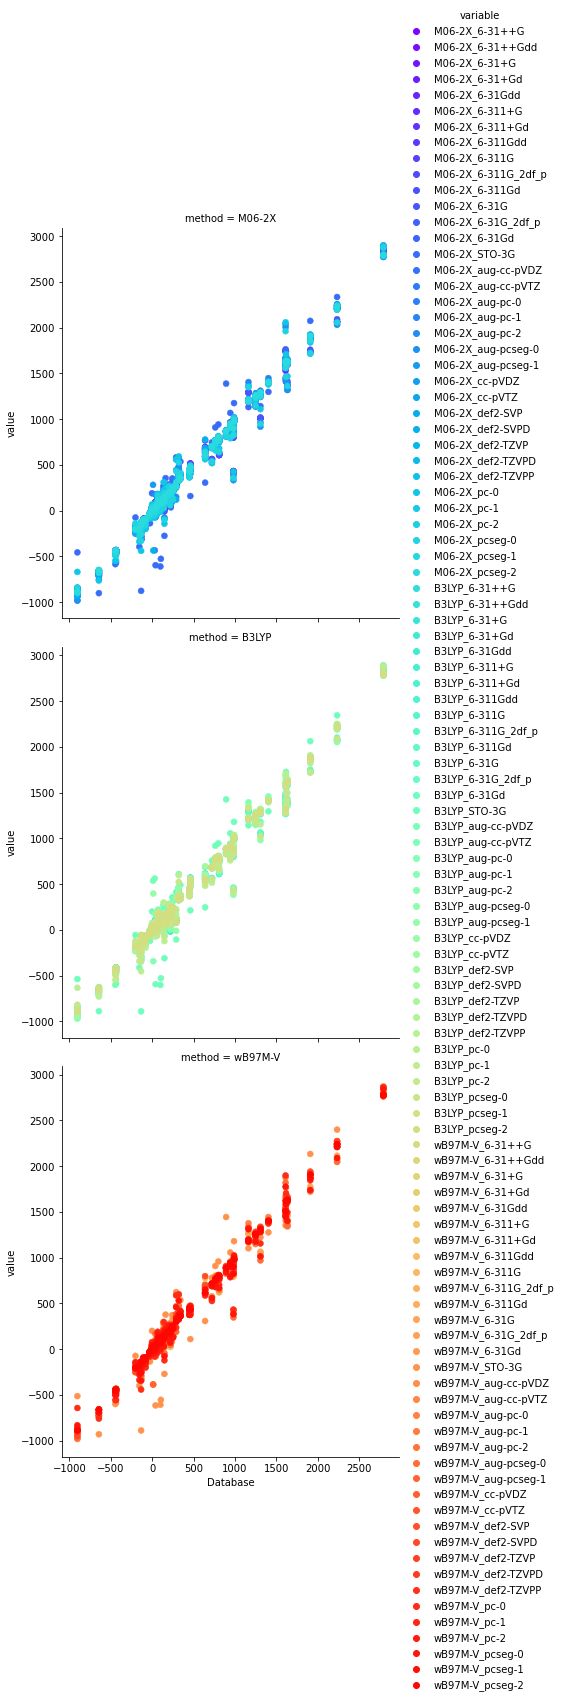

In [79]:
sns.relplot(x = "Database", y = "value", data=new_df, hue = 'variable', row = 'method', height = 6 , edgecolor=None, palette = 'rainbow')
#plt.xlim(-20,20)
#plt.ylim(-20,20)
plt.show()
#This is more painful to read due to the method determining the colour as well as the relplot (so M06-2X is always blue)
#want the values close to (0,0)?

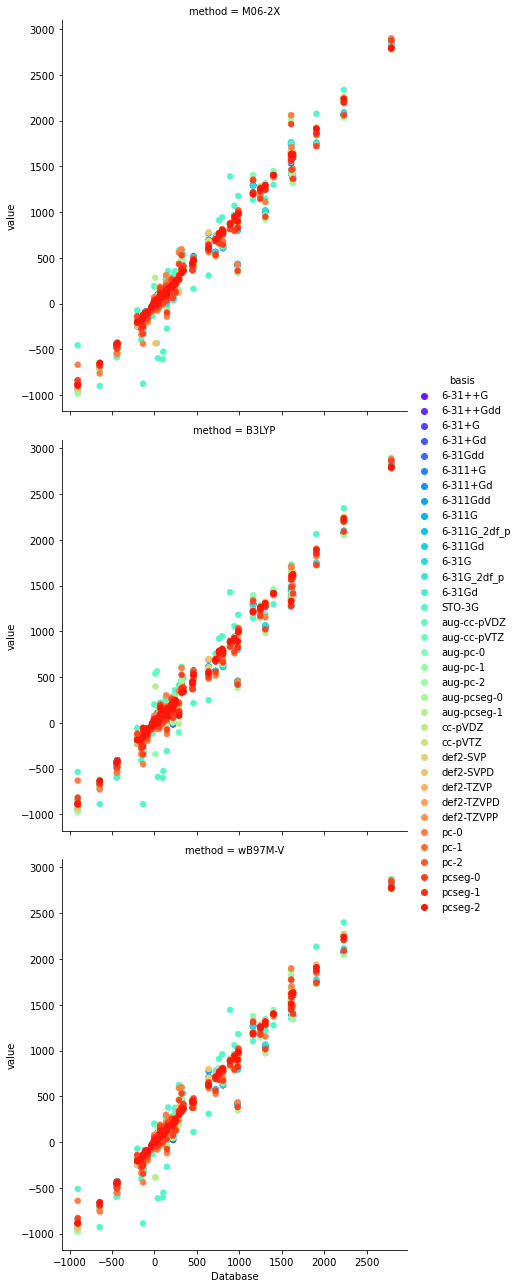

In [80]:
sns.relplot(x = "Database", y = "value", data=new_df, hue = 'basis', row = 'method',  height = 6 , edgecolor=None, palette = 'rainbow', alpha = 1)
#plt.xlim(120,140)
#plt.ylim(-500,500)

plt.show()

## Plot analysis

- These graphs are quite difficult to understand quickly.
- This is due to lots of data covering other bits of data - cant see aug-pcseg-1 at all 
- Zooming in could make it easier to read the data 
- Different basis sets are better with different methods
    - E.g. aug-pcseg-1 and aug-pc-1 perform best with wB97M-V  while pcseg-2 performs better with M06-2X (though pcseg-2 seems pretty goopd either way).
    - Could be interesting doing these graphs with varying methods and basis set being the constant?

# Summary Plots

In [81]:
new_means = new_means.sort_values(by=['value'], ascending = False)
new_means

name   method        basis variable       value
259        B3LYP_STO-3G    B3LYP       STO-3G     WMAD  206.330882
294      wB97M-V_STO-3G  wB97M-V       STO-3G     WMAD  192.750000
224       M06-2X_STO-3G   M06-2X       STO-3G     WMAD  188.727941
309        wB97M-V_pc-0  wB97M-V         pc-0     WMAD  182.617647
239         M06-2X_pc-0   M06-2X         pc-0     WMAD  174.808824
..                  ...      ...          ...      ...         ...
203  wB97M-V_def2-TZVPP  wB97M-V   def2-TZVPP      MSD    1.588480
121  M06-2X_aug-cc-pVTZ   M06-2X  aug-cc-pVTZ      MSD    1.395476
194    wB97M-V_aug-pc-2  wB97M-V     aug-pc-2      MSD    1.371083
200   wB97M-V_def2-SVPD  wB97M-V    def2-SVPD      MSD    0.890641
124     M06-2X_aug-pc-2   M06-2X     aug-pc-2      MSD    0.432122

[315 rows x 5 columns]

In [82]:
wmadonly = wmadonly.sort_values(by=['value'], ascending = False)
order_list = ['STO-3G','pc-0','pcseg-0','aug-pc-0','aug-pcseg-0','6-31G','6-31+G','6-31++G','6-31+Gd','6-31Gd','6-31Gdd','6-31G_2df_p','6-31++Gdd','6-311G','6-311Gd','6-311Gdd','6-311+G','6-311+Gd','6-311G_2df_p','def2-SVP','def2-SVPD','pc-1','pcseg-1','aug-pc-1','aug-pcseg-1','cc-pVDZ','aug-cc-pVDZ','cc-pVTZ','aug-cc-pVTZ','def2-TZVP','def2-TZVPP','def2-TZVPD','pc-2', 'pcseg-2','aug-pc-2']
hue_order = ['M06-2X', 'B3LYP', 'wB97M-V']


In [83]:
GRAPHRAPHRAPH = means.loc[means['method'] == 'wB97M-V']

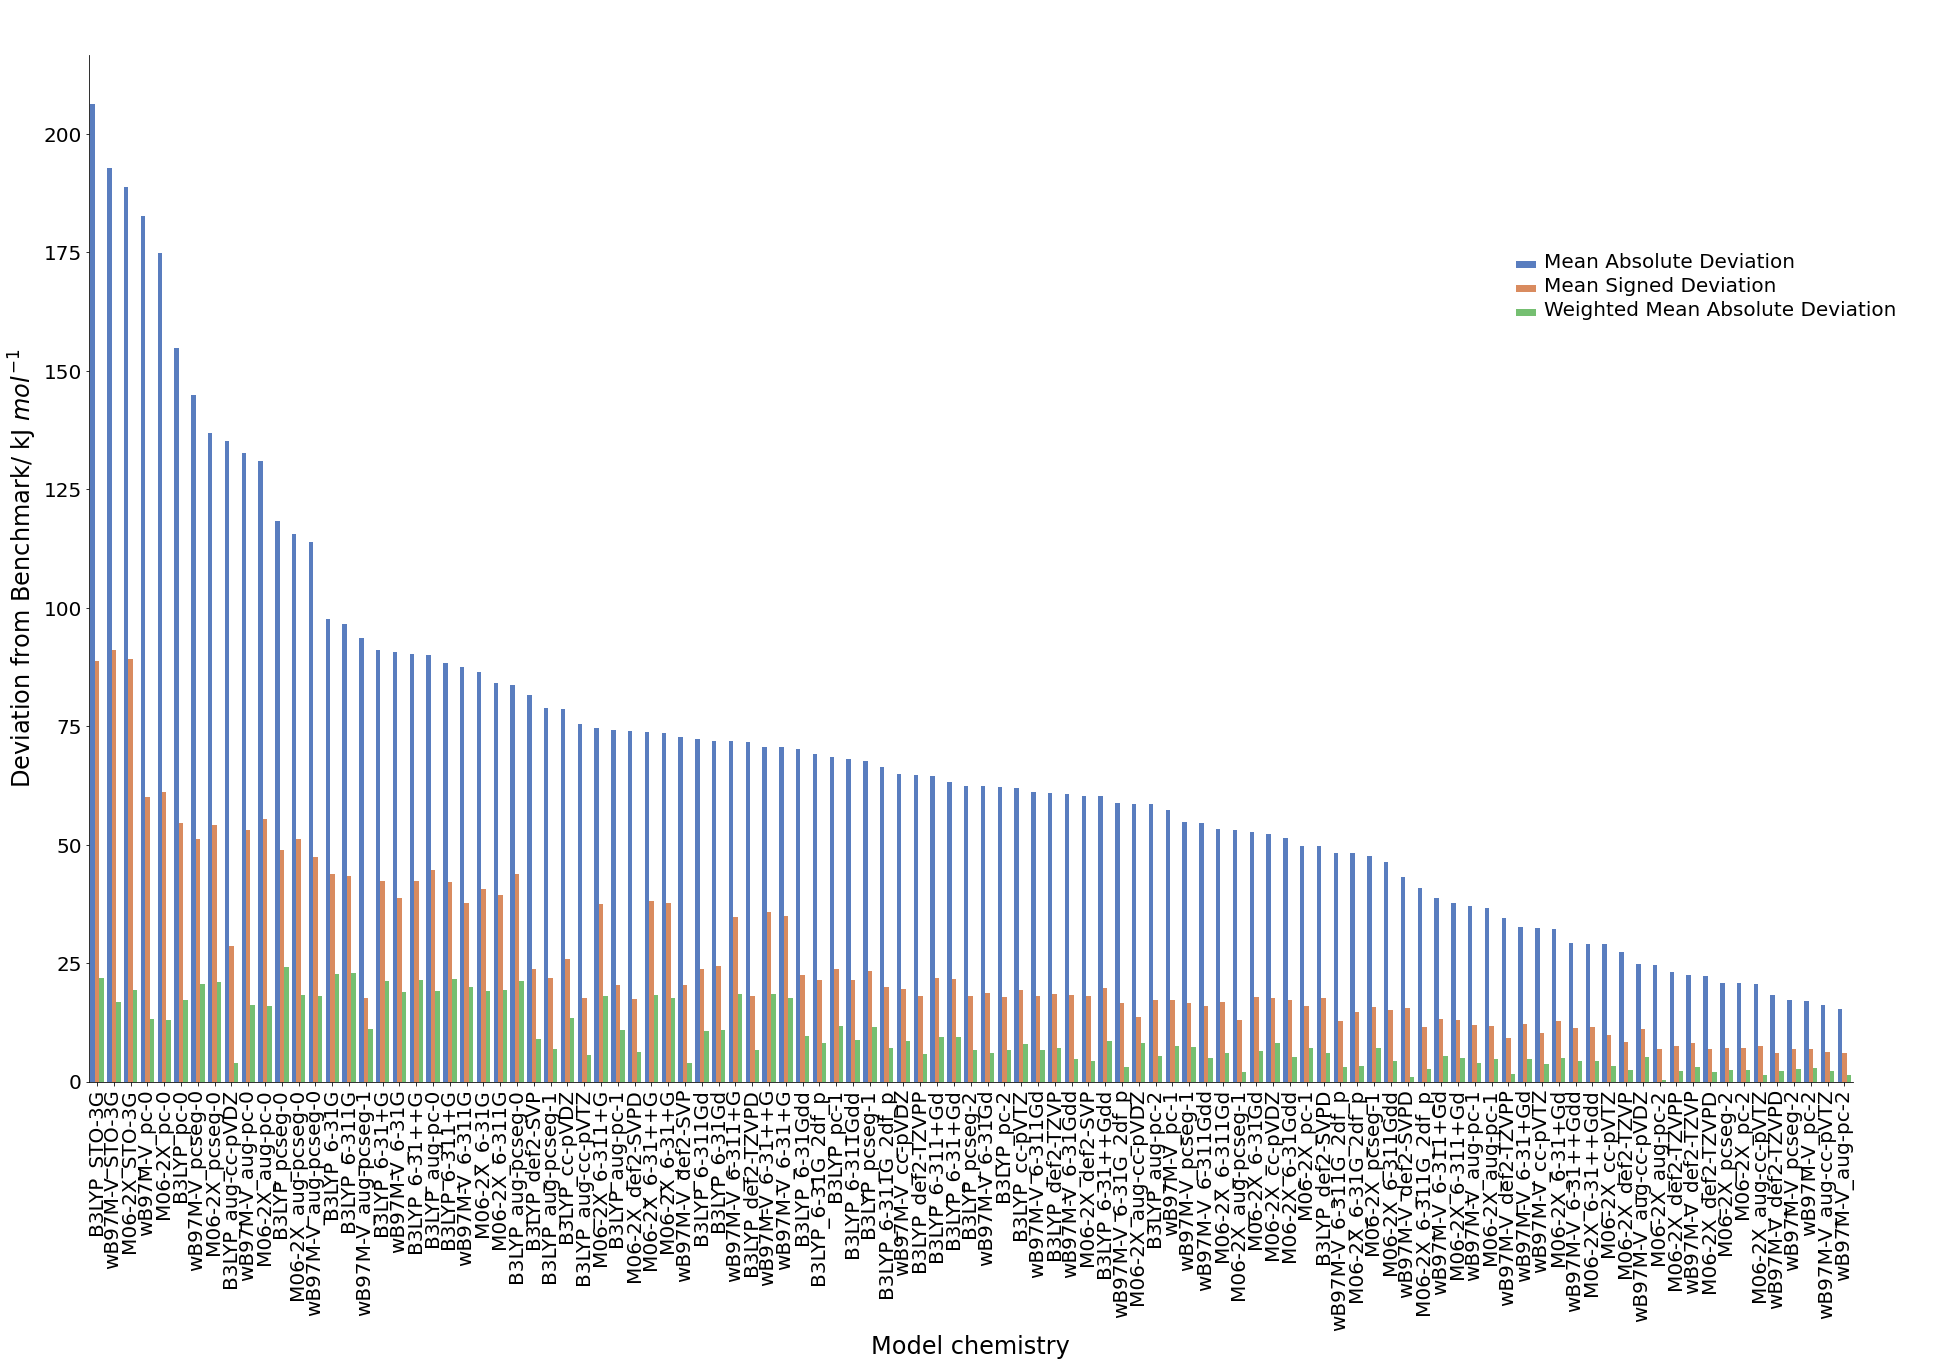

In [84]:
g = sns.catplot(x='name', y='value', hue = 'variable', data=new_means, kind='bar', height=15, palette="muted" ,aspect = 1.7)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)

plt.xlabel('Model chemistry', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

legend_title = ""
g._legend.set_title(legend_title)
leg = g._legend
leg.set_bbox_to_anchor([1, 1])
new_labels = ["Mean Absolute Deviation", "Mean Signed Deviation", "Weighted Mean Absolute Deviation"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.setp(g._legend.get_title(), fontsize=22)
plt.setp(g._legend.get_texts(), fontsize=20);
g.set_xticklabels(rotation=90)

#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

Really painful to read, though actually has some good information

    - MSD is negative for aug-pc-2? 
    
    - STO-3G is pretty bad as expected (same as other SZ basis sets)
    
        - This doesnt depend on the method, the basis is bad
        
    - Quite difficult to find the 'good' basis sets from this graph
    
    - Havent found a good way to change the x tick length to make easier to read (so i changed the aspect and height)

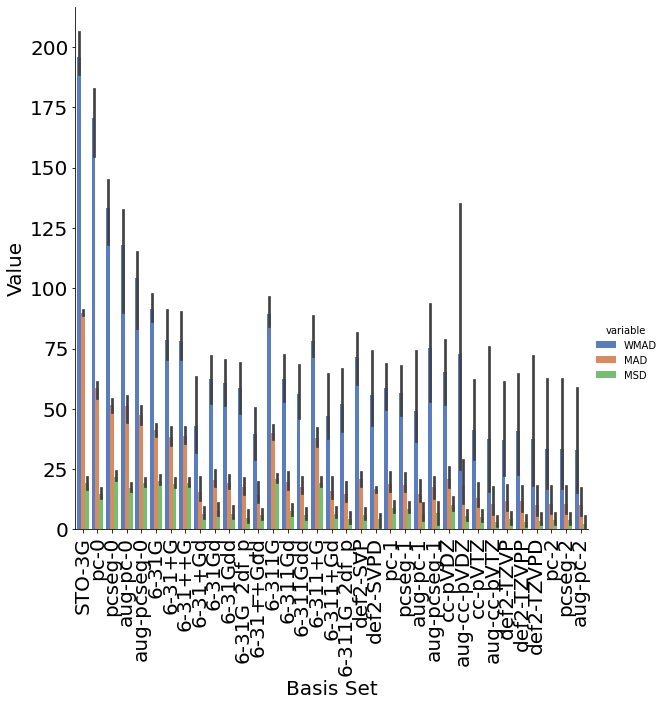

In [85]:
g=sns.catplot(x='basis', y='value', hue = 'variable', data=new_means, kind='bar', height=8, palette="muted",order=order_list)#, aspect=3, order=means["basis"])
g.set_xticklabels(rotation=90)
#plt.ylim(-10,250)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=20)
plt.ylabel('Value', fontsize=20)
#plt.ylim(-20,30)
plt.show()

- This plot is great at showing which is a good basis set and which isnt
    - SZ are clearly bad
    - Better than the previous at getting the point across about method vs basis set for these calculations
- Some of these are missing error bars? 
    - Not really sure why...

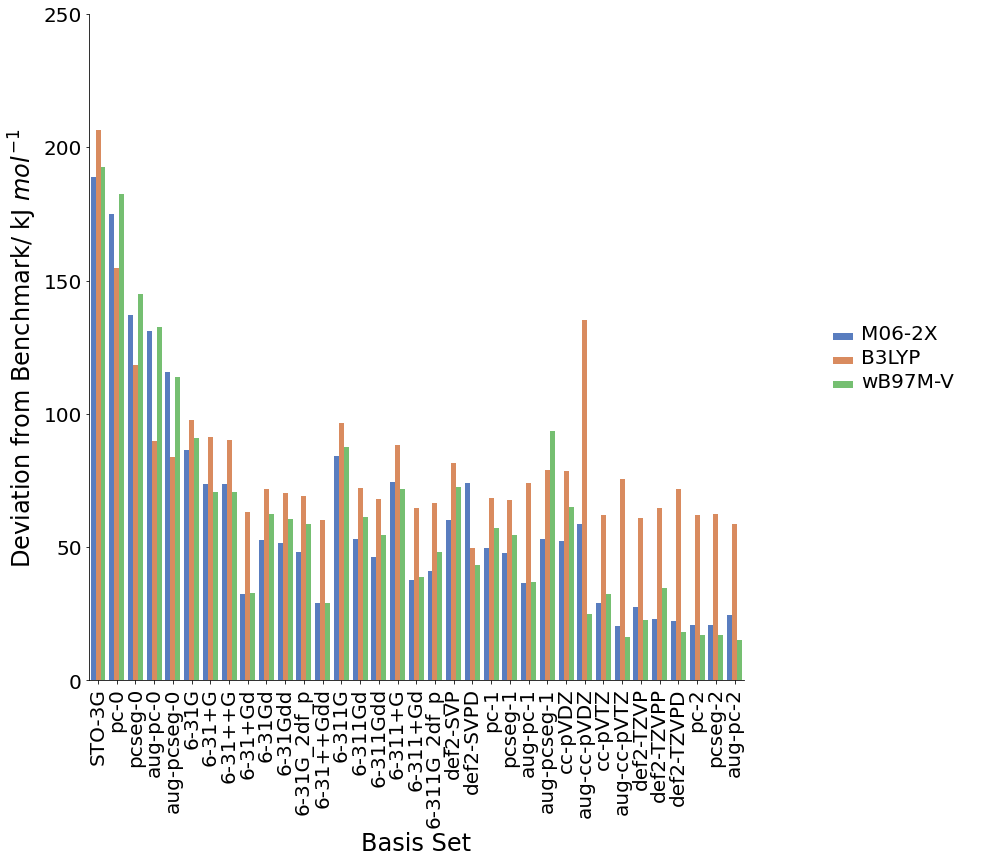

In [86]:
plt.show()

g = sns.catplot(x='basis', y='value', hue = 'method', data=wmadonly, kind='bar', height=10, palette="muted",order=order_list,hue_order=hue_order)

plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

legend_title = ""
g._legend.set_title(legend_title)
leg = g._legend
leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(g._legend.get_title(), fontsize=22)
plt.setp(g._legend.get_texts(), fontsize=20);
g.set_xticklabels(rotation=90)
plt.ylim(0, 250)


#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

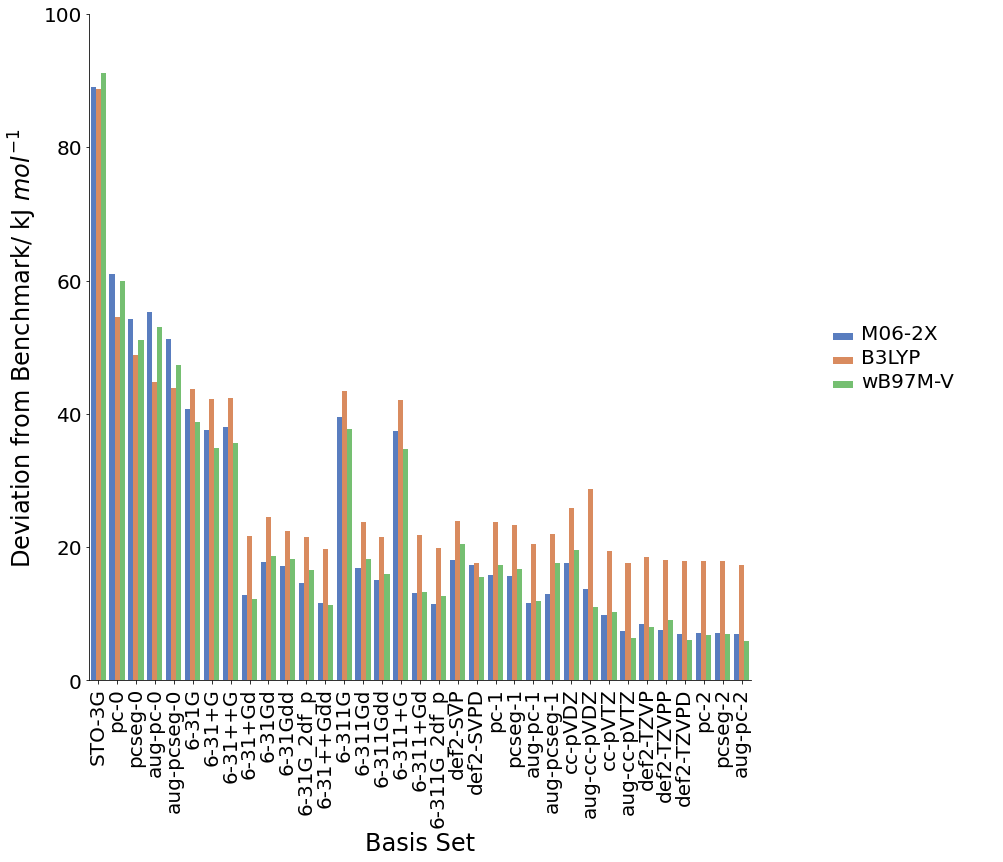

In [87]:
plt.show()

g = sns.catplot(x='basis', y='value', hue = 'method', data=madonly, kind='bar', height=10, palette="muted",order=order_list,hue_order=hue_order)

plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

legend_title = ""
g._legend.set_title(legend_title)
leg = g._legend
leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(g._legend.get_title(), fontsize=22)
plt.setp(g._legend.get_texts(), fontsize=20);
g.set_xticklabels(rotation=90)
plt.ylim(0, 100)


#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

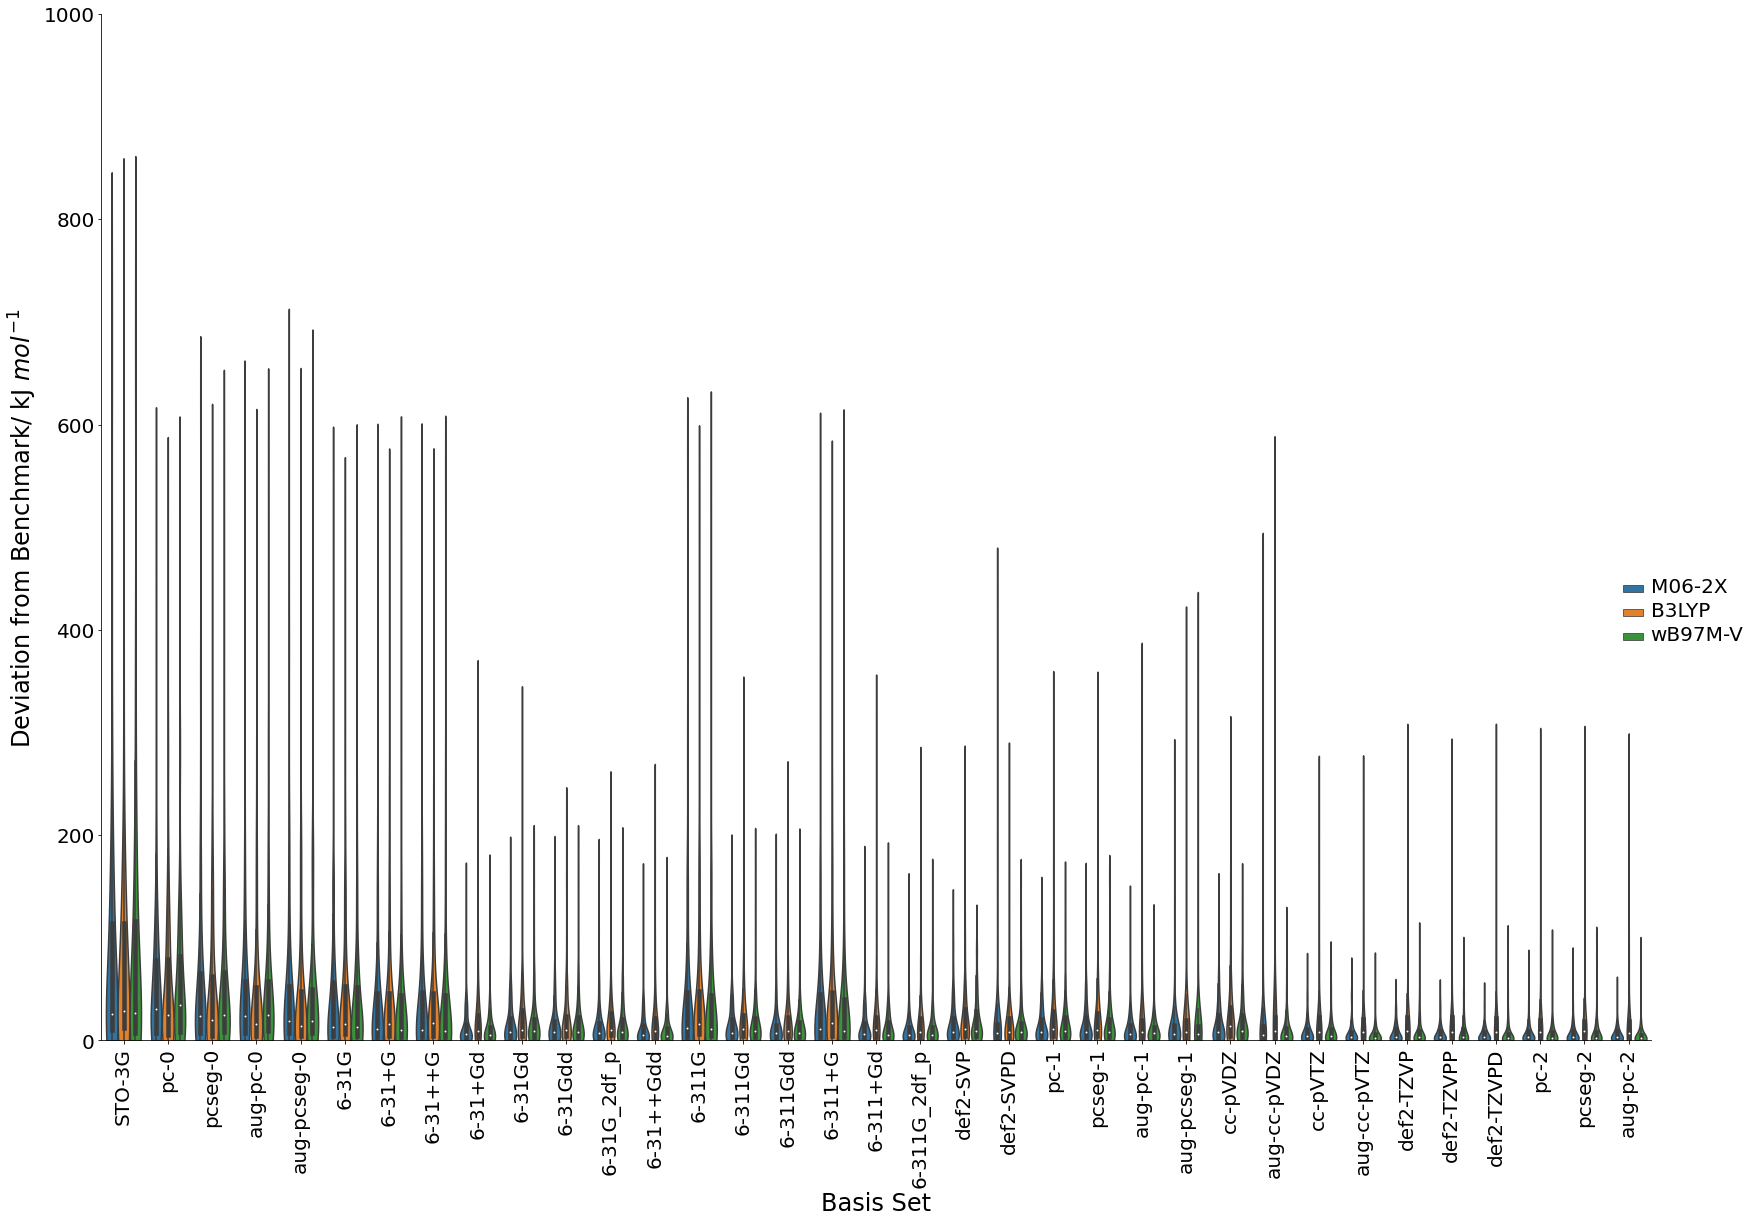

In [88]:
q = sns.catplot(data=new_df, x="basis", y = "MAD",kind = 'violin',hue="method", height = 15, aspect =1.5,order=order_list,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


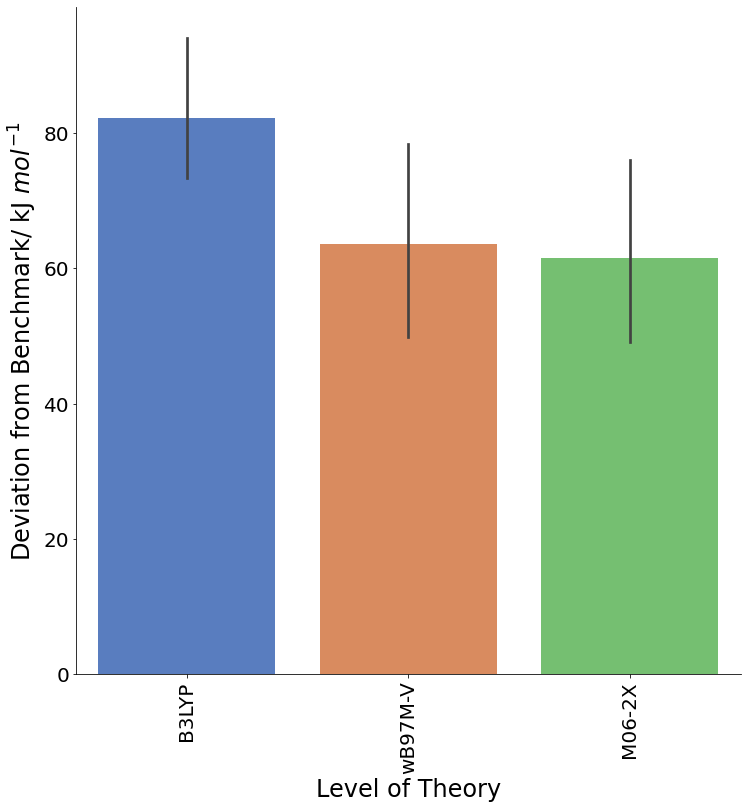

In [89]:
g=sns.catplot(x='method', y='value', data=wmadonly, kind='bar', height=10, palette="muted",hue_order=['M06-2X','B3LYP','wB97M-V'])

plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Level of Theory', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

g.set_xticklabels(rotation=90)

#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

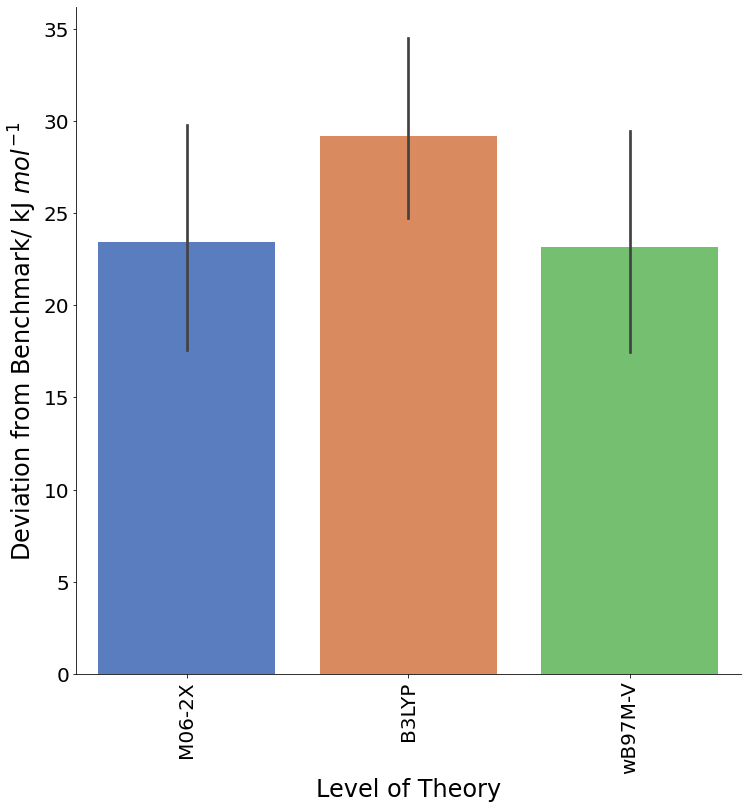

In [90]:
g=sns.catplot(x='method', y='value', data=madonly, kind='bar', height=10, palette="muted",hue_order=hue_order)

plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Level of Theory', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

g.set_xticklabels(rotation=90)

#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

M06-2X being so close wB97M-V is concerning? Im not sure if thats an indication of a problem or not

Clearly shows that wB97M-V is a better method than B3LYP (and that we really shouldnt use B3LYP)

In [91]:
DataFrame_means_wB97MV
DataFrame_means_B3LYP
DataFrame_means_M062X
DataFrame_new_df_wB97MV
DataFrame_new_df_B3LYP
DataFrame_new_df_M062X

Reaction id    Database        variable       value  method    basis  \
0       ACONF_11   11.012297  M06-2X_6-31++G    8.917241  M06-2X  6-31++G   
1       ACONF_14   12.899284  M06-2X_6-31++G   10.749396  M06-2X  6-31++G   
2        AHB21_6 -106.775774  M06-2X_6-31++G -113.322399  M06-2X  6-31++G   
3       AHB21_10 -156.105181  M06-2X_6-31++G -182.279688  M06-2X  6-31++G   
4       AHB21_15  -36.066113  M06-2X_6-31++G  -45.262878  M06-2X  6-31++G   
...          ...         ...             ...         ...     ...      ...   
4755    YBDE18_6  216.480354  M06-2X_pcseg-2  196.435690  M06-2X  pcseg-2   
4756    YBDE18_8  224.806521  M06-2X_pcseg-2  199.450337  M06-2X  pcseg-2   
4757    YBDE18_9  136.314842  M06-2X_pcseg-2  136.618303  M06-2X  pcseg-2   
4758   YBDE18_13  218.739715  M06-2X_pcseg-2  206.730456  M06-2X  pcseg-2   
4759   YBDE18_16  251.500465  M06-2X_pcseg-2  234.294473  M06-2X  pcseg-2   

            MSD        MAD Data Source  WMAD  
0      2.095057   2.095057       ACONF    64  
1      2.149888   2.149888       ACONF    66  
2      6.546625   6.546625       AHB21    16  
3     26.174507  26.174507       AHB21    66  
4      9.196765   9.196765       AHB21    23  
...         ...        ...         ...   ...  
4755  20.044664  20.044664      YBDE18    23  
4756  25.356184  25.356184      YBDE18    29  
4757  -0.303461   0.303461      YBDE18     0  
4758  12.009259  12.009259      YBDE18    13  
4759  17.205992  17.205992      YBDE18    19  

[4760 rows x 10 columns]

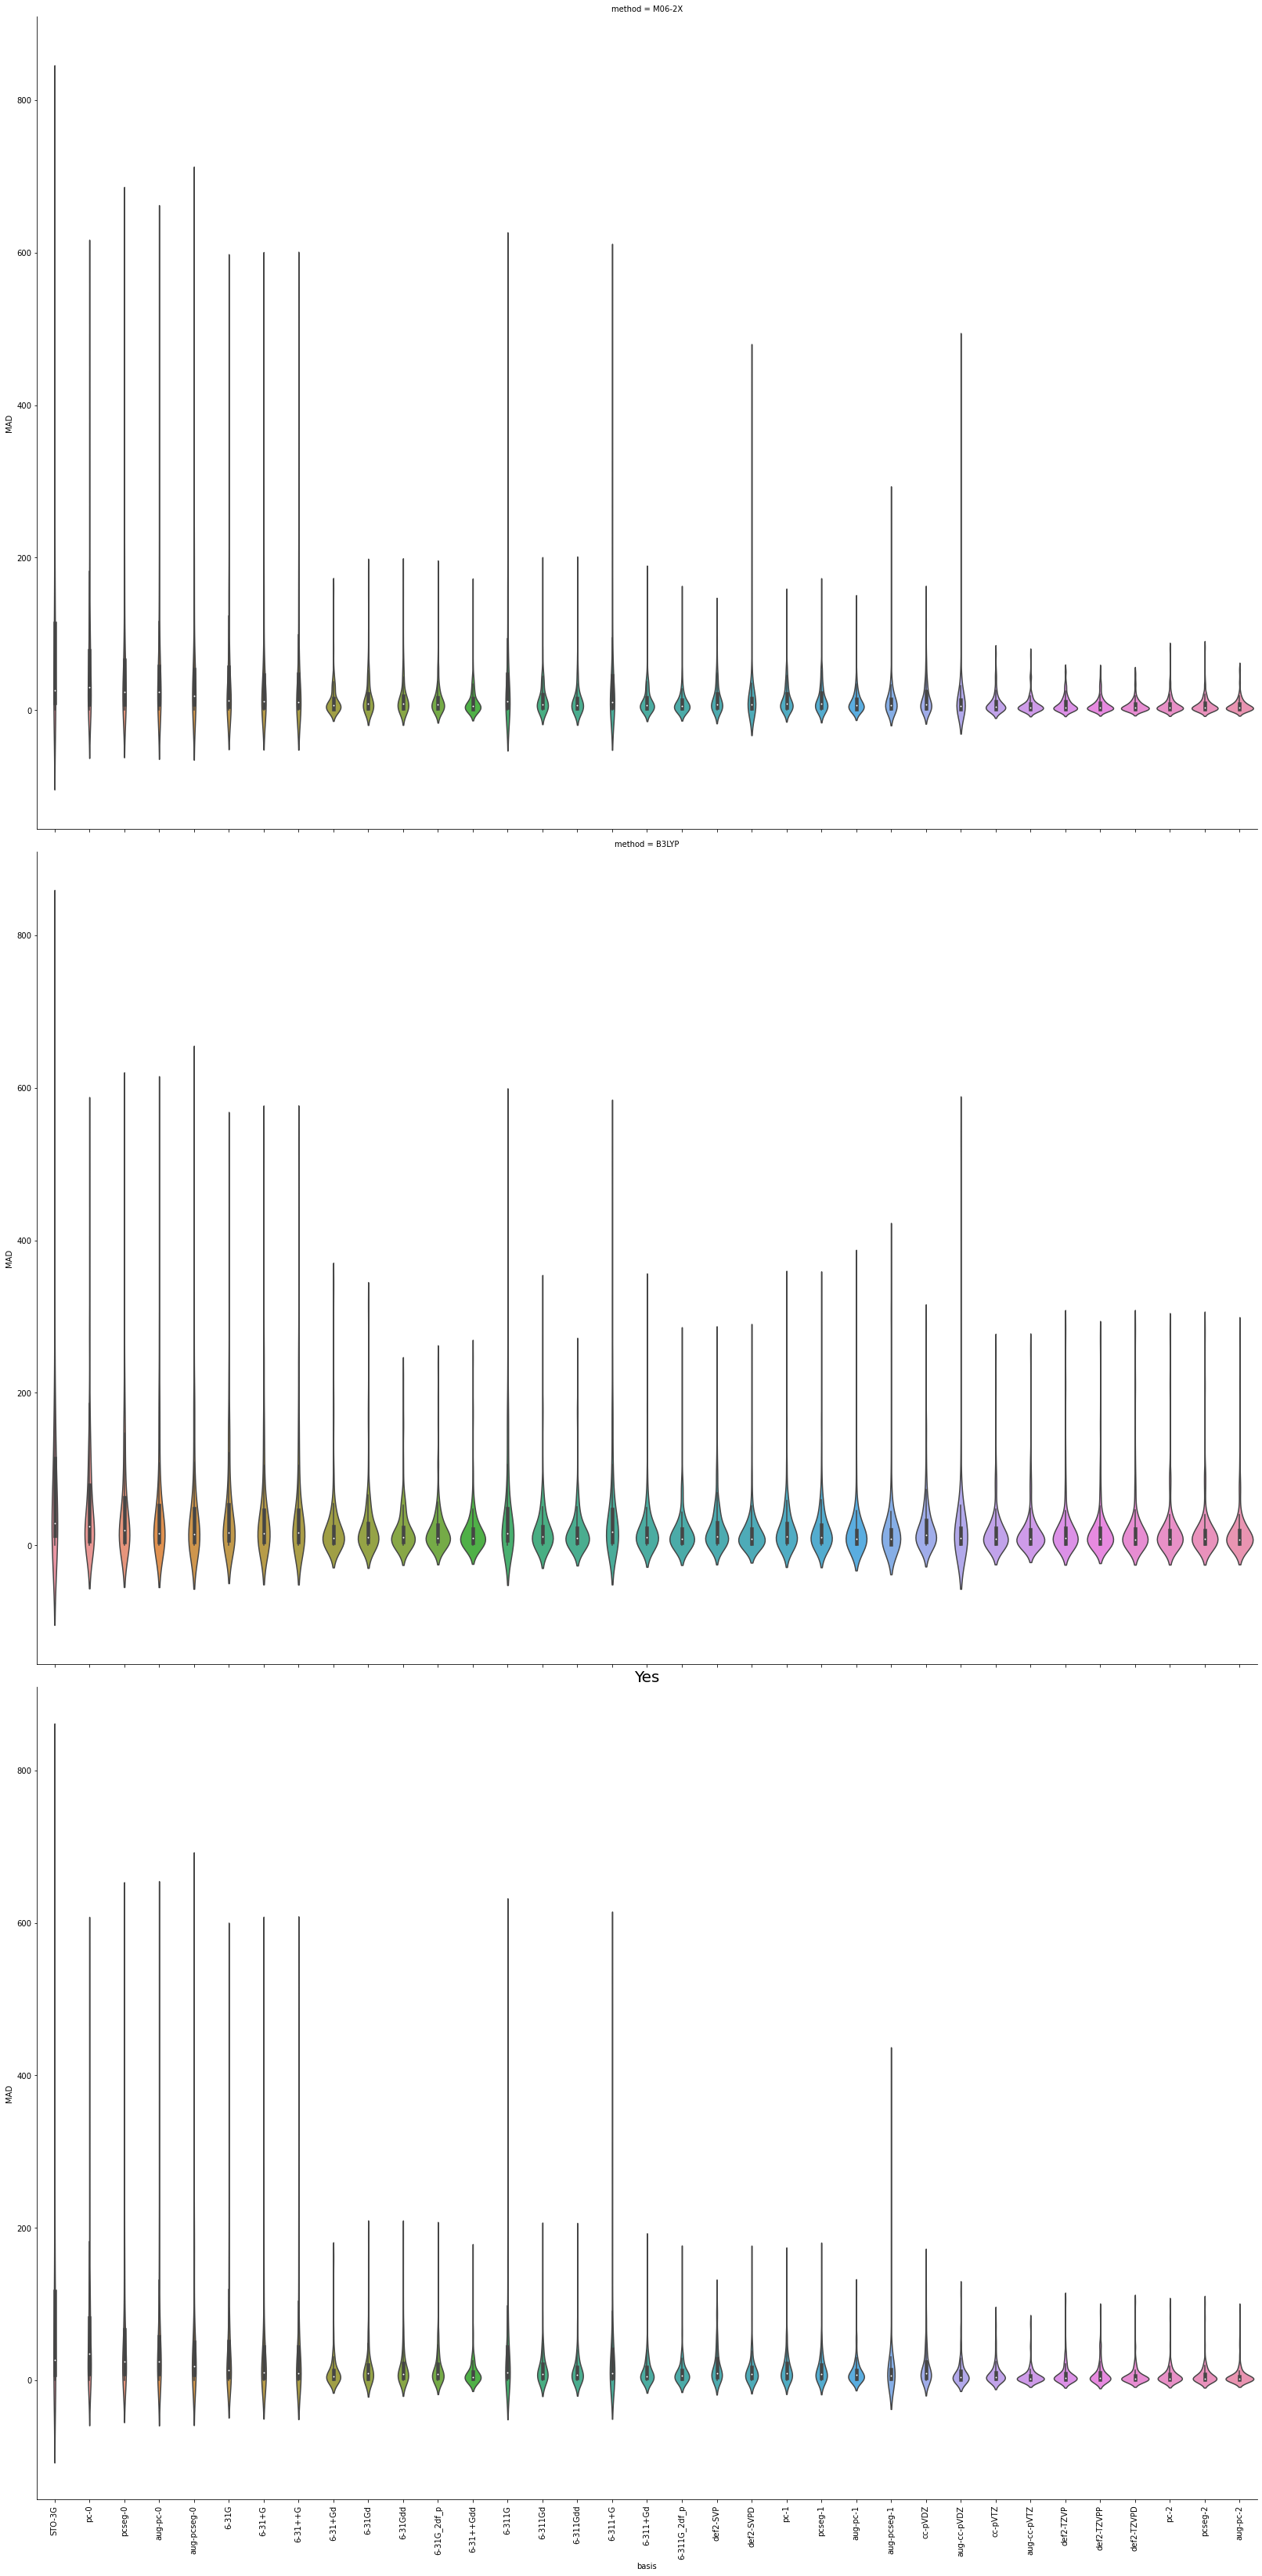

In [92]:
g = sns.catplot(data=new_df, x="basis", y = "MAD",kind = 'violin', height = 15,row="method", aspect =1.5,order=order_list,hue_order=hue_order)
#plt.xlim(120,140)
#plt.ylim(-500,500)
g.set_xticklabels(rotation=90)
plt.title('Yes',fontsize=20)
plt.show()


#leg.set_bbox_to_anchor([1.2, 0.7])

#plt.setp(q._legend.get_texts(), fontsize=20);


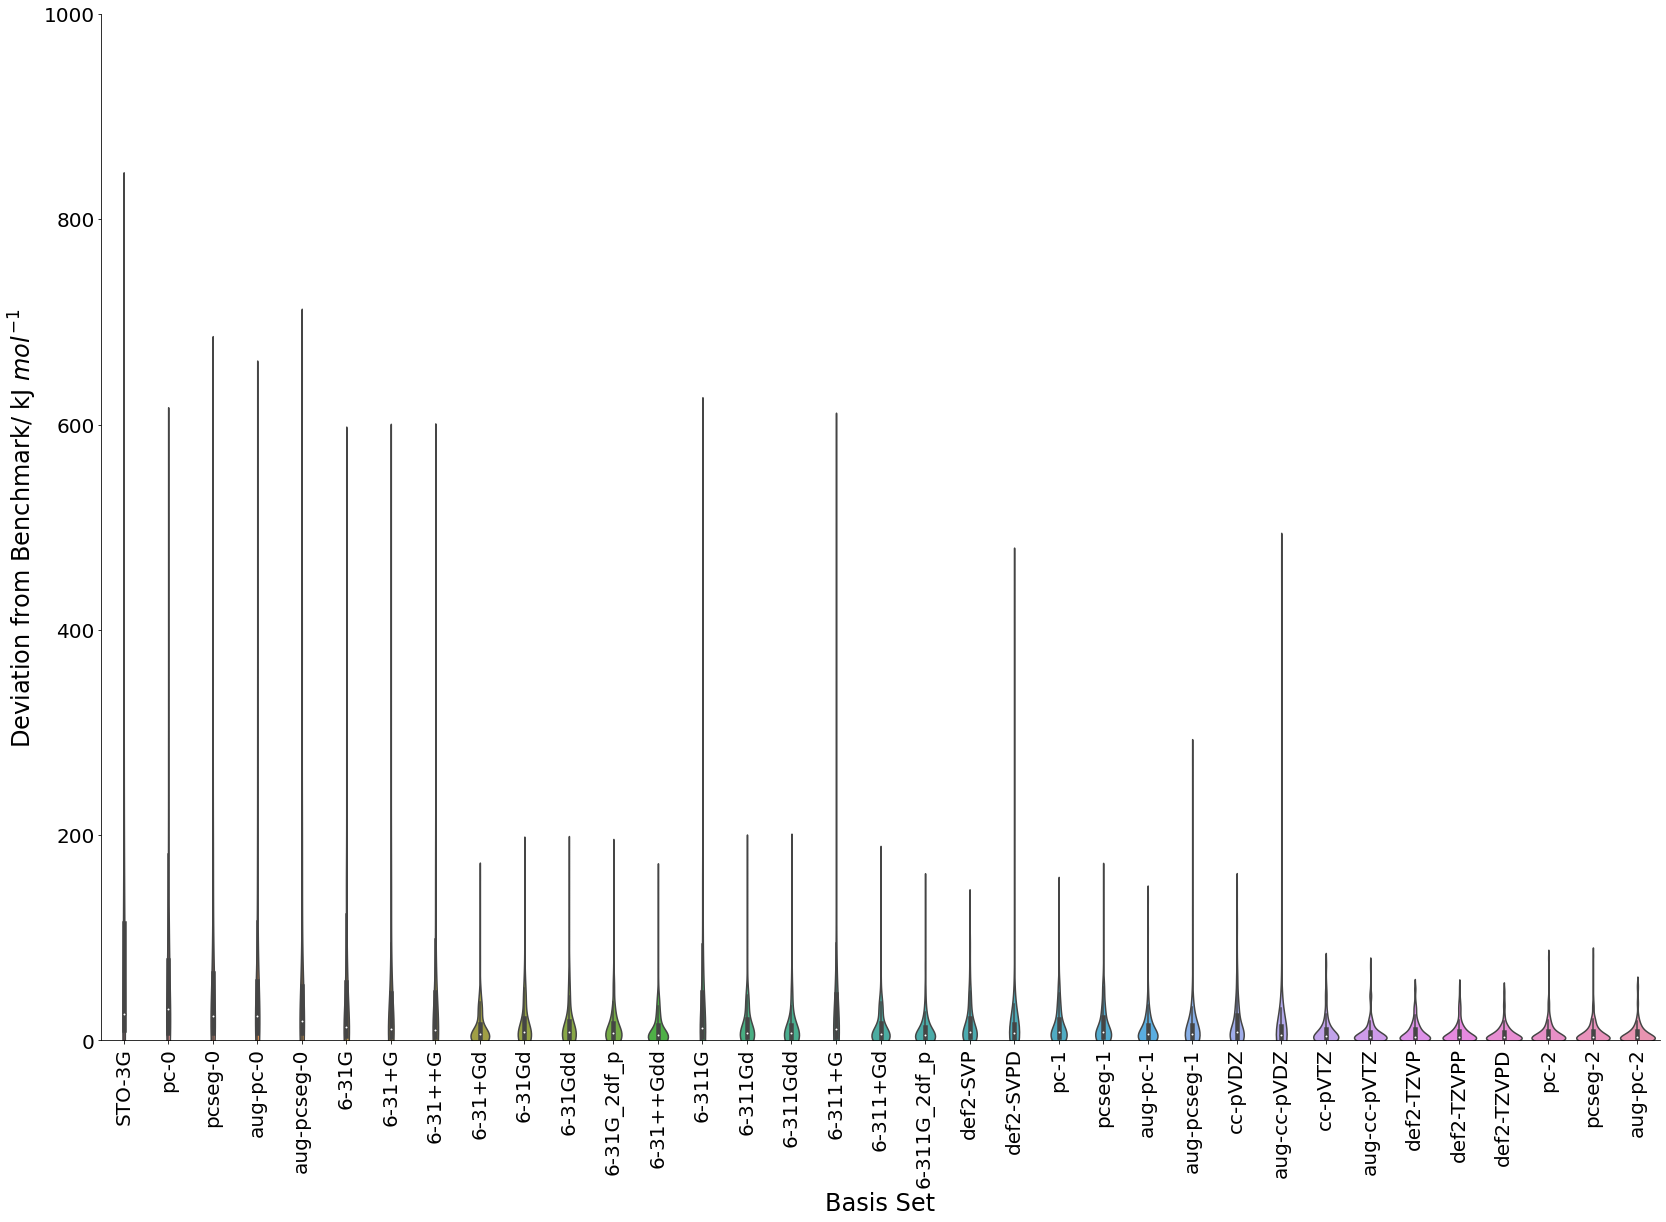

In [93]:
q = sns.catplot(data=DataFrame_new_df_M062X, x="basis", y = "MAD",kind = 'violin', height = 15, aspect =1.5,order=order_list,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
plt.ylim(0,1000)
q.set_xticklabels(rotation=90)
legend_title = ""
#q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
#plt.setp(q._legend.get_title(), fontsize=22)
#plt.setp(q._legend.get_texts(), fontsize=20);



In [94]:
DoubleandTripleZeta=new_df.loc[new_df['basis'] == 'cc-pVTZ']
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'aug-cc-pVTZ'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'def2-TZVP'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'def2-TZVPP'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'def2-TZVPD'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'pc-2'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'pcseg-2'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'aug-pc-2'])

#DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31G'])
#DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31+G'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31Gd'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31Gdd'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31+Gd'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31G_2df_p'])
#DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31++G'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31++Gdd'])

#DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311G'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311Gdd'])
#DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311+G'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311+Gd'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311Gd'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311G_2df_p'])

DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'def2-SVP'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'def2-SVPD'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'pc-1'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'pcseg-1'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'aug-pc-1'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'aug-pcseg-1'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'cc-pVDZ'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'aug-cc-pVDZ'])

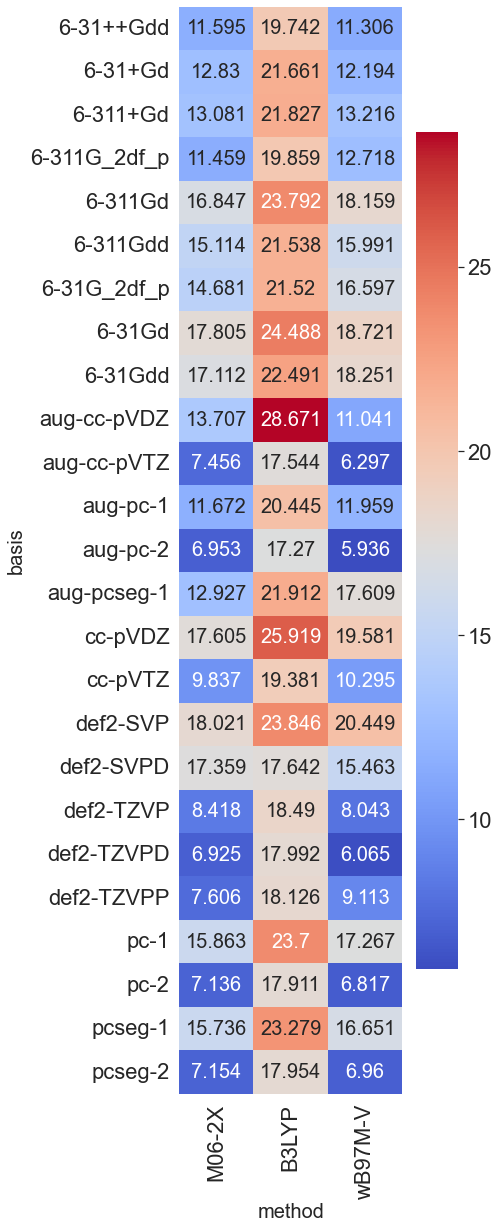

In [95]:
plt.figure(figsize = (5,20))
sns.set(font_scale=2)
df_heatmap = DoubleandTripleZeta.pivot_table(values='MAD',index='basis',columns='method')
df_heatmap=df_heatmap.reindex(columns=['M06-2X','B3LYP','wB97M-V'])
df_heatmap = df_heatmap.round(decimals=3)
z=sns.heatmap(df_heatmap,annot=True,cmap="coolwarm",fmt='g',annot_kws={"fontsize":20})
plt.xlabel('method',fontsize=20)
plt.ylabel('basis',fontsize=20)
#z.set_xticklabels(rotation=90)
plt.show()

In [96]:
Logged_MAD = np.log(new_df['MAD'])
Logged_df = new_df
Logged_df['Log MAD'] = Logged_MAD
Logged_df

Reaction id    Database         variable       value   method    basis  \
0        ACONF_11   11.012297   M06-2X_6-31++G    8.917241   M06-2X  6-31++G   
1        ACONF_14   12.899284   M06-2X_6-31++G   10.749396   M06-2X  6-31++G   
2         AHB21_6 -106.775774   M06-2X_6-31++G -113.322399   M06-2X  6-31++G   
3        AHB21_10 -156.105181   M06-2X_6-31++G -182.279688   M06-2X  6-31++G   
4        AHB21_15  -36.066113   M06-2X_6-31++G  -45.262878   M06-2X  6-31++G   
...           ...         ...              ...         ...      ...      ...   
14275    YBDE18_6  216.480354  wB97M-V_pcseg-2  211.022395  wB97M-V  pcseg-2   
14276    YBDE18_8  224.806521  wB97M-V_pcseg-2  213.272656  wB97M-V  pcseg-2   
14277    YBDE18_9  136.314842  wB97M-V_pcseg-2  124.307191  wB97M-V  pcseg-2   
14278   YBDE18_13  218.739715  wB97M-V_pcseg-2  187.103283  wB97M-V  pcseg-2   
14279   YBDE18_16  251.500465  wB97M-V_pcseg-2  243.255221  wB97M-V  pcseg-2   

             MSD        MAD Data Source  WMAD   Log MAD  
0       2.095057   2.095057       ACONF    64  0.739581  
1       2.149888   2.149888       ACONF    66  0.765416  
2       6.546625   6.546625       AHB21    16  1.878950  
3      26.174507  26.174507       AHB21    66  3.264786  
4       9.196765   9.196765       AHB21    23  2.218852  
...          ...        ...         ...   ...       ...  
14275   5.457959   5.457959      YBDE18     6  1.697075  
14276  11.533865  11.533865      YBDE18    13  2.445287  
14277  12.007651  12.007651      YBDE18    13  2.485544  
14278  31.636432  31.636432      YBDE18    36  3.454309  
14279   8.245244   8.245244      YBDE18     9  2.109637  

[14280 rows x 11 columns]

In [97]:
TripleZetaOrder=['cc-pVTZ','aug-cc-pVTZ','def2-TZVP','def2-TZVPP','def2-TZVPD','pc-2', 'pcseg-2','aug-pc-2','6-311G','6-311+G','6-311+Gd','6-311Gd','6-311Gdd','6-311G_2df_p']
TripleZeta=Logged_df.loc[Logged_df['basis'] == 'cc-pVTZ']
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-cc-pVTZ'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'def2-TZVP'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'def2-TZVPP'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'def2-TZVPD'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pc-2'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pcseg-2'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-pc-2'])

DoubleZetaOrder=['6-31G','6-31+G','6-31Gd','6-31Gdd','6-31+Gd','6-31G_2df_p','6-31++G','6-31++Gdd','def2-SVP','def2-SVPD','pc-1','pcseg-1','aug-pc-1','aug-pcseg-1','cc-pVDZ','aug-cc-pVDZ']
DoubleZeta=Logged_df.loc[Logged_df['basis'] == '6-31G']
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31+G'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31Gd'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31Gdd'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31+Gd'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31G_2df_p'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31++G'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31++Gdd'])

TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311G'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311Gdd'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311+G'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311+Gd'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311Gd'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311G_2df_p'])

DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'def2-SVP'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'def2-SVPD'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pc-1'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pcseg-1'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-pc-1'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-pcseg-1'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'cc-pVDZ'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-cc-pVDZ'])

SingleZetaOrder=['STO-3G','pc-0','pcseg-0','aug-pc-0','aug-pcseg-0']
SingleZeta=Logged_df.loc[Logged_df['basis'] == 'STO-3G']
SingleZeta=SingleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pc-0'])
SingleZeta=SingleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pcseg-0'])
SingleZeta=SingleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-pc-0'])
SingleZeta=SingleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-pcseg-0'])



PopleOnly=Logged_df.loc[Logged_df['basis'] == '6-31G']
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31+G'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31Gd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31Gdd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31+Gd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31G_2df_p'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31++G'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31++Gdd'])

PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311G'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311Gdd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311+G'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311+Gd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311Gd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311G_2df_p'])

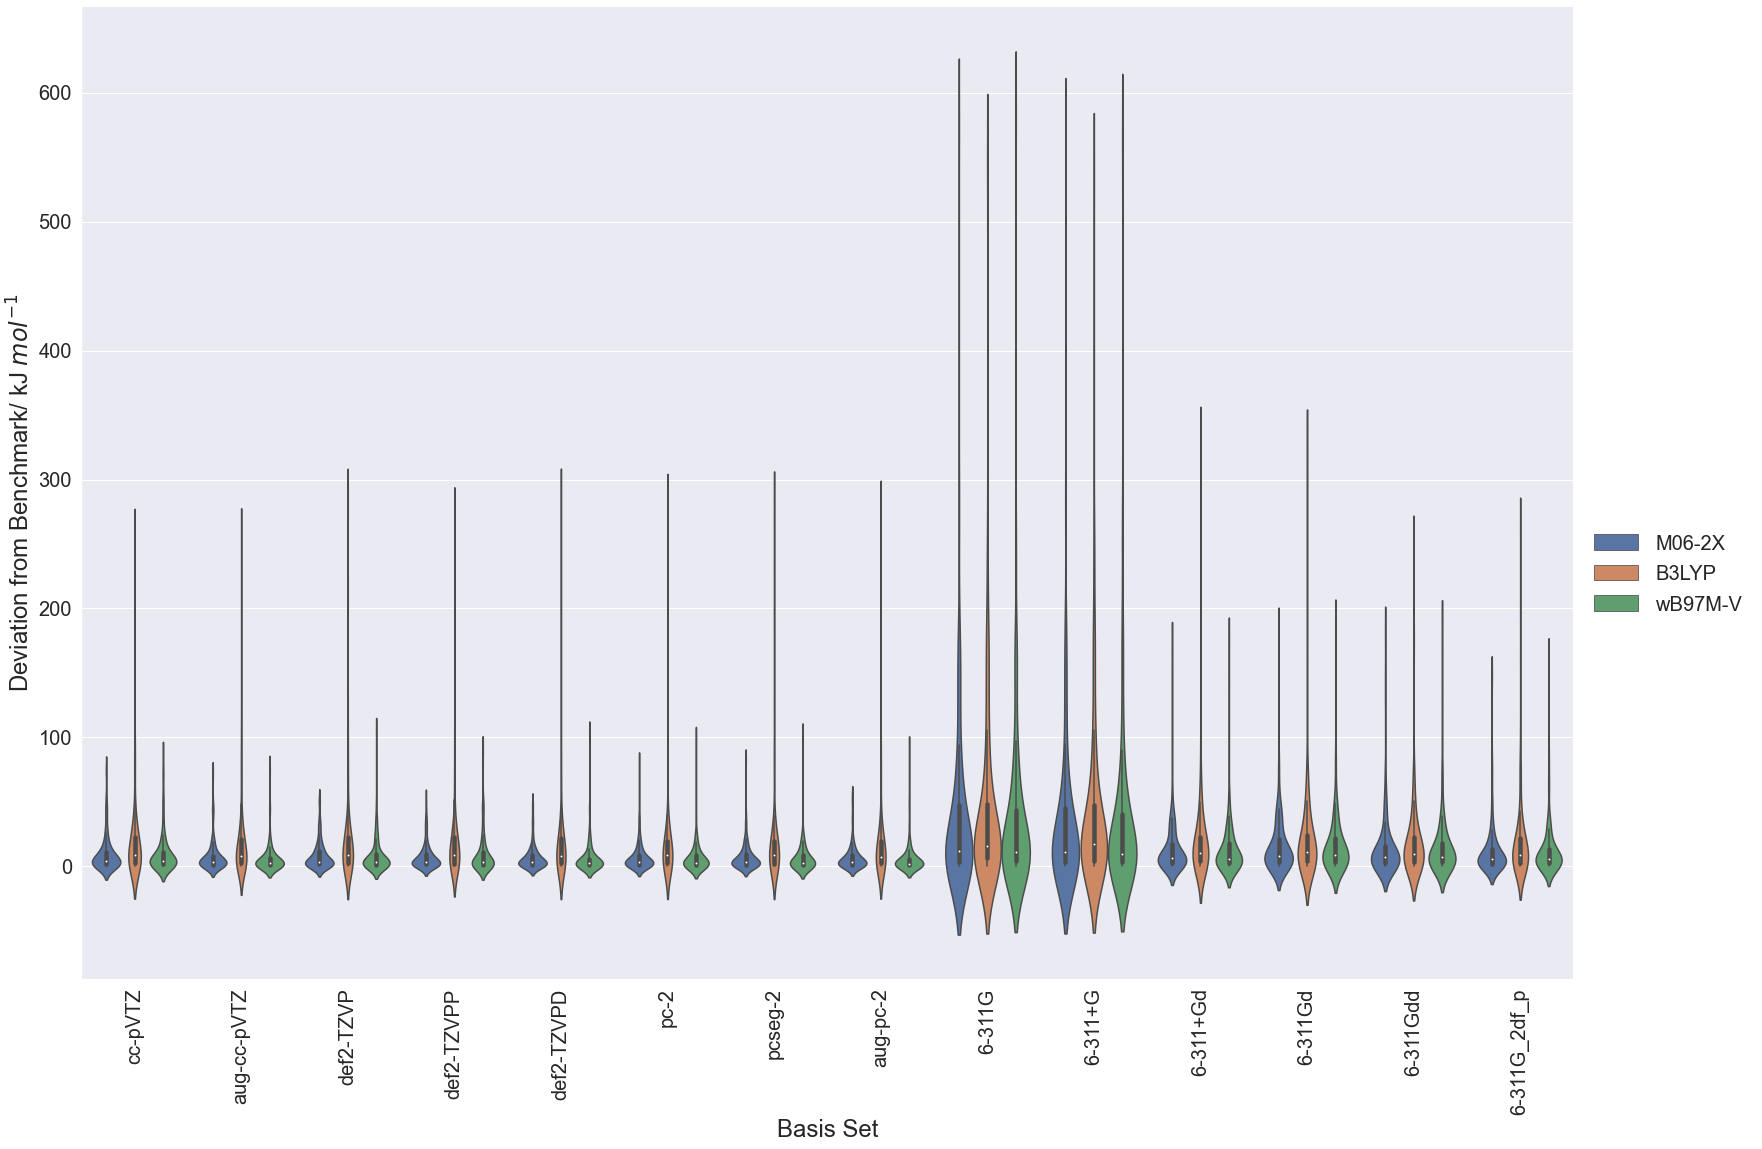

In [98]:
q = sns.catplot(data=TripleZeta, x="basis", y = "MAD",kind = 'violin',hue="method", height = 15, aspect =1.5,order=TripleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


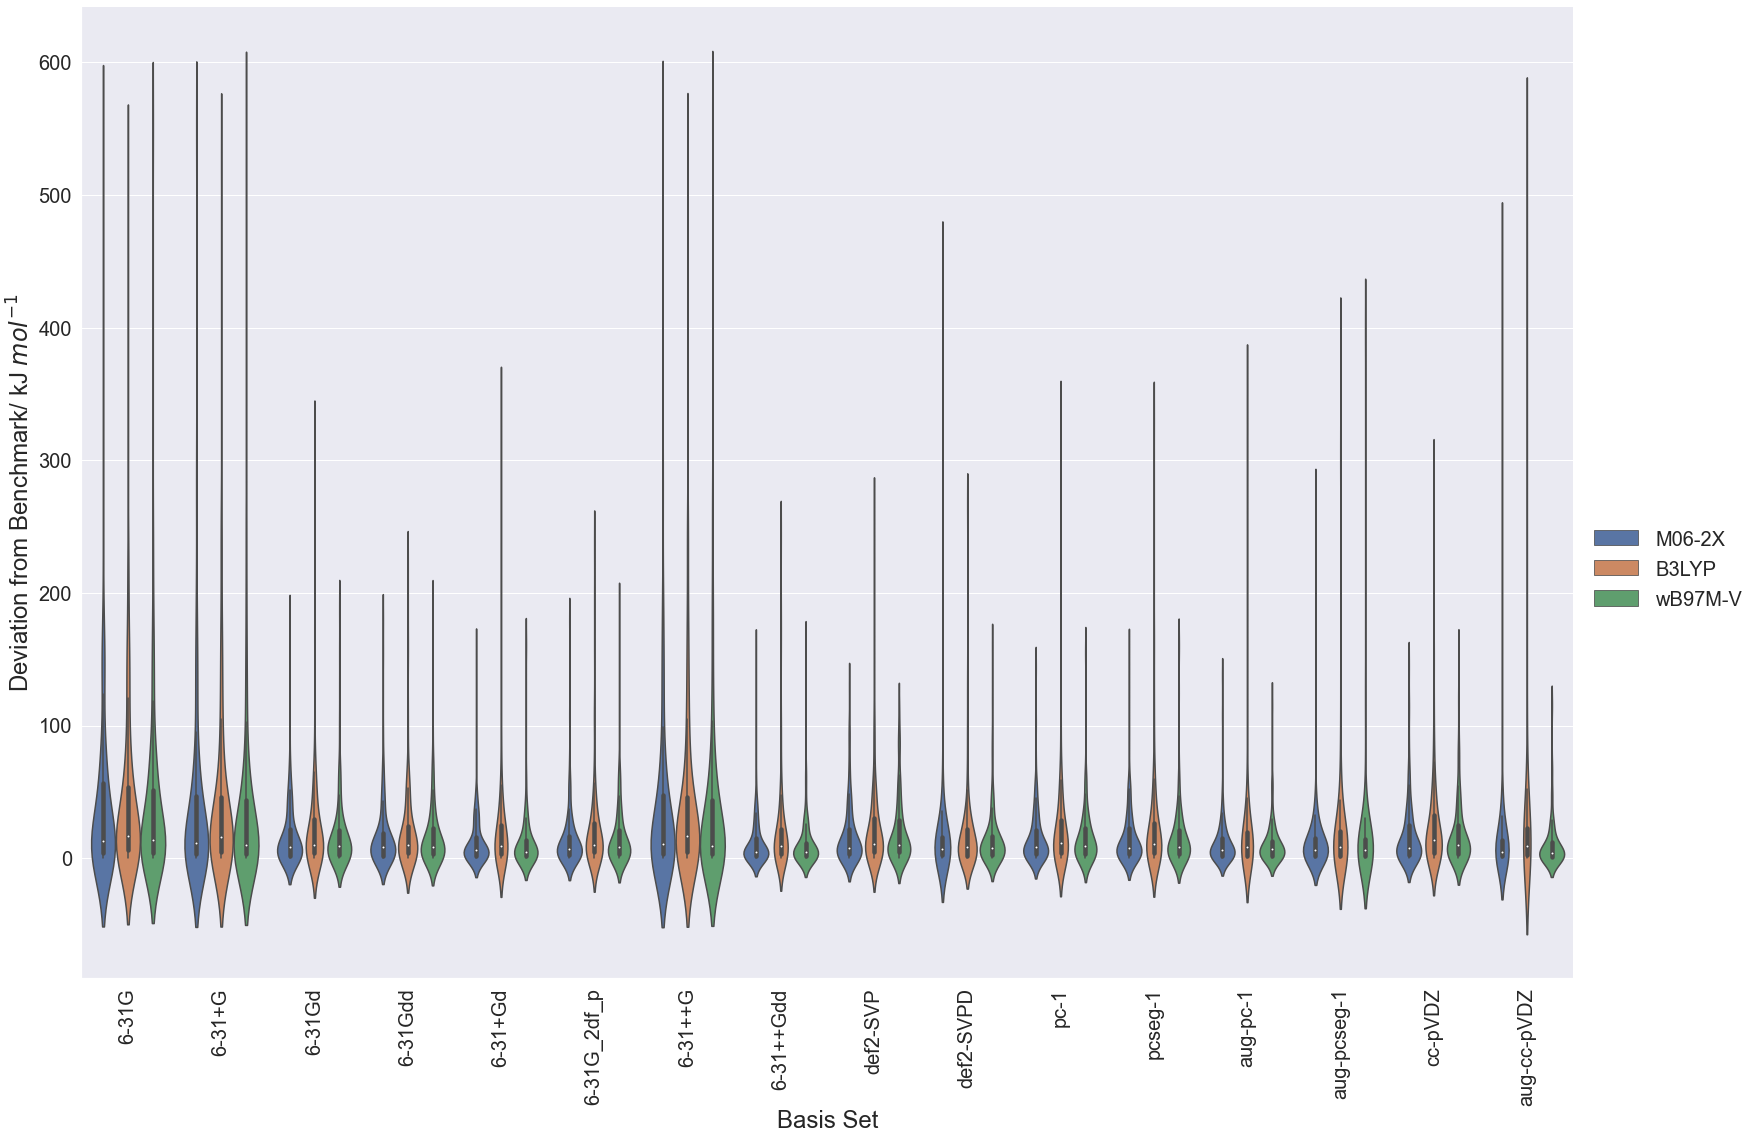

In [99]:
q = sns.catplot(data=DoubleZeta, x="basis", y = "MAD",kind = 'violin',hue="method", height = 15, aspect =1.5,order=DoubleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


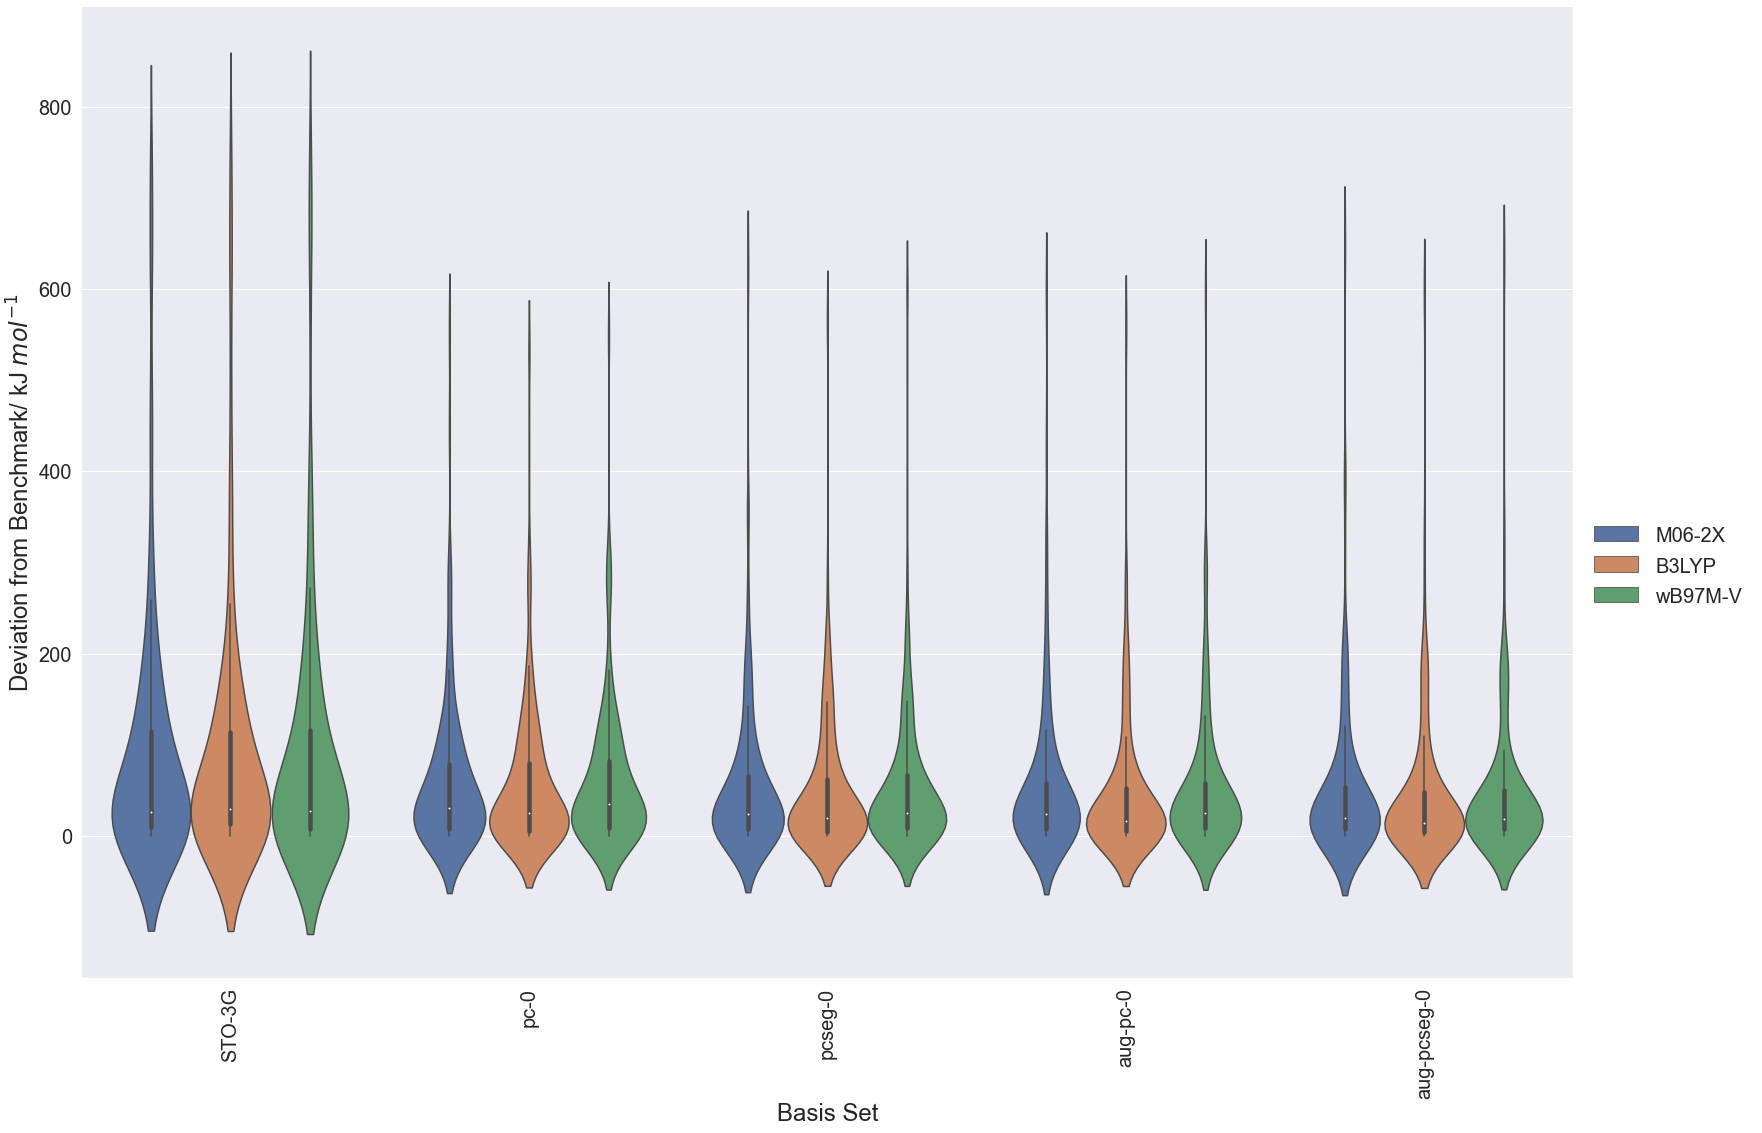

In [100]:
q = sns.catplot(data=SingleZeta, x="basis", y = "MAD",kind = 'violin',hue="method", height = 15, aspect =1.5,order=SingleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


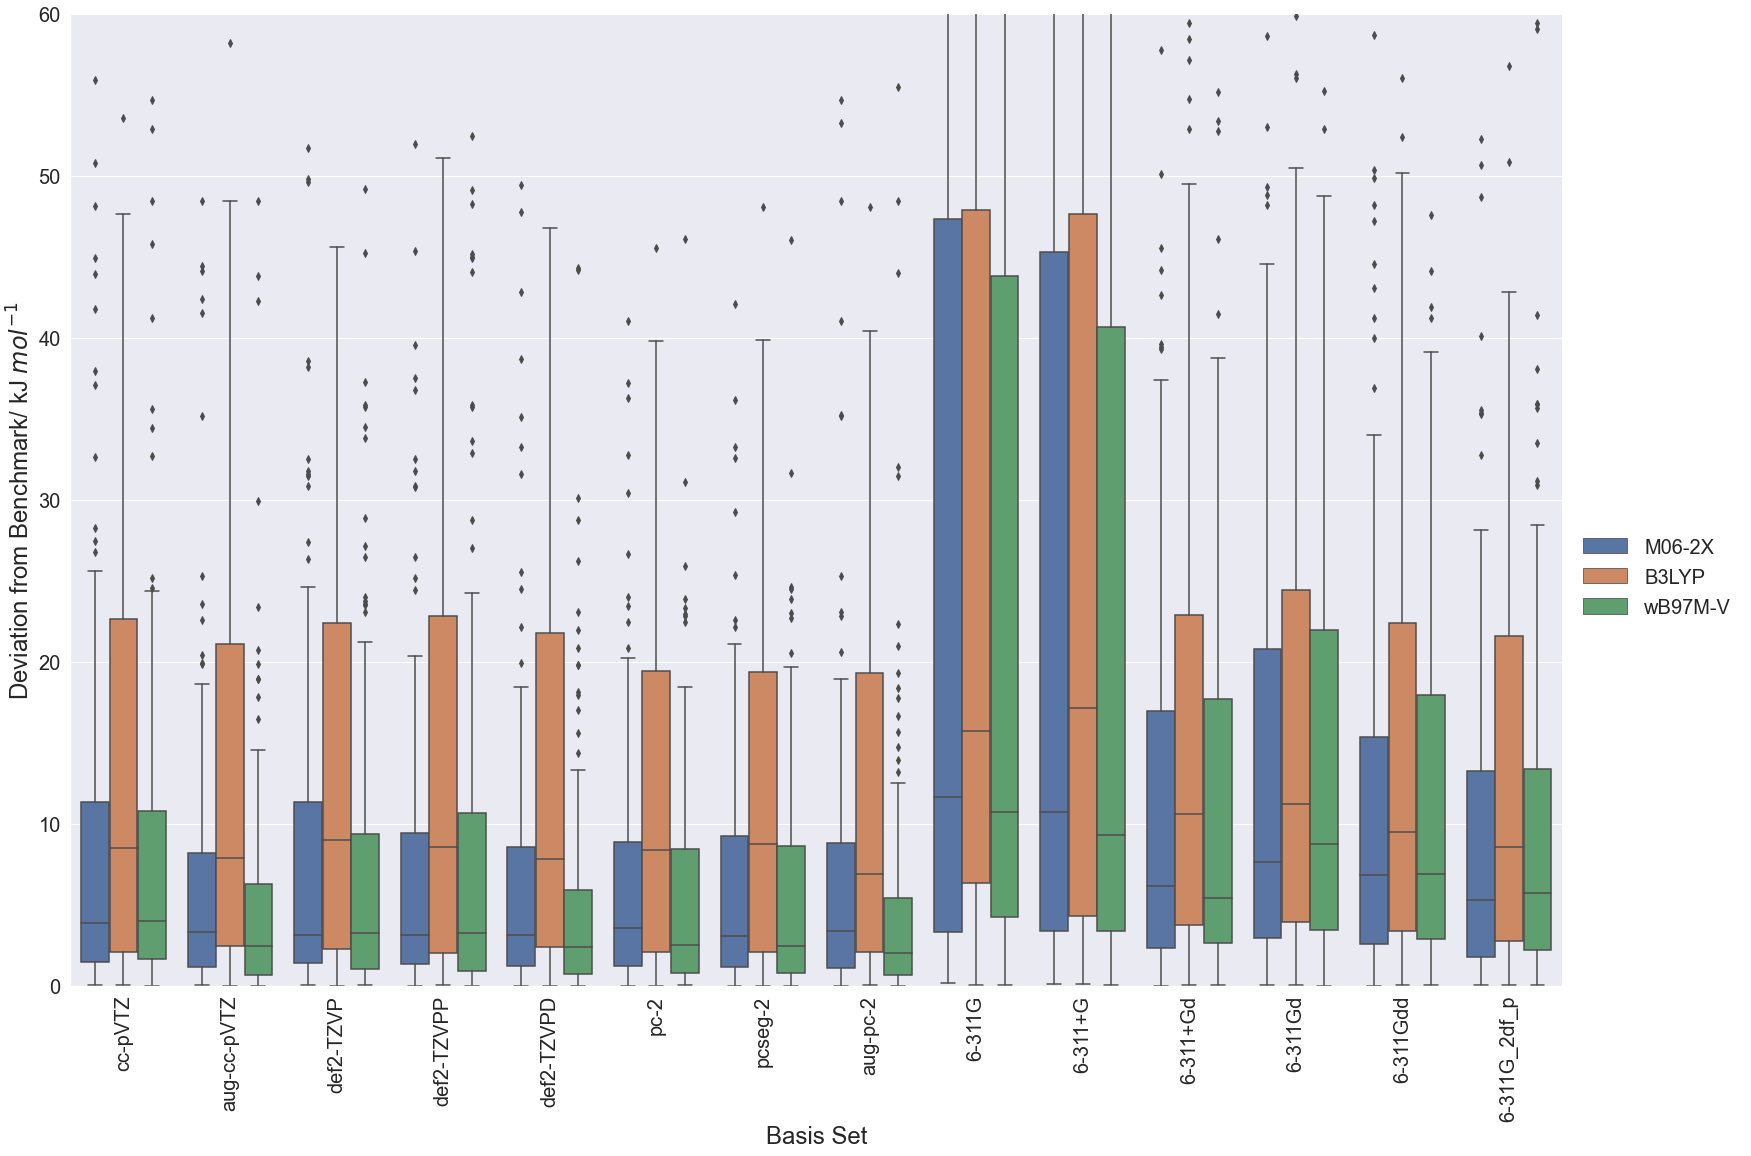

In [101]:
q = sns.catplot(data=TripleZeta, x="basis", y = "MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=TripleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
plt.ylim(0,60)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


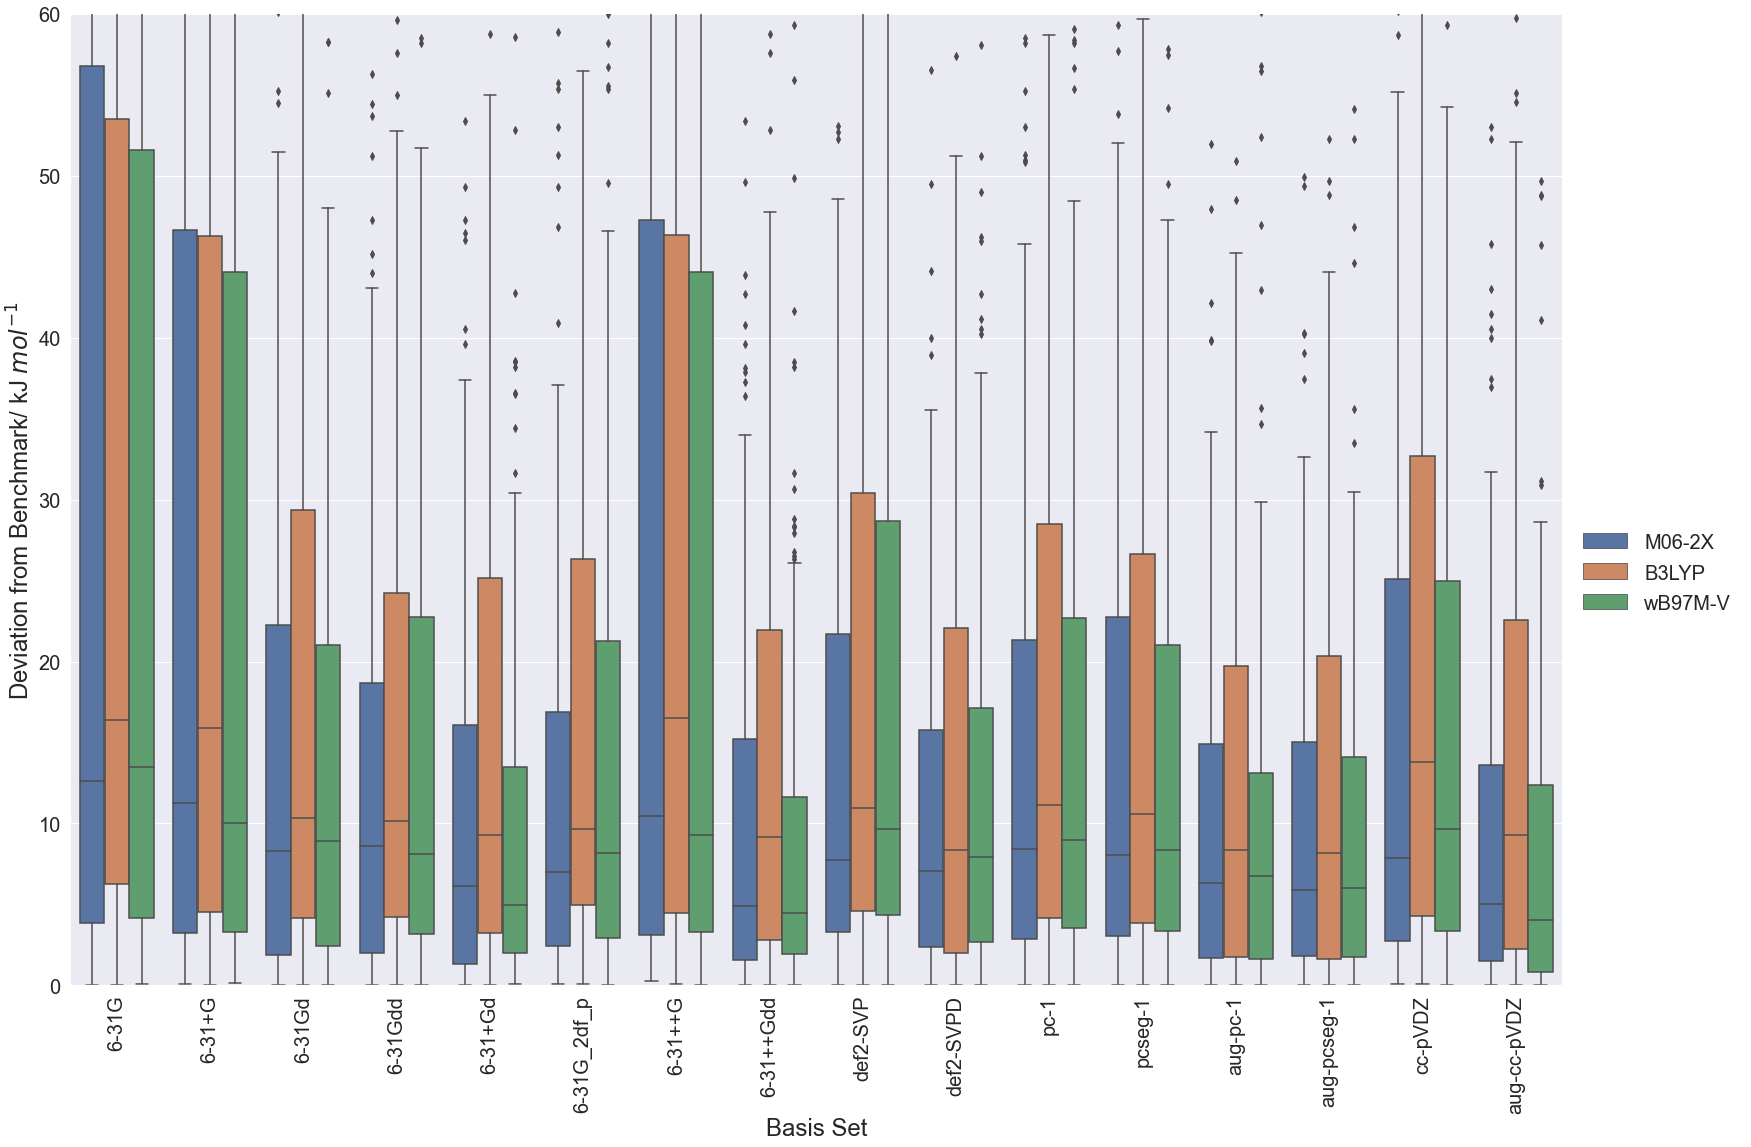

In [102]:
q = sns.catplot(data=DoubleZeta, x="basis", y = "MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=DoubleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
plt.ylim(0,60)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


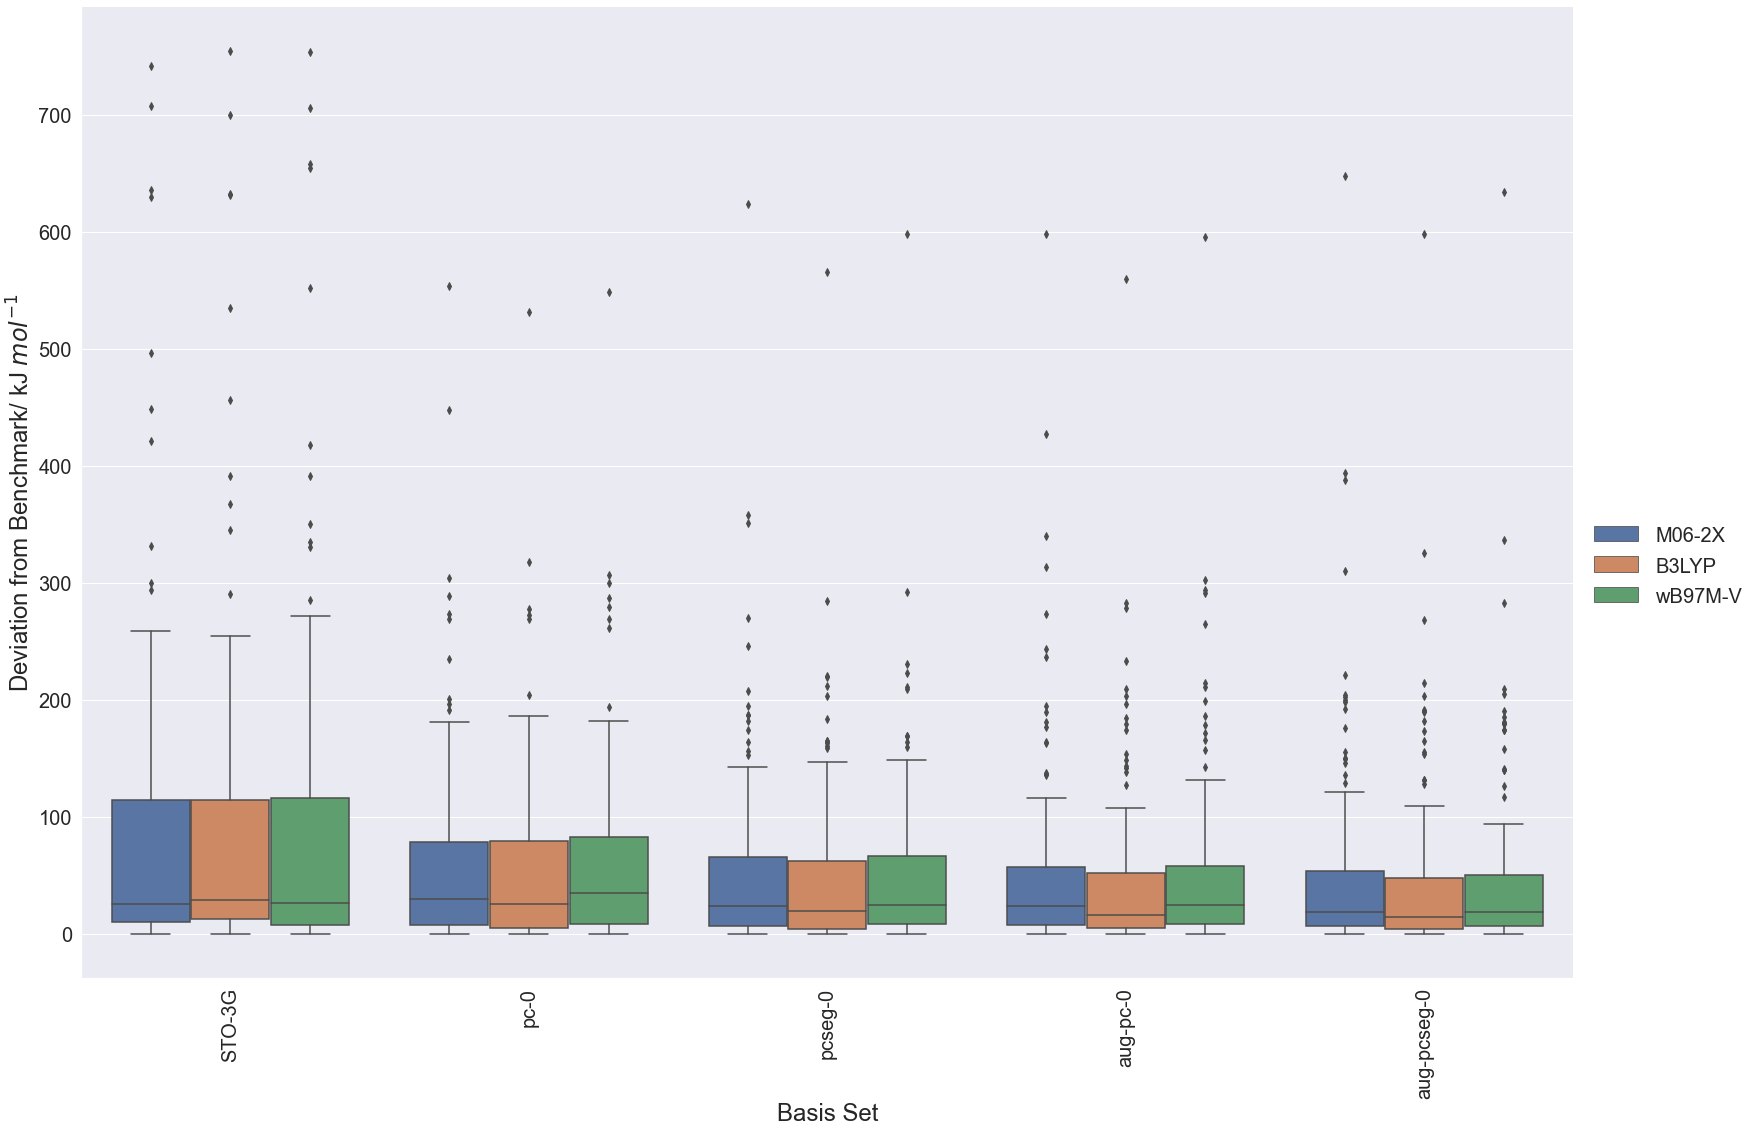

In [103]:
q = sns.catplot(data=SingleZeta, x="basis", y = "MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=SingleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


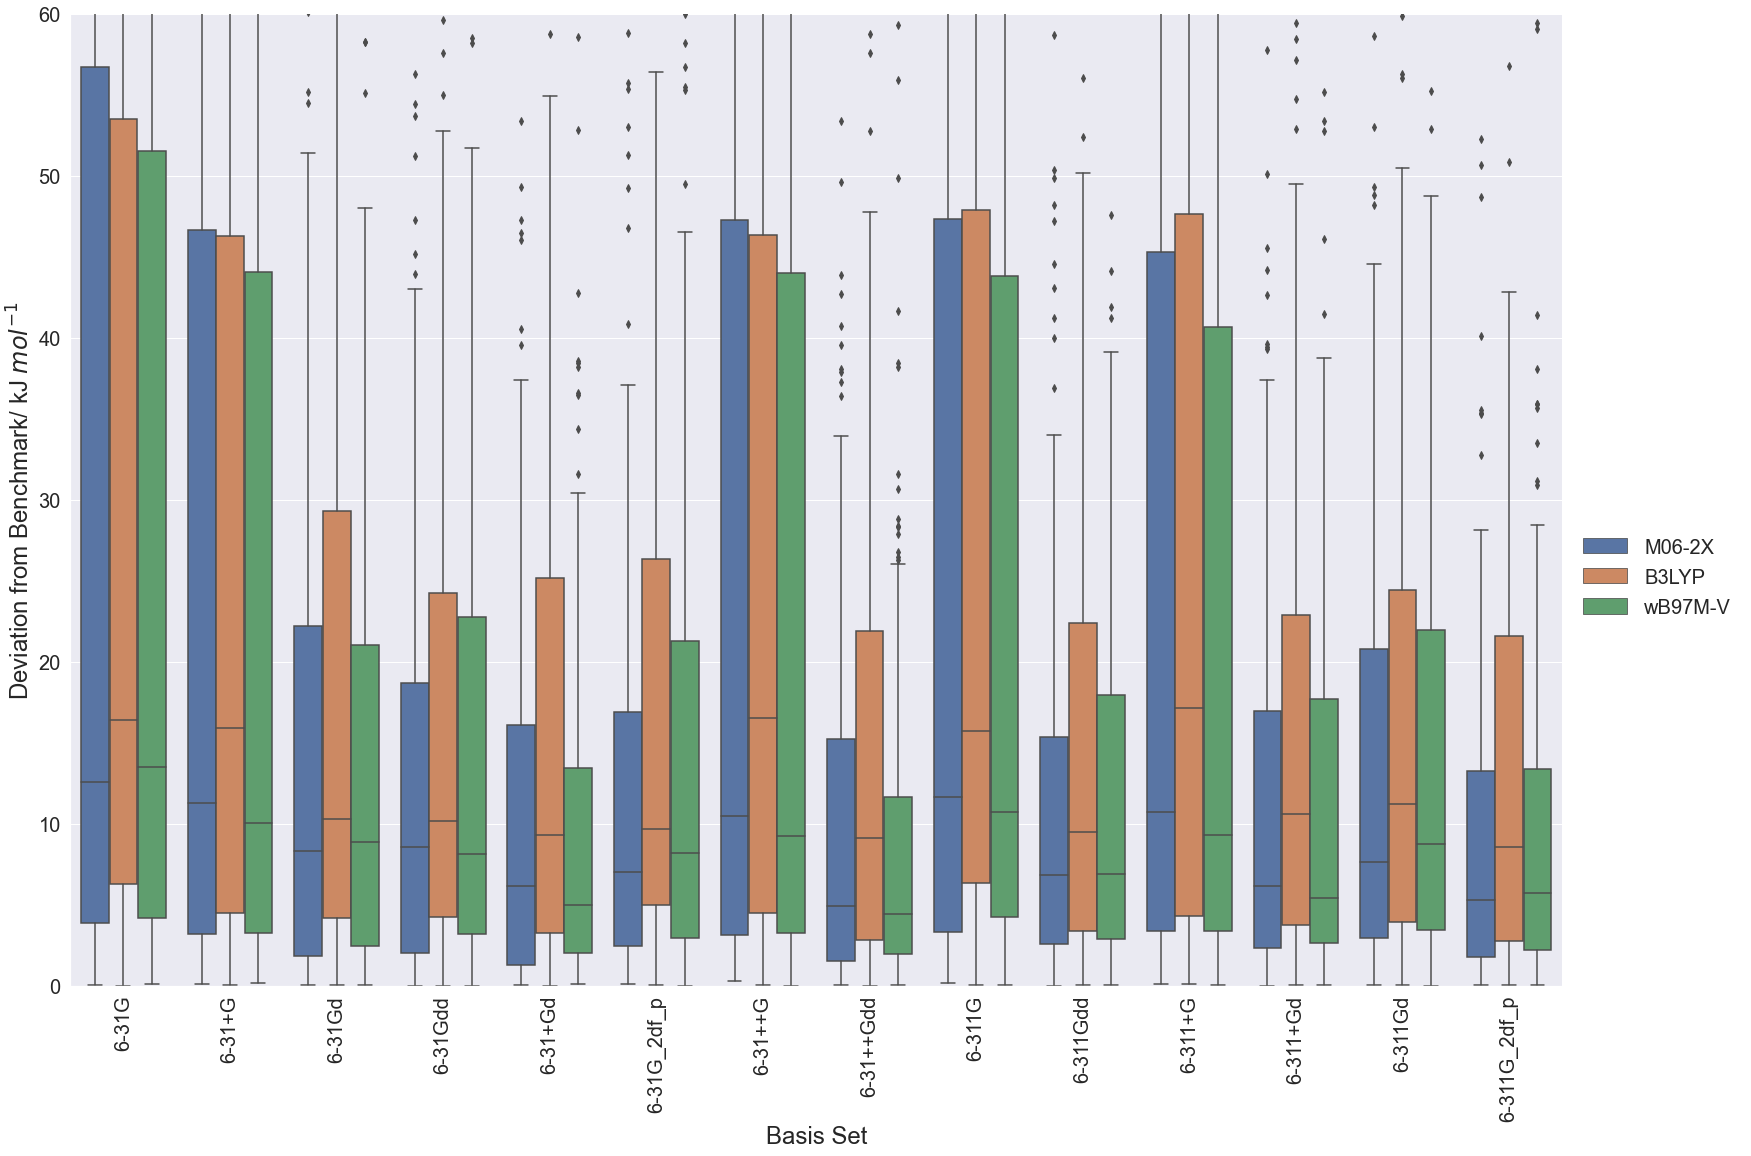

In [104]:
q = sns.catplot(data=PopleOnly, x="basis", y = "MAD",kind = 'box',hue="method", height = 15, aspect =1.5,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
plt.ylim(0,60)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


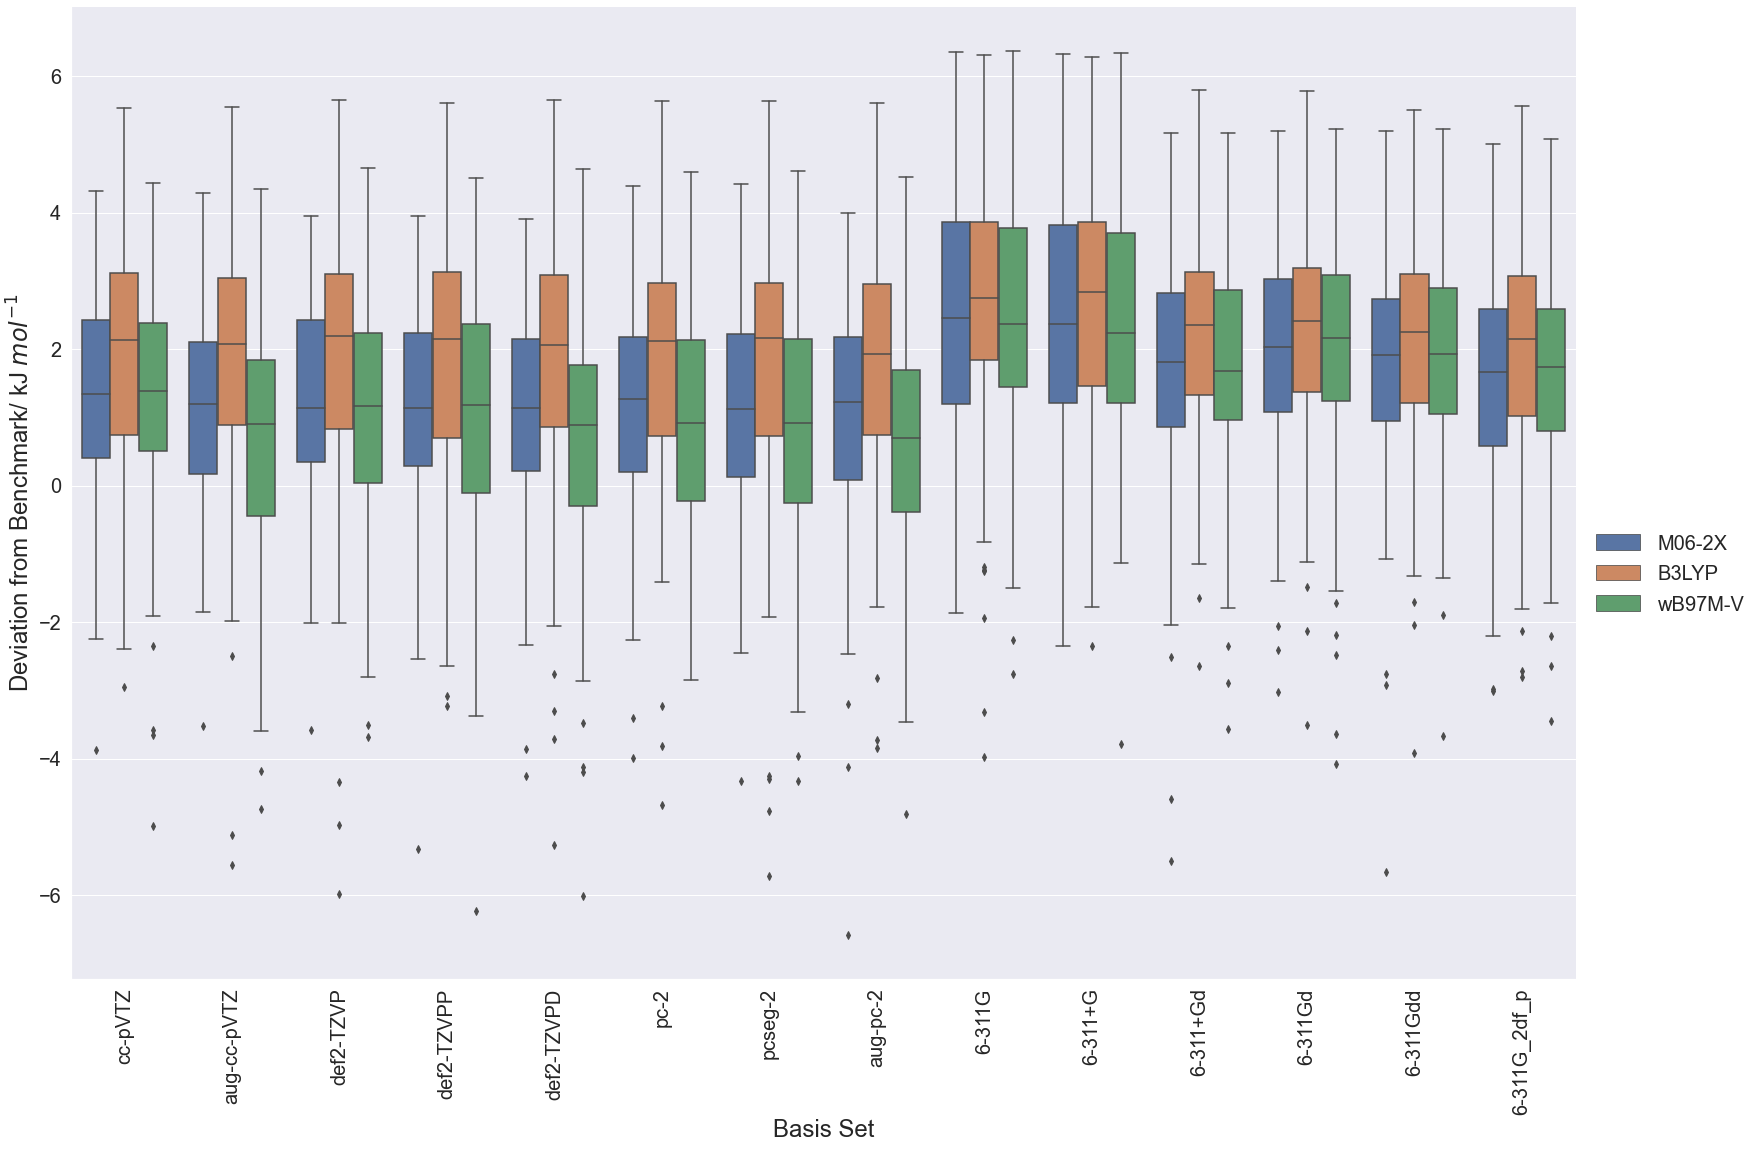

In [105]:
q = sns.catplot(data=TripleZeta, x="basis", y = "Log MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=TripleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


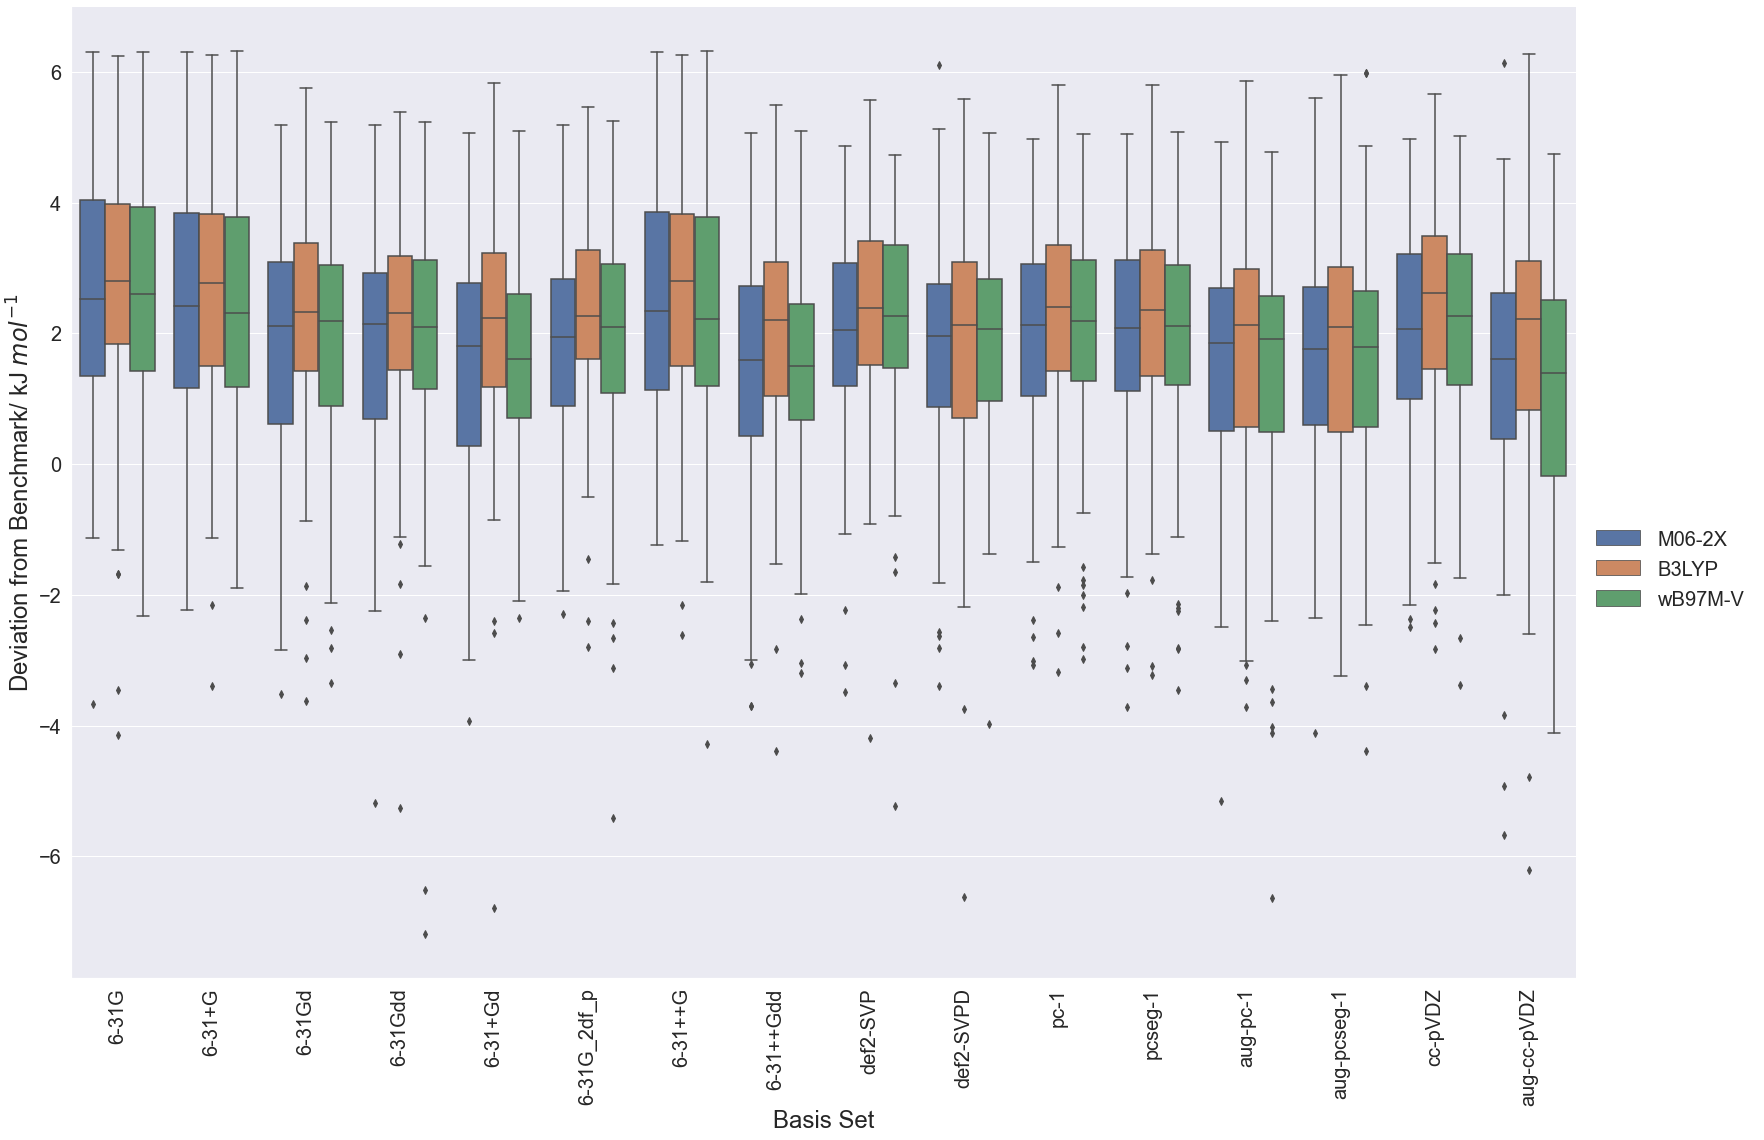

In [106]:
q = sns.catplot(data=DoubleZeta, x="basis", y = "Log MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=DoubleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


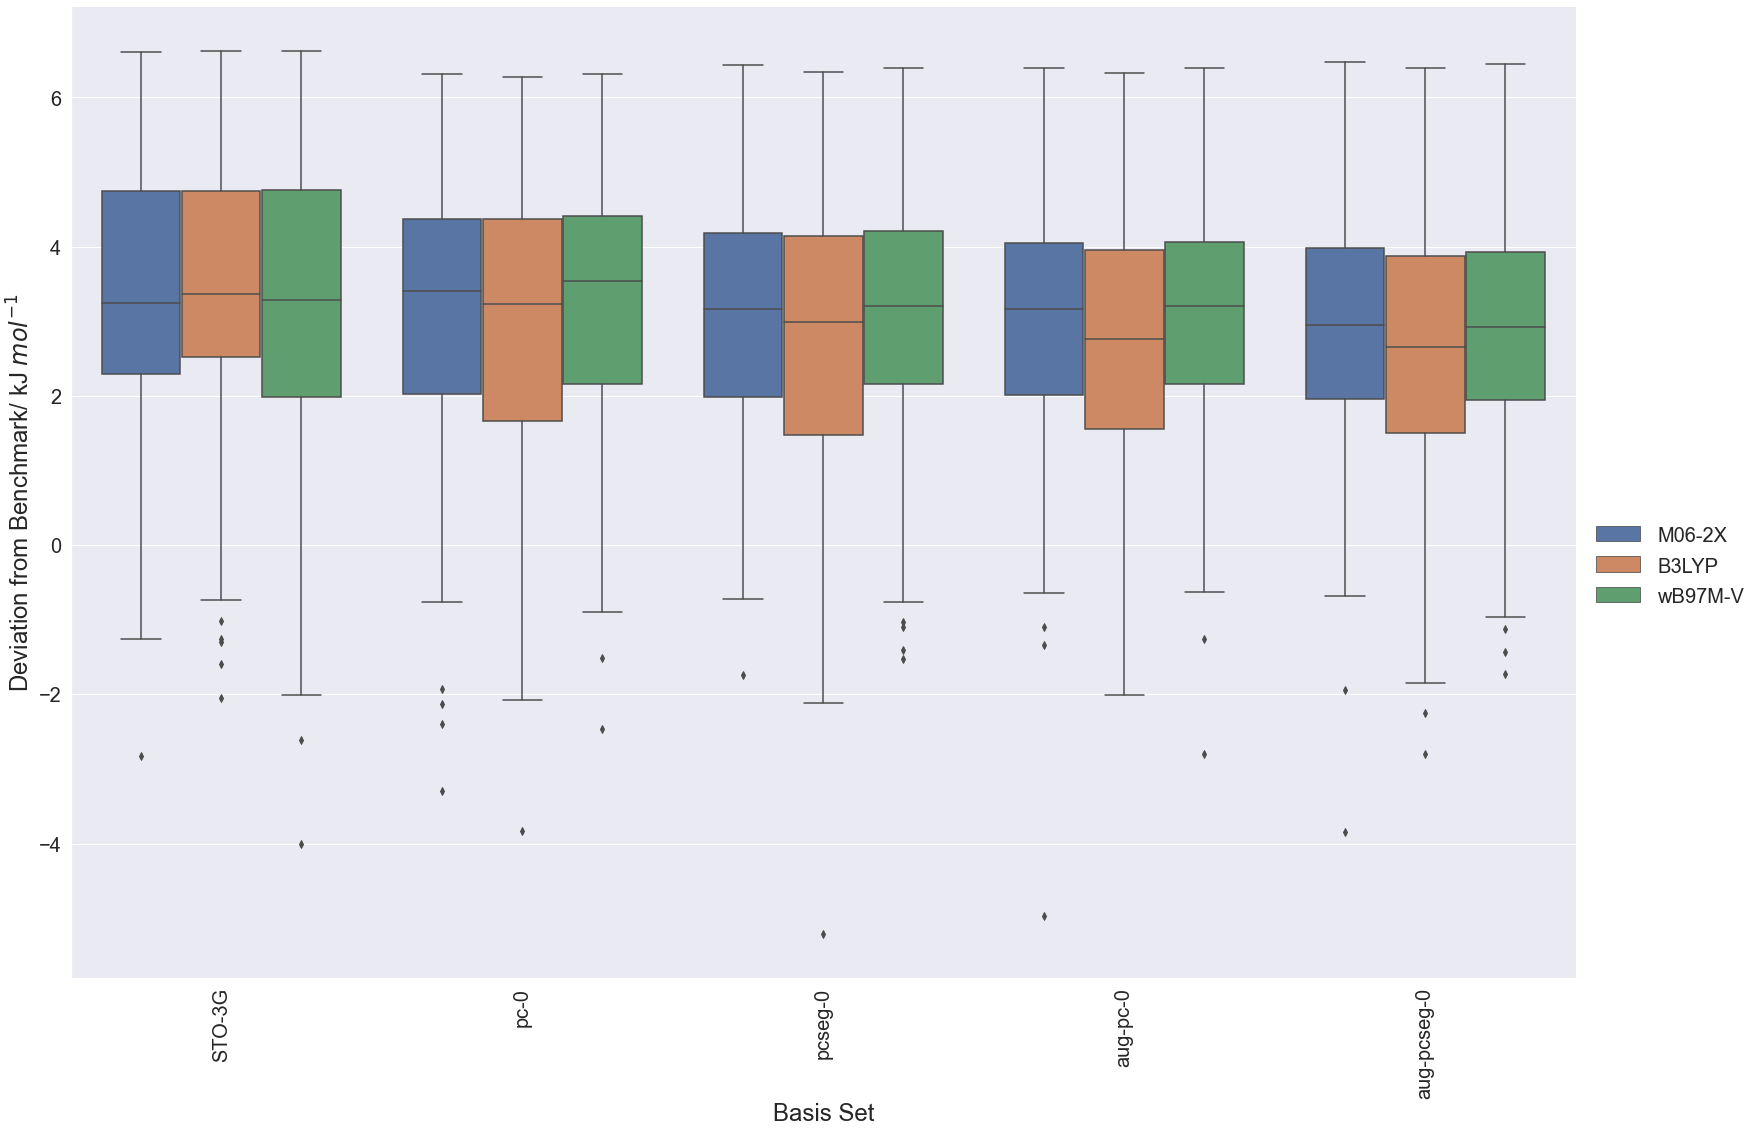

In [107]:
q = sns.catplot(data=SingleZeta, x="basis", y = "Log MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=SingleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


In [108]:
Test_DataFrame_median = pd.DataFrame(columns =['name', 'MAD', 'MSD', 'WMAD', 'method', 'basis', 'MEDIAN'])
median_list = []
for basis in full_basisset_list:
    for method in full_method_list:
        PURPLEPURPLEPURPLE = new_df.loc[new_df['basis'] == f'{basis}']
        YELLOWYELLOWYELLOW = PURPLEPURPLEPURPLE.loc[PURPLEPURPLEPURPLE['method'] == f'{method}']
        median_value = np.nanmedian(YELLOWYELLOWYELLOW['MAD'])
        standard_deviation = np.nanstd(YELLOWYELLOWYELLOW['MAD'])
        
        
        BLACKBLACKBLACK = means.loc[means['basis'] == f'{basis}']
        MAGENTAMAGENTAMAGENTA = BLACKBLACKBLACK.loc[BLACKBLACKBLACK['method'] == f'{method}']
        
        
        MAGENTAMAGENTAMAGENTA['MEDIAN'] = median_value
        MAGENTAMAGENTAMAGENTA['STD'] = standard_deviation
        Test_DataFrame_median =Test_DataFrame_median.append(MAGENTAMAGENTAMAGENTA)

/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_28436/3475574793.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MAGENTAMAGENTAMAGENTA['MEDIAN'] = median_value
/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_28436/3475574793.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MAGENTAMAGENTAMAGENTA['STD'] = standard_deviation


In [109]:
Test_DataFrame_median

name        MAD        MSD       WMAD   method      basis  \
0     M06-2X_6-31++G  38.096461  18.175700  73.750000   M06-2X    6-31++G   
0      B3LYP_6-31++G  42.425975  21.526682  90.272059    B3LYP    6-31++G   
0    wB97M-V_6-31++G  35.693043  18.470403  70.558824  wB97M-V    6-31++G   
0   M06-2X_6-31++Gdd  11.595298   4.416111  29.036765   M06-2X  6-31++Gdd   
0    B3LYP_6-31++Gdd  19.742283   8.579105  60.272059    B3LYP  6-31++Gdd   
..               ...        ...        ...        ...      ...        ...   
0      B3LYP_pcseg-1  23.278829  11.493796  67.661765    B3LYP    pcseg-1   
0    wB97M-V_pcseg-1  16.650898   7.207794  54.698529  wB97M-V    pcseg-1   
0     M06-2X_pcseg-2   7.153656   2.401583  20.875000   M06-2X    pcseg-2   
0      B3LYP_pcseg-2  17.953934   6.624400  62.455882    B3LYP    pcseg-2   
0    wB97M-V_pcseg-2   6.959669   2.658014  17.183824  wB97M-V    pcseg-2   

       MEDIAN        STD  
0   10.478829  69.611285  
0   16.539687  68.839060  
0    9.261699  67.888927  
0    4.916721  18.182565  
0    9.141877  32.647492  
..        ...        ...  
0   10.605036  38.653586  
0    8.350457  24.612289  
0    3.092358  10.351187  
0    8.746580  34.027717  
0    2.487629  12.797203  

[105 rows x 8 columns]

In [110]:
DoubleandTripleZetaMedian=Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'cc-pVTZ']
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'aug-cc-pVTZ'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'def2-TZVP'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'def2-TZVPP'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'def2-TZVPD'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'pc-2'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'pcseg-2'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'aug-pc-2'])

#DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31G'])
#DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31+G'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31Gd'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31Gdd'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31+Gd'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31G_2df_p'])
#DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31++G'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31++Gdd'])

#DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311G'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311Gdd'])
#DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311+G'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311+Gd'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311Gd'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311G_2df_p'])

DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'def2-SVP'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'def2-SVPD'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'pc-1'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'pcseg-1'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'aug-pc-1'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'aug-pcseg-1'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'cc-pVDZ'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'aug-cc-pVDZ'])

In [111]:
DoubleandTripleZetaMedian

name        MAD        MSD        WMAD   method  \
0        M06-2X_cc-pVTZ   9.837142   3.377916   29.007353   M06-2X   
0         B3LYP_cc-pVTZ  19.381141   8.000585   62.036765    B3LYP   
0       wB97M-V_cc-pVTZ  10.295252   3.797249   32.448529  wB97M-V   
0    M06-2X_aug-cc-pVTZ   7.456333   1.395476   20.536765   M06-2X   
0     B3LYP_aug-cc-pVTZ  17.544303   5.650572   75.470588    B3LYP   
..                  ...        ...        ...         ...      ...   
0         B3LYP_cc-pVDZ  25.918607  13.484628   78.536765    B3LYP   
0       wB97M-V_cc-pVDZ  19.580810   8.488037   64.933824  wB97M-V   
0    M06-2X_aug-cc-pVDZ  13.706651   8.119628   58.610294   M06-2X   
0     B3LYP_aug-cc-pVDZ  28.670503   3.942973  135.110294    B3LYP   
0   wB97M-V_aug-cc-pVDZ  11.040966   5.118816   24.867647  wB97M-V   

          basis     MEDIAN        STD  
0       cc-pVTZ   3.857066  13.937250  
0       cc-pVTZ   8.486295  33.617236  
0       cc-pVTZ   4.000621  15.567127  
0   aug-cc-pVTZ   3.318032  11.051560  
0   aug-cc-pVTZ   7.915466  29.651505  
..          ...        ...        ...  
0       cc-pVDZ  13.813279  37.310143  
0       cc-pVDZ   9.663021  26.596280  
0   aug-cc-pVDZ   5.016463  41.309550  
0   aug-cc-pVDZ   9.289448  76.283028  
0   aug-cc-pVDZ   4.060000  18.849780  

[75 rows x 8 columns]

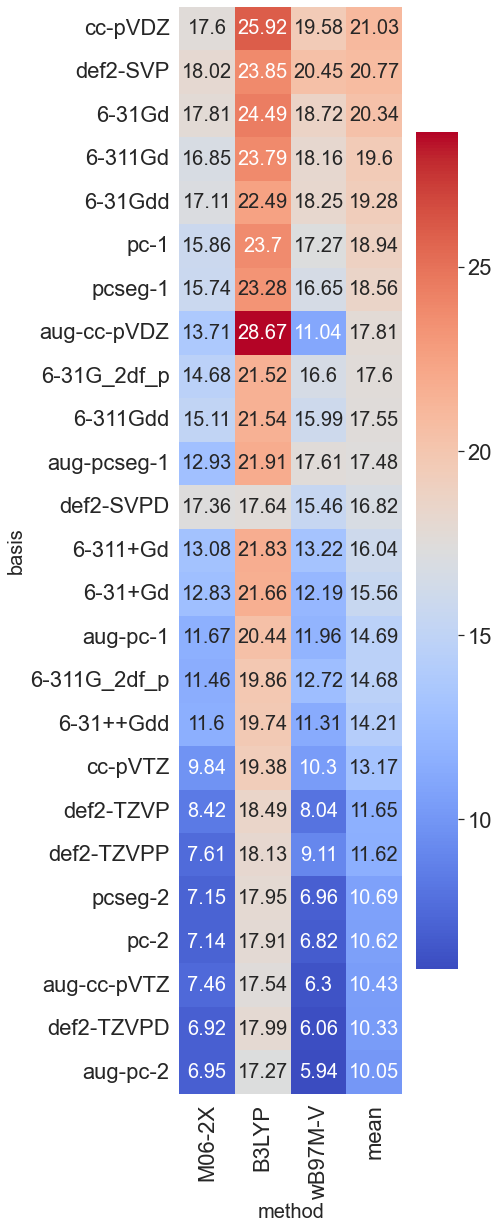

In [112]:
plt.figure(figsize = (5,20))
sns.set(font_scale=2)
df_heatmap = DoubleandTripleZetaMedian.pivot_table(values='MAD',index='basis',columns='method')
df_heatmap=df_heatmap.reindex(columns=['M06-2X','B3LYP','wB97M-V'])
df_heatmap['mean'] = df_heatmap.mean(axis=1)
df_heatmap = df_heatmap.round(decimals=2)
df_heatmap = df_heatmap.sort_values(by='mean',ascending=False)
z=sns.heatmap(df_heatmap,annot=True,cmap="coolwarm",fmt='g',annot_kws={"fontsize":20})
plt.xlabel('method',fontsize=20)
plt.ylabel('basis',fontsize=20)
#z.set_xticklabels(rotation=90)
plt.show()

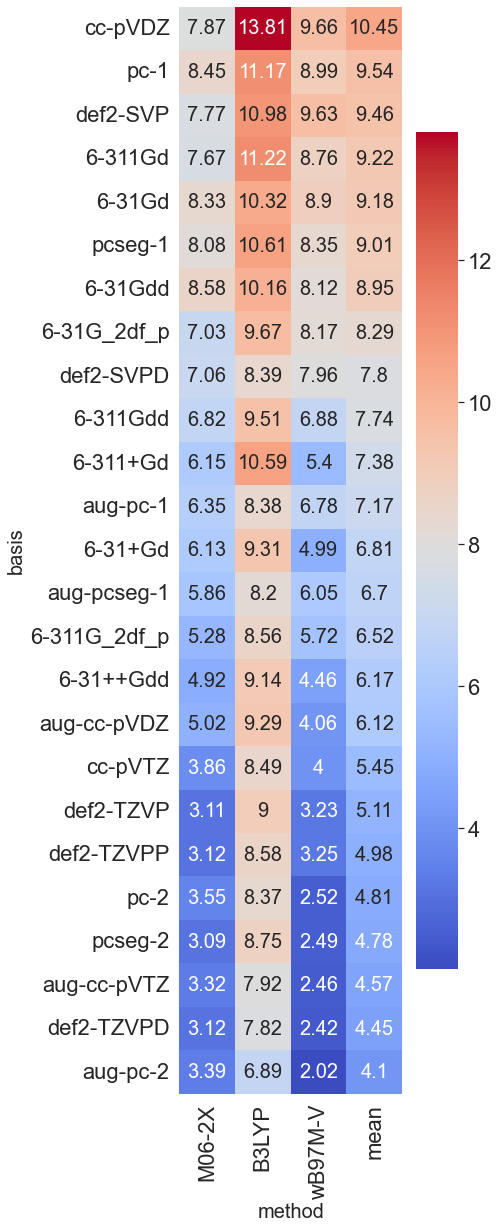

In [113]:
plt.figure(figsize = (5,20))
sns.set(font_scale=2)
df_heatmap = DoubleandTripleZetaMedian.pivot_table(values='MEDIAN',index='basis',columns='method')
df_heatmap=df_heatmap.reindex(columns=['M06-2X','B3LYP','wB97M-V'])
df_heatmap['mean'] = df_heatmap.mean(axis=1)
df_heatmap = df_heatmap.round(decimals=2)
df_heatmap = df_heatmap.sort_values(by='mean',ascending=False)
z=sns.heatmap(df_heatmap,annot=True,cmap="coolwarm",fmt='g',annot_kws={"fontsize":20})
plt.xlabel('method',fontsize=20)
plt.ylabel('basis',fontsize=20)
#z.set_xticklabels(rotation=90)
plt.show()


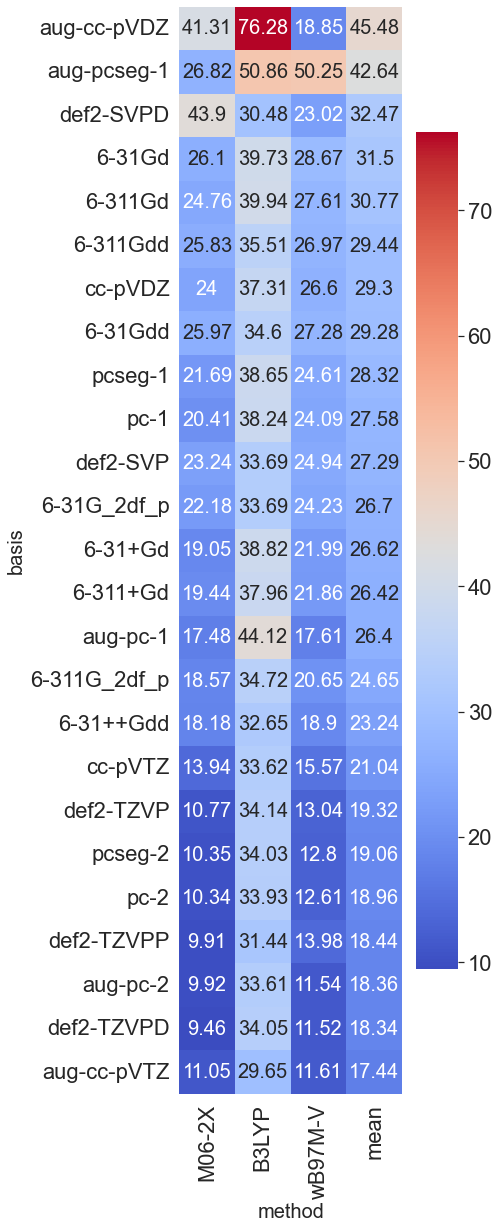

In [114]:
plt.figure(figsize = (5,20))
sns.set(font_scale=2)
df_heatmap = DoubleandTripleZetaMedian.pivot_table(values='STD',index='basis',columns='method')
df_heatmap=df_heatmap.reindex(columns=['M06-2X','B3LYP','wB97M-V'])
df_heatmap['mean'] = df_heatmap.mean(axis=1)
df_heatmap = df_heatmap.round(decimals=2)
df_heatmap = df_heatmap.sort_values(by='mean',ascending=False)
z=sns.heatmap(df_heatmap,annot=True,cmap="coolwarm",fmt='g',annot_kws={"fontsize":20})
plt.xlabel('method',fontsize=20)
plt.ylabel('basis',fontsize=20)
#z.set_xticklabels(rotation=90)
plt.show()

In [115]:
new_df

Reaction id    Database         variable       value   method    basis  \
0        ACONF_11   11.012297   M06-2X_6-31++G    8.917241   M06-2X  6-31++G   
1        ACONF_14   12.899284   M06-2X_6-31++G   10.749396   M06-2X  6-31++G   
2         AHB21_6 -106.775774   M06-2X_6-31++G -113.322399   M06-2X  6-31++G   
3        AHB21_10 -156.105181   M06-2X_6-31++G -182.279688   M06-2X  6-31++G   
4        AHB21_15  -36.066113   M06-2X_6-31++G  -45.262878   M06-2X  6-31++G   
...           ...         ...              ...         ...      ...      ...   
14275    YBDE18_6  216.480354  wB97M-V_pcseg-2  211.022395  wB97M-V  pcseg-2   
14276    YBDE18_8  224.806521  wB97M-V_pcseg-2  213.272656  wB97M-V  pcseg-2   
14277    YBDE18_9  136.314842  wB97M-V_pcseg-2  124.307191  wB97M-V  pcseg-2   
14278   YBDE18_13  218.739715  wB97M-V_pcseg-2  187.103283  wB97M-V  pcseg-2   
14279   YBDE18_16  251.500465  wB97M-V_pcseg-2  243.255221  wB97M-V  pcseg-2   

             MSD        MAD Data Source  WMAD   Log MAD  
0       2.095057   2.095057       ACONF    64  0.739581  
1       2.149888   2.149888       ACONF    66  0.765416  
2       6.546625   6.546625       AHB21    16  1.878950  
3      26.174507  26.174507       AHB21    66  3.264786  
4       9.196765   9.196765       AHB21    23  2.218852  
...          ...        ...         ...   ...       ...  
14275   5.457959   5.457959      YBDE18     6  1.697075  
14276  11.533865  11.533865      YBDE18    13  2.445287  
14277  12.007651  12.007651      YBDE18    13  2.485544  
14278  31.636432  31.636432      YBDE18    36  3.454309  
14279   8.245244   8.245244      YBDE18     9  2.109637  

[14280 rows x 11 columns]

In [116]:
YELLOWYELLOWYELLOW

Reaction id    Database         variable       value   method    basis  \
14144    ACONF_11   11.012297  wB97M-V_pcseg-2   11.105519  wB97M-V  pcseg-2   
14145    ACONF_14   12.899284  wB97M-V_pcseg-2   12.411783  wB97M-V  pcseg-2   
14146     AHB21_6 -106.775774  wB97M-V_pcseg-2 -119.212200  wB97M-V  pcseg-2   
14147    AHB21_10 -156.105181  wB97M-V_pcseg-2 -180.595281  wB97M-V  pcseg-2   
14148    AHB21_15  -36.066113  wB97M-V_pcseg-2  -44.858524  wB97M-V  pcseg-2   
...           ...         ...              ...         ...      ...      ...   
14275    YBDE18_6  216.480354  wB97M-V_pcseg-2  211.022395  wB97M-V  pcseg-2   
14276    YBDE18_8  224.806521  wB97M-V_pcseg-2  213.272656  wB97M-V  pcseg-2   
14277    YBDE18_9  136.314842  wB97M-V_pcseg-2  124.307191  wB97M-V  pcseg-2   
14278   YBDE18_13  218.739715  wB97M-V_pcseg-2  187.103283  wB97M-V  pcseg-2   
14279   YBDE18_16  251.500465  wB97M-V_pcseg-2  243.255221  wB97M-V  pcseg-2   

             MSD        MAD Data Source  WMAD   Log MAD  
14144  -0.093221   0.093221       ACONF     2 -2.372779  
14145   0.487501   0.487501       ACONF    15 -0.718463  
14146  12.436426  12.436426       AHB21    31  2.520630  
14147  24.490100  24.490100       AHB21    61  3.198269  
14148   8.792411   8.792411       AHB21    22  2.173889  
...          ...        ...         ...   ...       ...  
14275   5.457959   5.457959      YBDE18     6  1.697075  
14276  11.533865  11.533865      YBDE18    13  2.445287  
14277  12.007651  12.007651      YBDE18    13  2.485544  
14278  31.636432  31.636432      YBDE18    36  3.454309  
14279   8.245244   8.245244      YBDE18     9  2.109637  

[136 rows x 11 columns]

In [117]:
#PDF AND OVERLAP STATISTIC SEE IF OVERLAP GOOD
ejuwfejwhifewhfe = new_df.loc[new_df['method'] == 'wB97M-V']
ewfhuhjwef = ejuwfejwhifewhfe.loc[ejuwfejwhifewhfe['basis'] == 'def2-TZVP']
GRONKBHUIWIE = (2*(ewfhuhjwef.loc[ewfhuhjwef['method'] == 'wB97M-V']['MAD'].quantile(0.75)- ewfhuhjwef.loc[ewfhuhjwef['method'] == 'wB97M-V']['MAD'].quantile(0.25))/136**(1/3))
print((ewfhuhjwef.loc[ewfhuhjwef['method'] == 'wB97M-V']['MAD'].max() -ewfhuhjwef.loc[ewfhuhjwef['method'] == 'wB97M-V']['MAD'].min())/GRONKBHUIWIE)
gfdsgfds= ejuwfejwhifewhfe.loc[ejuwfejwhifewhfe['basis'] == 'def2-TZVPD']
kfldgknj= ejuwfejwhifewhfe.loc[ejuwfejwhifewhfe['basis'] == 'aug-cc-pVTZ']

32.41852869401135


In [118]:
gfdsgfds

Reaction id    Database            variable       value   method  \
13192    ACONF_11   11.012297  wB97M-V_def2-TZVPD   10.855707  wB97M-V   
13193    ACONF_14   12.899284  wB97M-V_def2-TZVPD   12.207872  wB97M-V   
13194     AHB21_6 -106.775774  wB97M-V_def2-TZVPD -106.280833  wB97M-V   
13195    AHB21_10 -156.105181  wB97M-V_def2-TZVPD -158.194103  wB97M-V   
13196    AHB21_15  -36.066113  wB97M-V_def2-TZVPD  -35.525326  wB97M-V   
...           ...         ...                 ...         ...      ...   
13323    YBDE18_6  216.480354  wB97M-V_def2-TZVPD  216.254897  wB97M-V   
13324    YBDE18_8  224.806521  wB97M-V_def2-TZVPD  215.827367  wB97M-V   
13325    YBDE18_9  136.314842  wB97M-V_def2-TZVPD  125.266777  wB97M-V   
13326   YBDE18_13  218.739715  wB97M-V_def2-TZVPD  189.981687  wB97M-V   
13327   YBDE18_16  251.500465  wB97M-V_def2-TZVPD  248.226012  wB97M-V   

            basis        MSD        MAD Data Source  WMAD   Log MAD  
13192  def2-TZVPD   0.156591   0.156591       ACONF     4 -1.854121  
13193  def2-TZVPD   0.691412   0.691412       ACONF    21 -0.369019  
13194  def2-TZVPD  -0.494942   0.494942       AHB21     1 -0.703315  
13195  def2-TZVPD   2.088922   2.088922       AHB21     5  0.736648  
13196  def2-TZVPD  -0.540787   0.540787       AHB21     1 -0.614730  
...           ...        ...        ...         ...   ...       ...  
13323  def2-TZVPD   0.225458   0.225458      YBDE18     0 -1.489623  
13324  def2-TZVPD   8.979154   8.979154      YBDE18    10  2.194906  
13325  def2-TZVPD  11.048065  11.048065      YBDE18    12  2.402255  
13326  def2-TZVPD  28.758029  28.758029      YBDE18    33  3.358917  
13327  def2-TZVPD   3.274453   3.274453      YBDE18     3  1.186151  

[136 rows x 11 columns]

In [119]:
DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'def2-TZVPD']

name        MAD       MSD       WMAD   method       basis  \
0   M06-2X_def2-TZVPD   6.924692  2.102324  22.338235   M06-2X  def2-TZVPD   
0    B3LYP_def2-TZVPD  17.991962  6.653069  71.750000    B3LYP  def2-TZVPD   
0  wB97M-V_def2-TZVPD   6.064530  2.302843  18.279412  wB97M-V  def2-TZVPD   

     MEDIAN        STD  
0  3.122604   9.456212  
0  7.816150  34.053617  
0  2.423505  11.520324

/Users/sam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

(0.0, 20.0)

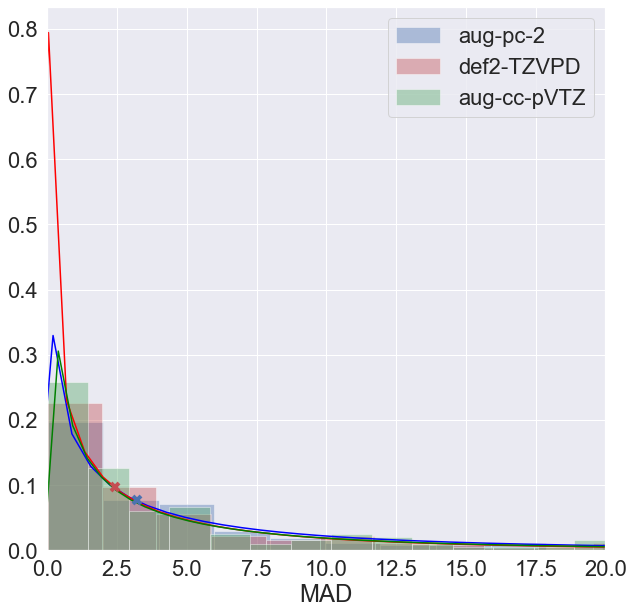

In [125]:
plt.figure(figsize = (10,10))
#fig = plt.subplots(figsize=(10,10))

#sns.distplot(SingleZeta.loc[SingleZeta['basis'] == 'STO-3G']['MAD'],hist=False,bins=10000,label='STO-3G')
#sns.distplot(SingleZeta.loc[SingleZeta['basis'] == 'pc-0']['MAD'],hist=False,bins=10000,label='pc-0')
#sns.distplot(SingleZeta.loc[SingleZeta['basis'] == 'aug-pc-0']['MAD'],hist=False,bins=10000,label='aug-pc-0')
#sns.distplot(SingleZeta.loc[SingleZeta['basis'] == 'pcseg-0']['MAD'],hist=False,bins=10000,label='pcseg-0')
sns.distplot(ewfhuhjwef['MAD'],bins=53,label='aug-pc-2',fit_kws={"color":"blue"},kde=False,fit=stats.gengamma)
sns.distplot(gfdsgfds['MAD'],bins=53,label='def2-TZVPD',color='r',fit_kws={"color":"red"},kde=False,fit=stats.gengamma)
sns.distplot(kfldgknj['MAD'],bins=53,label='aug-cc-pVTZ',color='g',fit_kws={"color":"green"},kde=False,fit=stats.gengamma)
ewfhuhjwef1=ewfhuhjwef.dropna(axis=0)
x=ewfhuhjwef1['MAD'].median()
gfdsgfds1=gfdsgfds.dropna(axis=0)
y=gfdsgfds1['MAD'].median()
kfldgknj1=kfldgknj.dropna(axis=0)
#z=kfldgknj1['MAD'].median()
(a,c,s,p)=stats.gengamma.fit(ewfhuhjwef1['MAD'])
plt.plot(x,1*abs(c) * x**(c*a-1) * np.exp(-x**c) / gamma(a) ,'x',mew=4, ms=8,color='b')#,label = 'def2-TZVPD median')
(a,c,s,p)=stats.gengamma.fit(gfdsgfds1['MAD'])
plt.plot(y,1.05*abs(c) * y**(c*a-1) * np.exp(-y**c) / gamma(a) ,'x',mew=4, ms=8,color='r')#,label = 'aug-pc-2 median')
(a,c,s,p)=stats.gengamma.fit(kfldgknj1['MAD'])
#plt.plot(z,1.1*abs(c) * z**(c*a-1) * np.exp(-z**c) / gamma(a) ,'x',mew=4, ms=8,color='g')#,label = 'aug-cc-pVTZ median')


#plt.axvline(x=ewfhuhjwef['MAD'].median(),color='red',label ='def2-TZVPD median')
#plt.axvline(x=gfdsgfds['MAD'].median(),color='magenta',label ='aug-pc-2 median')
#plt.axvline(x=kfldgknj['MAD'].median(),color='black',label ='aug-cc-pVTZ median')
#sns.distplot(gfdsgfds['MAD'],bins=153,label='aug-pc-2')
#sns.distplot(kfldgknj['MAD'],bins=153,label='aug-cc-pVTZ')
#sns.distplot(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'cc-pVTZ']['MAD'],bins=50,label='cc-pVTZ')
plt.legend()
plt.xlim(0,20)
#Gamma distributions
#negative exp dist?

In [ ]:
plt.figure(figsize = (10,10))
sns.distplot(ewfhuhjwef['MAD']**1,bins=153,label='def2-TZVPD',kde=False,fit=stats.gengamma)
plt.xlim(0,100)

In [ ]:
stats.gengamma.fit(ewfhuhjwef1['MAD'])

In [ ]:
ewfhuhjwef1 = ewfhuhjwef.dropna(axis=0)
ewfhuhjwef1['MAD'].median()

In [ ]:
plt.figure(figsize = (10,10))
sns.distplot(stats.gamma.rvs(0.7283965758120244, 0.7679196687400596, scale= 15.55178702519039,size=1000),kde=False,fit=stats.gengamma)
plt.xlim(0,40)

In [ ]:
x=3.265647628780094
a=0.7283965758120244
c=0.7679196687400596
plt.plot(x,abs(c) * x**(c*a-1) * np.exp(-x**c) / gamma(a) ,'x')

In [ ]:
print('pc-2, def2-TZVP: ', stats.kstest(ewfhuhjwef['MAD'],gfdsgfds['MAD']))
print('pc-2, cc-pVTZ: ', stats.kstest(ewfhuhjwef['MAD'],kfldgknj['MAD']))
print('def2-TZVP, cc-pVTZ: ', stats.kstest(gfdsgfds['MAD'],kfldgknj['MAD']))

###### 

In [ ]:
def IQR(Dataframe):
    q1=Dataframe.quantile(0.25)

    q3=Dataframe.quantile(0.75)

    IQR=q3-q1
    
    return IQR,q1,q3

In [ ]:
outliers_basis_method = pd.DataFrame(columns=['Reaction id', 'Database', 'variable','value', 'method', 'basis', 'MSD', 'MAD', 'Data Source', 'WMAD','Log MAD'])
for basis in full_basisset_list:
    for method in full_method_list:
    
        something_basis = new_df.loc[new_df['basis'] == f'{basis}']
        something_basis_method = something_basis.loc[something_basis['method'] == f'{method}']
        
        something_basis_method_IQR = IQR(something_basis_method['MAD'])
        
        outliers = something_basis_method[((something_basis_method['MAD']<(something_basis_method_IQR[1]-1.5*something_basis_method_IQR[0])) | (something_basis_method['MAD']>(something_basis_method_IQR[2]+1.5*something_basis_method_IQR[0])))]
        outliers_basis_method = outliers_basis_method.append(outliers)
print(outliers_basis_method)

In [ ]:
outliers_basis_method['basis'].value_counts().std()

In [ ]:
print((outliers_basis_method['MAD'].max() - outliers_basis_method['MAD'].min())/((2*IQR(outliers_basis_method['MAD'])[0])/1247**(1/3)))

In [ ]:
plt.figure(figsize = (10,10))
sns.distplot(outliers_basis_method['MAD'],bins=34,label='pcseg-2',color='r',fit_kws={"color":"red"},kde=False,fit=stats.gengamma)
plt.xlim(0,800)



In [ ]:
list_outliers_basis=outliers_basis_method.groupby('basis').count().sort_values(by='basis',ascending=False)
list_outliers_basis=list_outliers_basis.sort_values(by='variable',ascending=False)
list_outliers_method_list=list_outliers_basis.index.to_list()
list_outliers_method_list 

In [ ]:
plt.figure(figsize = (20,10))
q=sns.catplot(x='basis',y='MAD',data=outliers_basis_method, height=15 ,aspect = 1.7,order=['6-311G','6-31+G','6-311+G','6-311Gdd','6-311G_2df_p','cc-pVTZ','aug-pc-2','def2-TZVP','aug-cc-pVTZ','6-311Gd','def2-TZVPD','pc-2','def2-TZVPP','6-311+Gd','pcseg-2'])#order=['6-31++G','6-31G','6-31++Gdd','6-31Gdd','6-31G_2df_p','def2-SVPD','6-31Gd','aug-cc-pVDZ','6-31+Gd','cc-pVDZ','def2-SVP','aug-pc-1','pc-1','aug-pcseg-1','pcseg-1'])
#
q.set_xticklabels(rotation=90)
#plt.ylim(0,800)

In [ ]:
for basis in ['6-31G']:
    for method in ['M06-2X']:
        print(outliers_basis_method.count())
        

In [ ]:
OmegaBNinteySeven = new_df.loc[new_df['method'] == 'wB97M-V']
MOhSix = new_df.loc[new_df['method'] == 'M06-2X']
BeeThreelip = new_df.loc[new_df['method'] == 'B3LYP']

In [ ]:
Type=['aug/cc-pVnZ','aug/cc-pVnZ','aug/cc-pVnZ','aug/cc-pVnZ','aug/cc-pVnZ','aug/cc-pVnZ','def2-n','def2-n','def2-n','def2-n','def2-n','def2-n','def2-n','def2-n','def2-n','aug/pc-n','aug/pc-n','aug/pc-n','aug/pcseg-n','aug/pcseg-n','aug/pcseg-n','aug/pc-n','aug/pc-n','aug/pc-n','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','6-31nG','def2-n','def2-n','def2-n','def2-n','def2-n','def2-n','aug/pc-n','aug/pc-n','aug/pc-n','aug/pcseg-n','aug/pcseg-n','aug/pcseg-n','aug/pc-n','aug/pc-n','aug/pc-n','aug/pcseg-n','aug/pcseg-n','aug/pcseg-n','aug/cc-pVnZ','aug/cc-pVnZ','aug/cc-pVnZ','aug/cc-pVnZ','aug/cc-pVnZ','aug/cc-pVnZ']
len(Type)

In [ ]:
DoubleandTripleZetaMedian['Style'] = Type

In [ ]:
print(OmegaBNinteySeven['MAD'].median(), MOhSix['MAD'].median(), BeeThreelip['MAD'].median())

In [ ]:
TripleZetaMedian_Only_One=DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'cc-pVTZ']
TripleZetaMedian_Only_One=TripleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'aug-cc-pVTZ'])
TripleZetaMedian_Only_One=TripleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'def2-TZVP'])
TripleZetaMedian_Only_One=TripleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'def2-TZVPP'])
TripleZetaMedian_Only_One=TripleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'def2-TZVPD'])
TripleZetaMedian_Only_One=TripleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'pc-2'])
TripleZetaMedian_Only_One=TripleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'pcseg-2'])
TripleZetaMedian_Only_One=TripleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'aug-pc-2'])


DoubleZetaMedian_Only_One=DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-31Gd']
#TripleZetaMedian_Only_One=TripleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-31G'])
#TripleZetaMedian_Only_One=TripleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-31+G'])

DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-31Gdd'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-31+Gd'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-31G_2df_p'])
#DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-31++G'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-31++Gdd'])

#DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-311G'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-311Gdd'])
#DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-311+G'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-311+Gd'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-311Gd'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == '6-311G_2df_p'])

DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'def2-SVP'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'def2-SVPD'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'pc-1'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'pcseg-1'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'aug-pc-1'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'aug-pcseg-1'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'cc-pVDZ'])
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.append(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'aug-cc-pVDZ'])

In [ ]:
TripleZetaMedian_Only_One=TripleZetaMedian_Only_One.sort_values('method')
StyleMethod = ['B3LYP/TZ','B3LYP/TZ','B3LYP/TZ','B3LYP/TZ','B3LYP/TZ','B3LYP/TZ','B3LYP/TZ','B3LYP/TZ','M06-2X/TZ','M06-2X/TZ','M06-2X/TZ','M06-2X/TZ','M06-2X/TZ','M06-2X/TZ','M06-2X/TZ','M06-2X/TZ','wB97M-V/TZ','wB97M-V/TZ','wB97M-V/TZ','wB97M-V/TZ','wB97M-V/TZ','wB97M-V/TZ','wB97M-V/TZ','wB97M-V/TZ']
TripleZetaMedian_Only_One['Method/Quality'] = StyleMethod
DoubleZetaMedian_Only_One=DoubleZetaMedian_Only_One.sort_values('method')
StyleMethod = ['B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','B3LYP/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','M06-2X/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ','wB97M-V/DZ']
DoubleZetaMedian_Only_One['Method/Quality'] = StyleMethod


In [ ]:
frames234324 = [DoubleZetaMedian_Only_One, TripleZetaMedian_Only_One]

DoubleandTripleZetaMedian = pd.concat(frames234324)

In [ ]:
sns.catplot(data=DoubleandTripleZetaMedian, x='Method/Quality', y='MEDIAN', hue='Style',height=8,aspect=1.7,)

In [ ]:
DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'pcseg-1']

In [ ]:
DoubleandTripleZetaMedian